#0) Imports and Installs

In [1]:
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# measure time for ML HyperParams search
import time
from datetime import date

# ML models and utils
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

#1) OHLCV data transformations

## 1.1  Time series for OHLCV (using TSLA as an example for Exploratory Data Analysis)

In [5]:
ticker_obj = yf.Ticker("TSLA")
tsla_df = ticker_obj.history(period = "max", interval = "1d")

In [6]:
tsla_df

Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-09-15 00:00:00-04:00  423.130005  425.700012  402.429993  410.040009   
2025-09-16 00:00:00-04:00  414.500000  423.250000  411.429993  421.619995   
2025-09-17 00:00:00-04:00  415.750000  428.309998  409.670013  425.859985   
2025-09-18 00:00:00-04:00  428.869995  432.220001  416.559998  416.850006   
2025-09-19 00:00:00-04:00  421.820007  429.470001  421.720001  426.070007   

                              Volume  Dividends  Stock Splits  
Date                                                           
2010-06-29 00:00:00-04:00  281494500        0.0           0.0  
2010-06-30 00:00:00-04:00  257806500        0.0           0.0  
2010-07-01 00:00:00-04:00  123282000        0.0           0.0  
2010-07-02 00:00:00-04:00   77097000        0.0           0.0  
2010-07-06 00:00:00-04:00  103003500        0.0           0.0  
...                              ...        ...           ...  
2025-09-15 00:00:00-04:00  163823700        0.0           0.0  
2025-09-16 00:00:00-04:00  104285700        0.0           0.0  
2025-09-17 00:00:00-04:00  106133500        0.0           0.0  
2025-09-18 00:00:00-04:00   90454500        0.0           0.0  
2025-09-19 00:00:00-04:00   92847900        0.0           0.0  

[3831 rows x 7 columns]

In [7]:
# big plus of an API's data: good typing from the box!
# notice DatetimeIndex - it is a recognised date
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3831 entries, 2010-06-29 00:00:00-04:00 to 2025-09-19 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3831 non-null   float64
 1   High          3831 non-null   float64
 2   Low           3831 non-null   float64
 3   Close         3831 non-null   float64
 4   Volume        3831 non-null   int64  
 5   Dividends     3831 non-null   float64
 6   Stock Splits  3831 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 239.4 KB


In [8]:
tsla_df.tail()

Open        High         Low       Close  \
Date                                                                        
2025-09-15 00:00:00-04:00  423.130005  425.700012  402.429993  410.040009   
2025-09-16 00:00:00-04:00  414.500000  423.250000  411.429993  421.619995   
2025-09-17 00:00:00-04:00  415.750000  428.309998  409.670013  425.859985   
2025-09-18 00:00:00-04:00  428.869995  432.220001  416.559998  416.850006   
2025-09-19 00:00:00-04:00  421.820007  429.470001  421.720001  426.070007   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-09-15 00:00:00-04:00  163823700        0.0           0.0  
2025-09-16 00:00:00-04:00  104285700        0.0           0.0  
2025-09-17 00:00:00-04:00  106133500        0.0           0.0  
2025-09-18 00:00:00-04:00   90454500        0.0           0.0  
2025-09-19 00:00:00-04:00   92847900        0.0           0.0

In [9]:
# filter on date (index)
tsla_df_filtered_from_2020 = tsla_df[tsla_df.index>='2020-01-01']
tsla_df_filtered_from_2025= tsla_df[tsla_df.index>='2024-01-01']

<Axes: title={'center': 'TESLA price daily'}, xlabel='Date'>

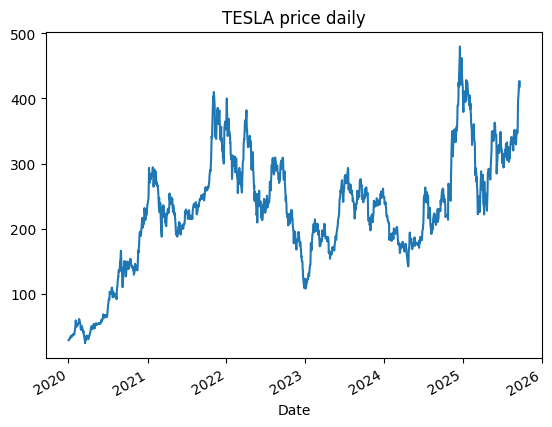

In [10]:
# Chaining: select one column, draw a plot, of a type line
tsla_df_filtered_from_2020['Close'].plot.line(title='TESLA price daily')

In [11]:
# generating new fields (using DateTime features):

tsla_df['Ticker'] = 'TSLA'
tsla_df['Year']= tsla_df.index.year
tsla_df['Month'] = tsla_df.index.month
tsla_df['Weekday'] = tsla_df.index.weekday
tsla_df['Date'] = tsla_df.index.date # to be used in joins

In [12]:
tsla_df

Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-09-15 00:00:00-04:00  423.130005  425.700012  402.429993  410.040009   
2025-09-16 00:00:00-04:00  414.500000  423.250000  411.429993  421.619995   
2025-09-17 00:00:00-04:00  415.750000  428.309998  409.670013  425.859985   
2025-09-18 00:00:00-04:00  428.869995  432.220001  416.559998  416.850006   
2025-09-19 00:00:00-04:00  421.820007  429.470001  421.720001  426.070007   

                              Volume  Dividends  Stock Splits Ticker  Year  \
Date                                                                         
2010-06-29 00:00:00-04:00  281494500        0.0           0.0   TSLA  2010   
2010-06-30 00:00:00-04:00  257806500        0.0           0.0   TSLA  2010   
2010-07-01 00:00:00-04:00  123282000        0.0           0.0   TSLA  2010   
2010-07-02 00:00:00-04:00   77097000        0.0           0.0   TSLA  2010   
2010-07-06 00:00:00-04:00  103003500        0.0           0.0   TSLA  2010   
...                              ...        ...           ...    ...   ...   
2025-09-15 00:00:00-04:00  163823700        0.0           0.0   TSLA  2025   
2025-09-16 00:00:00-04:00  104285700        0.0           0.0   TSLA  2025   
2025-09-17 00:00:00-04:00  106133500        0.0           0.0   TSLA  2025   
2025-09-18 00:00:00-04:00   90454500        0.0           0.0   TSLA  2025   
2025-09-19 00:00:00-04:00   92847900        0.0           0.0   TSLA  2025   

                           Month  Weekday        Date  
Date                                                   
2010-06-29 00:00:00-04:00      6        1  2010-06-29  
2010-06-30 00:00:00-04:00      6        2  2010-06-30  
2010-07-01 00:00:00-04:00      7        3  2010-07-01  
2010-07-02 00:00:00-04:00      7        4  2010-07-02  
2010-07-06 00:00:00-04:00      7        1  2010-07-06  
...                          ...      ...         ...  
2025-09-15 00:00:00-04:00      9        0  2025-09-15  
2025-09-16 00:00:00-04:00      9        1  2025-09-16  
2025-09-17 00:00:00-04:00      9        2  2025-09-17  
2025-09-18 00:00:00-04:00      9        3  2025-09-18  
2025-09-19 00:00:00-04:00      9        4  2025-09-19  

[3831 rows x 12 columns]

In [13]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
tsla_df['close_minus_1'] = tsla_df['Close'].shift(-1)
tsla_df['close_plus_1'] = tsla_df['Close'].shift(1)

tsla_df

Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2025-09-15 00:00:00-04:00  423.130005  425.700012  402.429993  410.040009   
2025-09-16 00:00:00-04:00  414.500000  423.250000  411.429993  421.619995   
2025-09-17 00:00:00-04:00  415.750000  428.309998  409.670013  425.859985   
2025-09-18 00:00:00-04:00  428.869995  432.220001  416.559998  416.850006   
2025-09-19 00:00:00-04:00  421.820007  429.470001  421.720001  426.070007   

                              Volume  Dividends  Stock Splits Ticker  Year  \
Date                                                                         
2010-06-29 00:00:00-04:00  281494500        0.0           0.0   TSLA  2010   
2010-06-30 00:00:00-04:00  257806500        0.0           0.0   TSLA  2010   
2010-07-01 00:00:00-04:00  123282000        0.0           0.0   TSLA  2010   
2010-07-02 00:00:00-04:00   77097000        0.0           0.0   TSLA  2010   
2010-07-06 00:00:00-04:00  103003500        0.0           0.0   TSLA  2010   
...                              ...        ...           ...    ...   ...   
2025-09-15 00:00:00-04:00  163823700        0.0           0.0   TSLA  2025   
2025-09-16 00:00:00-04:00  104285700        0.0           0.0   TSLA  2025   
2025-09-17 00:00:00-04:00  106133500        0.0           0.0   TSLA  2025   
2025-09-18 00:00:00-04:00   90454500        0.0           0.0   TSLA  2025   
2025-09-19 00:00:00-04:00   92847900        0.0           0.0   TSLA  2025   

                           Month  Weekday        Date  close_minus_1  \
Date                                                                   
2010-06-29 00:00:00-04:00      6        1  2010-06-29       1.588667   
2010-06-30 00:00:00-04:00      6        2  2010-06-30       1.464000   
2010-07-01 00:00:00-04:00      7        3  2010-07-01       1.280000   
2010-07-02 00:00:00-04:00      7        4  2010-07-02       1.074000   
2010-07-06 00:00:00-04:00      7        1  2010-07-06       1.053333   
...                          ...      ...         ...            ...   
2025-09-15 00:00:00-04:00      9        0  2025-09-15     421.619995   
2025-09-16 00:00:00-04:00      9        1  2025-09-16     425.859985   
2025-09-17 00:00:00-04:00      9        2  2025-09-17     416.850006   
2025-09-18 00:00:00-04:00      9        3  2025-09-18     426.070007   
2025-09-19 00:00:00-04:00      9        4  2025-09-19            NaN   

                           close_plus_1  
Date                                     
2010-06-29 00:00:00-04:00           NaN  
2010-06-30 00:00:00-04:00      1.592667  
2010-07-01 00:00:00-04:00      1.588667  
2010-07-02 00:00:00-04:00      1.464000  
2010-07-06 00:00:00-04:00      1.280000  
...                                 ...  
2025-09-15 00:00:00-04:00    395.940002  
2025-09-16 00:00:00-04:00    410.040009  
2025-09-17 00:00:00-04:00    421.619995  
2025-09-18 00:00:00-04:00    425.859985  
2025-09-19 00:00:00-04:00    416.850006  

[3831 rows x 14 columns]

FUTURE Growth!! ZB

In [14]:
# historical growth
tsla_df['growth_1d'] = tsla_df['Close'] / tsla_df['Close'].shift(1)           # nvo_df['close_plus_1']
tsla_df['growth_30d'] = tsla_df['Close'] / tsla_df['Close'].shift(30)

# FUTURE Growth : for regression models
tsla_df['growth_future_1d'] = tsla_df['Close'].shift(-1) / tsla_df['Close']   # nvo_df['close_minus_1']
tsla_df['growth_future_30d'] = tsla_df['Close'].shift(-30) / tsla_df['Close']   # nvo_df['close_minus_1']


# FUTURE Growth: for binary models
tsla_df['is_positive_growth_1d_future'] = np.where(tsla_df['growth_future_1d'] > 1, 1, 0)
tsla_df['is_positive_growth_30d_future'] = np.where(tsla_df['growth_future_30d'] > 1, 1, 0)


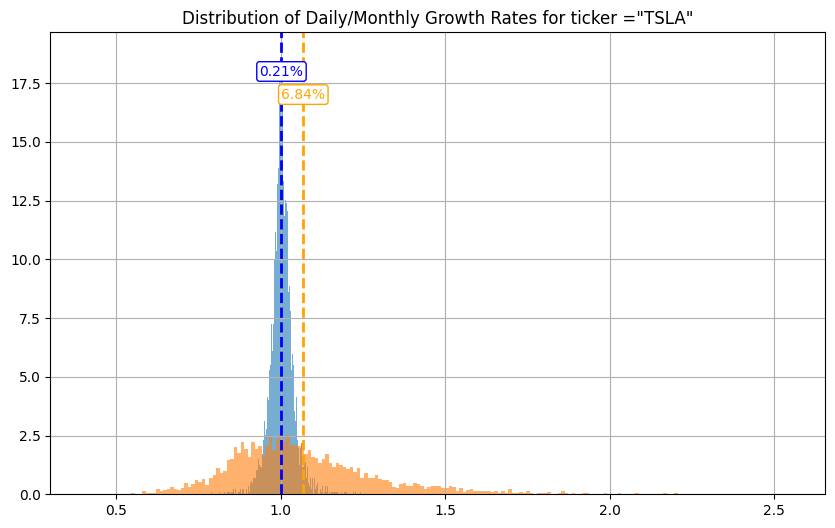

In [15]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.figure(figsize=(10, 6))
plt.title('Distribution of Daily/Monthly Growth Rates for ticker ="TSLA"')

tsla_df.growth_1d.hist(bins=200, alpha=0.6, density=True)
tsla_df.growth_30d.hist(bins=200, alpha=0.6, density=True)

# Add vertical lines for averages
mean_1d = tsla_df.growth_1d.mean()
mean_30d = tsla_df.growth_30d.mean()

plt.axvline(mean_1d, color='blue', linestyle='--', linewidth=2, label=f'1d avg = {mean_1d:.3f}')
plt.axvline(mean_30d, color='orange', linestyle='--', linewidth=2, label=f'30d avg = {mean_30d:.3f}')


# Add mean text labels (as percent change)
ymax = plt.ylim()[1]
plt.text(mean_1d, ymax * 0.90,
         f'{(mean_1d - 1) * 100:.2f}%',
         color='blue', ha='center', va='bottom',
         bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.2'))

plt.text(mean_30d, ymax * 0.85,
         f'{(mean_30d - 1) * 100:.2f}%',
         color='orange', ha='center', va='bottom',
         bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.2'))


plt.show()

<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "TSLA"'}>

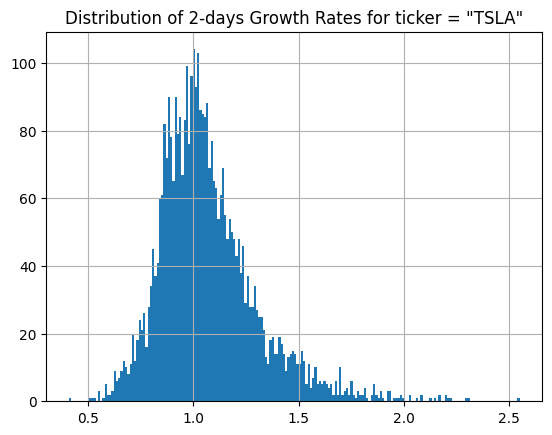

In [16]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "TSLA"')

tsla_df.growth_30d.hist(bins=200)

In [17]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in tsla_df.keys() if k.find('growth')>=0 or k=='Close']
tsla_df[COLUMNS]

Close  growth_1d  growth_30d  \
Date                                                           
2010-06-29 00:00:00-04:00    1.592667        NaN         NaN   
2010-06-30 00:00:00-04:00    1.588667   0.997489         NaN   
2010-07-01 00:00:00-04:00    1.464000   0.921527         NaN   
2010-07-02 00:00:00-04:00    1.280000   0.874317         NaN   
2010-07-06 00:00:00-04:00    1.074000   0.839063         NaN   
...                               ...        ...         ...   
2025-09-15 00:00:00-04:00  410.040009   1.035611    1.354922   
2025-09-16 00:00:00-04:00  421.619995   1.028241    1.363319   
2025-09-17 00:00:00-04:00  425.859985   1.010056    1.379438   
2025-09-18 00:00:00-04:00  416.850006   0.978843    1.303023   
2025-09-19 00:00:00-04:00  426.070007   1.022118    1.322090   

                           growth_future_1d  growth_future_30d  \
Date                                                             
2010-06-29 00:00:00-04:00          0.997489           0.749267   
2010-06-30 00:00:00-04:00          0.921527           0.738564   
2010-07-01 00:00:00-04:00          0.874317           0.834244   
2010-07-02 00:00:00-04:00          0.839063           0.978125   
2010-07-06 00:00:00-04:00          0.980757           1.188703   
...                                     ...                ...   
2025-09-15 00:00:00-04:00          1.028241                NaN   
2025-09-16 00:00:00-04:00          1.010056                NaN   
2025-09-17 00:00:00-04:00          0.978843                NaN   
2025-09-18 00:00:00-04:00          1.022118                NaN   
2025-09-19 00:00:00-04:00               NaN                NaN   

                           is_positive_growth_1d_future  \
Date                                                      
2010-06-29 00:00:00-04:00                             0   
2010-06-30 00:00:00-04:00                             0   
2010-07-01 00:00:00-04:00                             0   
2010-07-02 00:00:00-04:00                             0   
2010-07-06 00:00:00-04:00                             0   
...                                                 ...   
2025-09-15 00:00:00-04:00                             1   
2025-09-16 00:00:00-04:00                             1   
2025-09-17 00:00:00-04:00                             0   
2025-09-18 00:00:00-04:00                             1   
2025-09-19 00:00:00-04:00                             0   

                           is_positive_growth_30d_future  
Date                                                      
2010-06-29 00:00:00-04:00                              0  
2010-06-30 00:00:00-04:00                              0  
2010-07-01 00:00:00-04:00                              0  
2010-07-02 00:00:00-04:00                              0  
2010-07-06 00:00:00-04:00                              1  
...                                                  ...  
2025-09-15 00:00:00-04:00                              0  
2025-09-16 00:00:00-04:00                              0  
2025-09-17 00:00:00-04:00                              0  
2025-09-18 00:00:00-04:00                              0  
2025-09-19 00:00:00-04:00                              0  

[3831 rows x 7 columns]

In [18]:
# Calculate the distribution if future growth
tsla_df.is_positive_growth_1d_future.value_counts() / len(tsla_df)

is_positive_growth_1d_future
1    0.516053
0    0.483947
Name: count, dtype: float64

In [19]:
tsla_df.is_positive_growth_30d_future.value_counts() / len(tsla_df)

is_positive_growth_30d_future
1    0.565388
0    0.434612
Name: count, dtype: float64

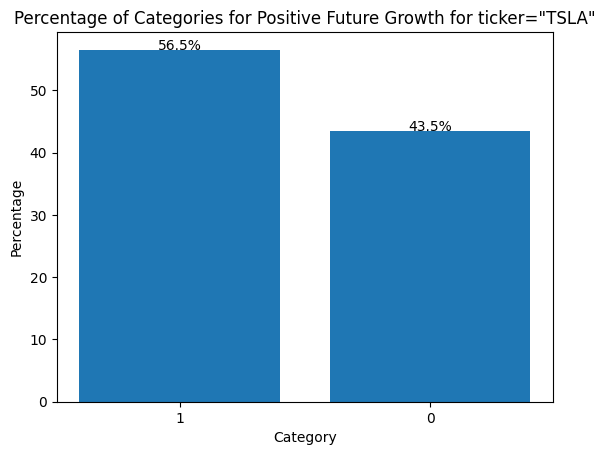

In [20]:
# Calculate value counts
value_counts = tsla_df['is_positive_growth_30d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(tsla_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="TSLA"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

## 1.2) Dynamic visualization of candlestick chart for OHLCV

In [21]:
# Candlestick charts : https://plotly.com/python/candlestick-charts/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=tsla_df_filtered_from_2020.index,
                open=tsla_df_filtered_from_2020.Open,
                high=tsla_df_filtered_from_2020.High,
                low=tsla_df_filtered_from_2020.Low,
                close=tsla_df_filtered_from_2020.Close)
               ])

fig.update_layout(
    title="TLSA's daily candlestick chart from 2020",
    title_x=0.5,  # Set title x-position to center
    xaxis_rangeslider_visible=True
    )

fig.show()

# 2) Macro Indicators

## 2.0) Selected indicators from module 1 (DAX, DJI, EPI, GDP, CPI, FEDrate, DGS1, DGS5, DGS10)

In [22]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 9; day=22
Period for indexes: 1955-09-22 to 2025-09-22 


In [23]:
# reuse code for ealier covered indicators
ticker_obj = yf.Ticker("^GDAXI") # Global X DAX Germany ETF
dax_daily = ticker_obj.history(period = "max", interval = "1d")

In [24]:
for i in [1,3,7,30,90,365]:
  #DEBUG: dax_daily['Adj Close_sh_m_'+str(i)+'d'] = dax_daily['Adj Close'].shift(i)
  dax_daily['growth_dax_'+str(i)+'d'] = dax_daily['Close'] / dax_daily['Close'].shift(i)

In [25]:
dax_daily.head()

Open         High          Low        Close  \
Date                                                                            
1987-12-30 00:00:00+01:00  1005.190002  1005.190002  1005.190002  1005.190002   
1988-01-04 00:00:00+01:00   956.489990   956.489990   956.489990   956.489990   
1988-01-05 00:00:00+01:00   996.099976   996.099976   996.099976   996.099976   
1988-01-06 00:00:00+01:00  1006.010010  1006.010010  1006.010010  1006.010010   
1988-01-07 00:00:00+01:00  1014.469971  1014.469971  1014.469971  1014.469971   

                           Volume  Dividends  Stock Splits  growth_dax_1d  \
Date                                                                        
1987-12-30 00:00:00+01:00       0        0.0           0.0            NaN   
1988-01-04 00:00:00+01:00       0        0.0           0.0       0.951551   
1988-01-05 00:00:00+01:00       0        0.0           0.0       1.041412   
1988-01-06 00:00:00+01:00       0        0.0           0.0       1.009949   
1988-01-07 00:00:00+01:00       0        0.0           0.0       1.008409   

                           growth_dax_3d  growth_dax_7d  growth_dax_30d  \
Date                                                                      
1987-12-30 00:00:00+01:00            NaN            NaN             NaN   
1988-01-04 00:00:00+01:00            NaN            NaN             NaN   
1988-01-05 00:00:00+01:00            NaN            NaN             NaN   
1988-01-06 00:00:00+01:00       1.000816            NaN             NaN   
1988-01-07 00:00:00+01:00       1.060617            NaN             NaN   

                           growth_dax_90d  growth_dax_365d  
Date                                                        
1987-12-30 00:00:00+01:00             NaN              NaN  
1988-01-04 00:00:00+01:00             NaN              NaN  
1988-01-05 00:00:00+01:00             NaN              NaN  
1988-01-06 00:00:00+01:00             NaN              NaN  
1988-01-07 00:00:00+01:00             NaN              NaN

In [26]:
dax_daily.tail(2)

Open          High           Low  \
Date                                                                  
2025-09-19 00:00:00+02:00  23723.339844  23785.240234  23599.259766   
2025-09-22 00:00:00+02:00  23567.490234  23589.250000  23424.439453   

                                  Close     Volume  Dividends  Stock Splits  \
Date                                                                          
2025-09-19 00:00:00+02:00  23639.410156  213887300        0.0           0.0   
2025-09-22 00:00:00+02:00  23495.960938          0        0.0           0.0   

                           growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-09-19 00:00:00+02:00       0.998517       1.013295       1.000273   
2025-09-22 00:00:00+02:00       0.993932       1.005856       0.991238   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-09-19 00:00:00+02:00        0.978337        0.994614         1.311364  
2025-09-22 00:00:00+02:00        0.975692        0.981658         1.322507

In [27]:
GROWTH_KEYS = [k for k in dax_daily.keys() if k.startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)

growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-09-22 00:00:00+02:00       0.993932       1.005856       0.991238   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-09-22 00:00:00+02:00        0.975692        0.981658         1.322507

In [28]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Close'] / df['Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

In [29]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")


dji_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [30]:
dji_daily

Open          High           Low  \
Date                                                                  
1992-01-02 00:00:00-05:00   3152.100098   3172.629883   3139.310059   
1992-01-03 00:00:00-05:00   3172.399902   3210.639893   3165.919922   
1992-01-06 00:00:00-05:00   3201.500000   3213.330078   3191.860107   
1992-01-07 00:00:00-05:00   3200.100098   3210.199951   3184.479980   
1992-01-08 00:00:00-05:00   3204.800049   3229.199951   3185.820068   
...                                 ...           ...           ...   
2025-09-15 00:00:00-04:00  45848.390625  45978.429688  45771.878906   
2025-09-16 00:00:00-04:00  45919.539062  45967.109375  45667.421875   
2025-09-17 00:00:00-04:00  45778.398438  46261.949219  45687.589844   
2025-09-18 00:00:00-04:00  46056.550781  46317.519531  45954.730469   
2025-09-19 00:00:00-04:00  46211.160156  46396.468750  46105.019531   

                                  Close     Volume  Dividends  Stock Splits  
Date                                                                         
1992-01-02 00:00:00-05:00   3172.399902   23550000        0.0           0.0  
1992-01-03 00:00:00-05:00   3201.500000   23620000        0.0           0.0  
1992-01-06 00:00:00-05:00   3200.100098   27280000        0.0           0.0  
1992-01-07 00:00:00-05:00   3204.800049   25510000        0.0           0.0  
1992-01-08 00:00:00-05:00   3203.899902   29040000        0.0           0.0  
...                                 ...        ...        ...           ...  
2025-09-15 00:00:00-04:00  45883.449219  401500000        0.0           0.0  
2025-09-16 00:00:00-04:00  45757.898438  443400000        0.0           0.0  
2025-09-17 00:00:00-04:00  46018.320312  509830000        0.0           0.0  
2025-09-18 00:00:00-04:00  46142.421875  489090000        0.0           0.0  
2025-09-19 00:00:00-04:00  46315.269531  972580000        0.0           0.0  

[8490 rows x 7 columns]

In [31]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

growth_dji_1d  growth_dji_3d  growth_dji_7d  \
Date                                                                     
2025-09-18 00:00:00-04:00       1.002697       1.005644       1.009431   
2025-09-19 00:00:00-04:00       1.003746       1.012181       1.018121   

                           growth_dji_30d  growth_dji_90d  growth_dji_365d  
Date                                                                        
2025-09-18 00:00:00-04:00        1.044109        1.118621         1.195493  
2025-09-19 00:00:00-04:00        1.053371        1.092081         1.190500

In [32]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(
                     period = "max",
                     interval = "1d")

epi_etf_daily.tail(2)

Open       High        Low      Close  Volume  \
Date                                                                            
2025-09-18 00:00:00-04:00  45.630001  45.630001  45.400002  45.500000  782100   
2025-09-19 00:00:00-04:00  45.740002  45.759998  45.570000  45.700001  501900   

                           Dividends  Stock Splits  Capital Gains  
Date                                                               
2025-09-18 00:00:00-04:00        0.0           0.0            0.0  
2025-09-19 00:00:00-04:00        0.0           0.0            0.0

In [33]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily,'epi')
epi_etf_daily_to_merge.tail(2)

growth_epi_1d  growth_epi_3d  growth_epi_7d  \
Date                                                                     
2025-09-18 00:00:00-04:00       0.993667       1.006637       1.022702   
2025-09-19 00:00:00-04:00       1.004396       1.002413       1.016233   

                           growth_epi_30d  growth_epi_90d  growth_epi_365d  
Date                                                                        
2025-09-18 00:00:00-04:00        1.027088        1.028016         1.036111  
2025-09-19 00:00:00-04:00        1.025353        0.994776         1.030368

In [34]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(2)

GDPPOT  gdppot_us_yoy  gdppot_us_qoq
DATE                                              
2025-04-01  23376.07       0.023029       0.005716
2025-07-01  23510.18       0.023013       0.005737

In [35]:
gdppot.head(2)

GDPPOT  gdppot_us_yoy  gdppot_us_qoq
DATE                                                 
1955-10-01  3019.152595            NaN            NaN
1956-01-01  3038.588138            NaN       0.006437

In [36]:
gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)

gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-07-01       0.023013       0.005737

In [37]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(2)

CPILFESL  cpi_core_yoy  cpi_core_mom
DATE                                            
2025-07-01   328.656      0.030486      0.003223
2025-08-01   329.793      0.031122      0.003460

In [38]:
cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

cpi_core_yoy  cpi_core_mom
DATE                                  
2025-07-01      0.030486      0.003223
2025-08-01      0.031122      0.003460

In [39]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)

FEDFUNDS
DATE                
2025-07-01      4.33
2025-08-01      4.33

In [40]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)

DGS1
DATE            
2025-09-17  3.60
2025-09-18  3.61

In [41]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

DGS5
DATE            
2025-09-17  3.62
2025-09-18  3.67

In [42]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)

DGS10
DATE             
2025-09-17   4.06
2025-09-18   4.11

## 2.1) VIX - Volatility Index

In [43]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/

ticker_obj = yf.Ticker("^VIX")

# vix = yf.download(tickers = "^VIX",
#                      period = "max",
#                      interval = "1d")

vix = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [44]:
vix.tail(2)

Open       High    Low      Close  Volume  \
Date                                                                        
2025-09-19 00:00:00-05:00  15.760000  16.129999  15.29  15.450000       0   
2025-09-22 00:00:00-05:00  16.139999  16.350000  16.09  16.110001       0   

                           Dividends  Stock Splits  
Date                                                
2025-09-19 00:00:00-05:00        0.0           0.0  
2025-09-22 00:00:00-05:00        0.0           0.0

In [45]:
vix_to_merge = vix['Close']
vix_to_merge.tail()

Date
2025-09-16 00:00:00-05:00    16.360001
2025-09-17 00:00:00-05:00    15.720000
2025-09-18 00:00:00-05:00    15.700000
2025-09-19 00:00:00-05:00    15.450000
2025-09-22 00:00:00-05:00    16.110001
Name: Close, dtype: float64

<Axes: title={'center': 'VIX value over time'}, xlabel='Date'>

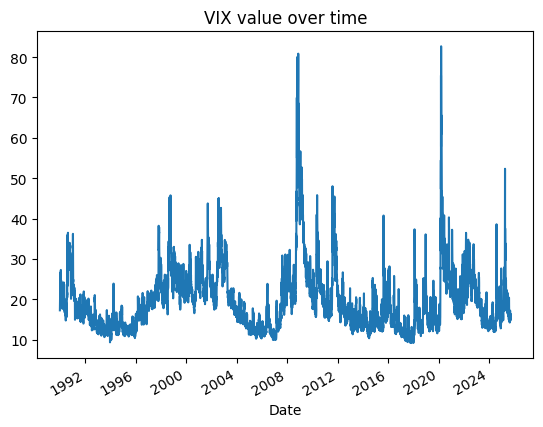

In [46]:
# Static graphs: hard to zoom in and get the exact dates of spikes
vix['Close'].plot.line(title = "VIX value over time")

In [47]:
# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="Close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 2.2) Gold - other assets

In [48]:
# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF

ticker_obj = yf.Ticker("GC=F")

# gold = yf.download(tickers = "GC=F",
#                      period = "max",
#                      interval = "1d")

gold = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [49]:
gold.head(1)

Open        High         Low       Close  \
Date                                                                        
2000-08-30 00:00:00-04:00  273.899994  273.899994  273.899994  273.899994   

                           Volume  Dividends  Stock Splits  
Date                                                        
2000-08-30 00:00:00-04:00       0        0.0           0.0

In [50]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

growth_gold_1d  growth_gold_3d  growth_gold_7d  \
Date                                                                        
2025-09-19 00:00:00-04:00        1.007630        0.995283        1.007657   
2025-09-22 00:00:00-04:00        1.023151        1.020289        1.032885   

                           growth_gold_30d  growth_gold_90d  growth_gold_365d  
Date                                                                           
2025-09-19 00:00:00-04:00         1.079758         1.133074          1.566674  
2025-09-22 00:00:00-04:00         1.092292         1.180770          1.612509

In [51]:
# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y="Close",
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 2.3) WTI Crude and Brent Oil

In [52]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/

ticker_obj = yf.Ticker("CL=F")

# crude_oil = yf.download(tickers = "CL=F",
#                      period = "max",
#                      interval = "1d")

crude_oil = ticker_obj.history(
                     period = "max",
                     interval = "1d")

In [53]:
crude_oil

Open       High        Low      Close  Volume  \
Date                                                                            
2000-08-23 00:00:00-04:00  31.950001  32.799999  31.950001  32.049999   79385   
2000-08-24 00:00:00-04:00  31.900000  32.240002  31.400000  31.629999   72978   
2000-08-25 00:00:00-04:00  31.700001  32.099998  31.320000  32.049999   44601   
2000-08-28 00:00:00-04:00  32.040001  32.919998  31.860001  32.869999   46770   
2000-08-29 00:00:00-04:00  32.820000  33.029999  32.560001  32.720001   49131   
...                              ...        ...        ...        ...     ...   
2025-09-16 00:00:00-04:00  63.310001  64.760002  62.889999  64.519997  234250   
2025-09-17 00:00:00-04:00  64.589996  64.669998  63.689999  64.050003  165427   
2025-09-18 00:00:00-04:00  63.990002  64.550003  63.330002  63.570000   82321   
2025-09-19 00:00:00-04:00  63.590000  63.650002  62.599998  62.680000   82321   
2025-09-22 00:00:00-04:00  62.299999  63.000000  61.630001  61.650002   82541   

                           Dividends  Stock Splits  
Date                                                
2000-08-23 00:00:00-04:00        0.0           0.0  
2000-08-24 00:00:00-04:00        0.0           0.0  
2000-08-25 00:00:00-04:00        0.0           0.0  
2000-08-28 00:00:00-04:00        0.0           0.0  
2000-08-29 00:00:00-04:00        0.0           0.0  
...                              ...           ...  
2025-09-16 00:00:00-04:00        0.0           0.0  
2025-09-17 00:00:00-04:00        0.0           0.0  
2025-09-18 00:00:00-04:00        0.0           0.0  
2025-09-19 00:00:00-04:00        0.0           0.0  
2025-09-22 00:00:00-04:00        0.0           0.0  

[6297 rows x 7 columns]

In [54]:
crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

growth_wti_oil_1d  growth_wti_oil_3d  \
Date                                                              
2025-09-19 00:00:00-04:00           0.986000           0.971482   
2025-09-22 00:00:00-04:00           0.983567           0.962529   

                           growth_wti_oil_7d  growth_wti_oil_30d  \
Date                                                               
2025-09-19 00:00:00-04:00           0.984451            0.981215   
2025-09-22 00:00:00-04:00           0.988456            0.965091   

                           growth_wti_oil_90d  growth_wti_oil_365d  
Date                                                                
2025-09-19 00:00:00-04:00            0.984451             0.735422  
2025-09-22 00:00:00-04:00            0.976247             0.715114

In [55]:
# Dynamic visualisation
fig = px.line(crude_oil,
              x=crude_oil.index,
              y="Close",
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [56]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/

ticker_obj = yf.Ticker("BZ=F")

# brent_oil = yf.download(tickers = "BZ=F",
#                      period = "max",
#                      interval = "1d")

brent_oil = ticker_obj.history(
                     period = "max",
                     interval = "1d")

brent_oil.tail(2)

Open       High        Low      Close  Volume  \
Date                                                                            
2025-09-19 00:00:00-04:00  67.459999  67.559998  66.430000  66.680000   29610   
2025-09-22 00:00:00-04:00  66.139999  66.650002  65.379997  65.379997   10722   

                           Dividends  Stock Splits  
Date                                                
2025-09-19 00:00:00-04:00        0.0           0.0  
2025-09-22 00:00:00-04:00        0.0           0.0

In [57]:
brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

growth_brent_oil_1d  growth_brent_oil_3d  \
Date                                                                  
2025-09-19 00:00:00-04:00             0.988731             0.973857   
2025-09-22 00:00:00-04:00             0.980504             0.962178   

                           growth_brent_oil_7d  growth_brent_oil_30d  \
Date                                                                   
2025-09-19 00:00:00-04:00             0.987998              1.003763   
2025-09-22 00:00:00-04:00             0.985084              0.981829   

                           growth_brent_oil_90d  growth_brent_oil_365d  
Date                                                                    
2025-09-19 00:00:00-04:00              1.000750               0.745694  
2025-09-22 00:00:00-04:00              0.989257               0.722591

In [58]:
# Dynamic visualisation
fig = px.line(brent_oil,
              x=brent_oil.index,
              y="Close",
              title='Brent Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


# 3) Explore Fundamental indicators

* Read about "Ratio Analysis" to learn about more ratios: https://www.investopedia.com/terms/r/ratioanalysis.asp
* https://algotrading101.com/learn/yahoo-finance-api-guide/

In [165]:
# let's select some set of stocks: e.g. top US companies on 'Employees':
# https://companiesmarketcap.com/usa/largest-american-companies-by-number-of-employees/

US_TOP_EMPLOYEES_STOCKS = ['WMT','AMZN','UPS','HD','CNXC','TGT','KR','UNH','BRK-B','SBUX']

# WMT
ticker = US_TOP_EMPLOYEES_STOCKS[0]

# WMT ticker
one_company = yf.Ticker(ticker)

In [166]:
# Fundamental info appears close earning dates, you need to download it and use quickly (before/after trading day),
#  unless you're a fundamental long-term investor looking for a several months-quarters-years strategy (period between buy and sell)
# This dfthis is the easiest thing to join with the main dataset and get "some" technical indicators present
# WMT ticker
eps_earnings = one_company.earnings_dates
eps_earnings['Ticker'] = ticker
eps_earnings

EPS Estimate  Reported EPS  Surprise(%) Event Type  \
Earnings Date                                                                   
2026-02-19 08:00:00-05:00           NaN           NaN          NaN       Call   
2025-11-20 08:00:00-05:00           NaN           NaN          NaN       Call   
2025-08-21 08:00:00-04:00           NaN           NaN          NaN       Call   
2025-06-05 11:30:00-04:00          0.49           NaN          NaN    Meeting   
2025-05-15 07:01:00-04:00          0.58          0.61         5.93   Earnings   
2025-02-20 06:59:00-05:00          0.64          0.66         2.57   Earnings   
2024-11-19 07:00:00-05:00          0.53          0.58         8.82   Earnings   
2024-08-15 07:02:00-04:00          0.65          0.67         3.78   Earnings   
2024-05-16 07:01:00-04:00          0.52          0.60        14.60   Earnings   
2024-02-20 07:09:00-05:00          0.55          0.60         9.41   Earnings   
2023-11-16 07:02:00-05:00          1.52          1.53         0.38   Earnings   
2023-08-17 07:02:00-04:00          1.71          1.84         7.91   Earnings   

                          Ticker  
Earnings Date                     
2026-02-19 08:00:00-05:00    WMT  
2025-11-20 08:00:00-05:00    WMT  
2025-08-21 08:00:00-04:00    WMT  
2025-06-05 11:30:00-04:00    WMT  
2025-05-15 07:01:00-04:00    WMT  
2025-02-20 06:59:00-05:00    WMT  
2024-11-19 07:00:00-05:00    WMT  
2024-08-15 07:02:00-04:00    WMT  
2024-05-16 07:01:00-04:00    WMT  
2024-02-20 07:09:00-05:00    WMT  
2023-11-16 07:02:00-05:00    WMT  
2023-08-17 07:02:00-04:00    WMT

In [167]:
one_company.calendar

{'Dividend Date': datetime.date(2026, 1, 5),
 'Ex-Dividend Date': datetime.date(2025, 12, 12),
 'Earnings Date': [datetime.date(2025, 11, 20)],
 'Earnings High': 0.64,
 'Earnings Low': 0.58,
 'Earnings Average': 0.60011,
 'Revenue High': 176366000000,
 'Revenue Low': 173922000000,
 'Revenue Average': 175285427950}

In [168]:
one_company.financials

2025-01-31  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  2.340000e-01   
Normalized EBITDA                                   4.201000e+10   
Total Unusual Items                                          NaN   
Total Unusual Items Excluding Goodwill                       NaN   
Net Income From Continuing Operation Net Minori...  1.943600e+10   
Reconciled Depreciation                             1.297300e+10   
Reconciled Cost Of Revenue                          5.117530e+11   
EBITDA                                              4.201000e+10   
EBIT                                                2.903700e+10   
Net Interest Income                                -2.245000e+09   
Interest Expense                                    2.728000e+09   
Interest Income                                     4.830000e+08   
Normalized Income                                   1.943600e+10   
Net Income From Continuing And Discontinued Ope...  1.943600e+10   
Total Expenses                                      6.516370e+11   
Total Operating Income As Reported                  2.934800e+10   
Diluted Average Shares                              8.081000e+09   
Basic Average Shares                                8.041000e+09   
Diluted EPS                                         2.410000e+00   
Basic EPS                                           2.420000e+00   
Diluted NI Availto Com Stockholders                 1.943600e+10   
Net Income Common Stockholders                      1.943600e+10   
Net Income                                          1.943600e+10   
Minority Interests                                 -7.210000e+08   
Net Income Including Noncontrolling Interests       2.015700e+10   
Net Income Continuous Operations                    2.015700e+10   
Tax Provision                                       6.152000e+09   
Pretax Income                                       2.630900e+10   
Other Income Expense                               -7.940000e+08   
Other Non Operating Income Expenses                -7.940000e+08   
Special Income Charges                                       NaN   
Other Special Charges                                        NaN   
Net Non Operating Interest Income Expense          -2.245000e+09   
Interest Expense Non Operating                      2.728000e+09   
Interest Income Non Operating                       4.830000e+08   
Operating Income                                    2.934800e+10   
Operating Expense                                   1.398840e+11   
Other Operating Expenses                            1.398840e+11   
Selling General And Administration                  1.398840e+11   
Gross Profit                                        1.692320e+11   
Cost Of Revenue                                     5.117530e+11   
Total Revenue                                       6.809850e+11   
Operating Revenue                                   6.809850e+11   

                                                      2024-01-31  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  2.550000e-01   
Normalized EBITDA                                   3.638400e+10   
Total Unusual Items                                 0.000000e+00   
Total Unusual Items Excluding Goodwill              0.000000e+00   
Net Income From Continuing Operation Net Minori...  1.551100e+10   
Reconciled Depreciation                             1.185300e+10   
Reconciled Cost Of Revenue                          4.901420e+11   
EBITDA                                              3.638400e+10   
EBIT                                                2.453100e+10   
Net Interest Income                                -2.137000e+09   
Interest Expense                                    2.683000e+09   
Interest Income                                     5.460000e+08   
Normalized Income                        

In [169]:
EPS = one_company.financials.loc['Basic EPS']
EPS

2025-01-31    2.42
2024-01-31    1.92
2023-01-31    1.43
2022-01-31    1.63
2021-01-31     NaN
Name: Basic EPS, dtype: float64

In [170]:
# or should we use NORMALIZED_EBITDA?
EBITDA = one_company.financials.loc['EBITDA']
EBITDA_margin = one_company.financials.loc['EBITDA'] /  one_company.financials.loc['Total Revenue']

In [171]:
EBITDA_margin

2025-01-31    0.061690
2024-01-31    0.056137
2023-01-31    0.049222
2022-01-31    0.054732
2021-01-31         NaN
dtype: float64

In [172]:
NET_INCOME = one_company.financials.loc['Net Income']
NET_INCOME_margin = one_company.financials.loc['Net Income'] /  one_company.financials.loc['Total Revenue']

In [173]:
NET_INCOME

2025-01-31    1.943600e+10
2024-01-31    1.551100e+10
2023-01-31    1.168000e+10
2022-01-31    1.367300e+10
2021-01-31             NaN
Name: Net Income, dtype: float64

In [174]:
# Compare with Public information - you can fully replicate the numbers (yearly and/or quarterly):
# https://www.wsj.com/market-data/quotes/WMT/financials/annual/income-statement
NET_INCOME_margin

2025-01-31    0.028541
2024-01-31    0.023932
2023-01-31    0.019107
2022-01-31    0.023872
2021-01-31         NaN
dtype: float64

In [175]:
# Combine the series into a DataFrame
df_fin_ratios = pd.DataFrame({
    'NET_INCOME_margin': 100.0 * NET_INCOME_margin, #for visualisation -- Margin in %
    'EBITDA_margin': 100.0 *EBITDA_margin, #for visualisation -- Margin in %
    'EPS': EPS
})

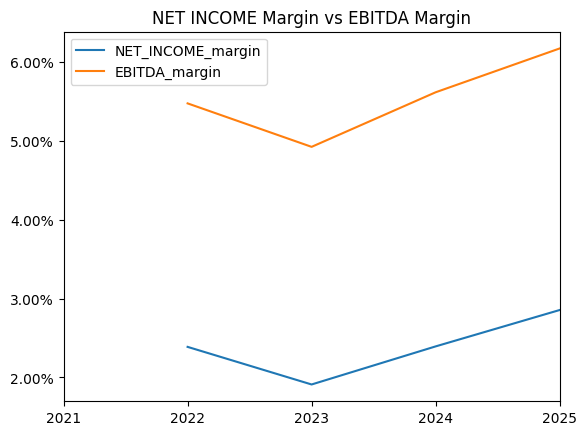

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df_fin_ratios is your DataFrame containing the financial ratios
# Make sure you have already created this DataFrame

# Plotting the specified columns
ax = df_fin_ratios[['NET_INCOME_margin','EBITDA_margin']].plot.line()

# Setting the y-axis formatter to display values as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding title
plt.title('NET INCOME Margin vs EBITDA Margin')

# Displaying the plot
plt.show()

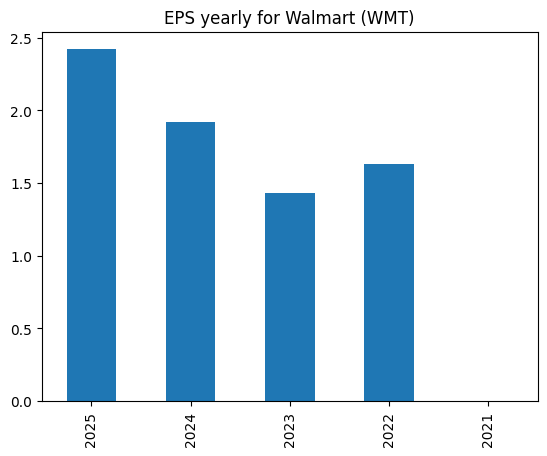

In [177]:
EPS_year = df_fin_ratios['EPS'].index.year

df_fin_ratios['EPS'].plot.bar(title = 'EPS yearly for Walmart (WMT)')

plt.xticks(range(len(EPS_year)), EPS_year)
# Displaying the plot
plt.show()

# 4) Get all Daily OHCLV data for stocks of interest

In [59]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['TSLA', '^GSPC', '^NDX', 'BTC-USD', 'ETH-USD', 'AAPL', 'MSFT', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

In [60]:
ALL_TICKERS = US_STOCKS
ALL_TICKERS

['TSLA',
 '^GSPC',
 '^NDX',
 'BTC-USD',
 'ETH-USD',
 'AAPL',
 'MSFT',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM']

In [61]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  ticker_obj = yf.Ticker(ticker)

  # historyPrices = yf.download(tickers = ticker,
  #                    period = "max",
  #                    interval = "1d")
  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(i)
  historyPrices['growth_future_30d'] = historyPrices['Close'].shift(-30) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10, 20, 50, 200 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['SMA50']= historyPrices['Close'].rolling(50).mean()
  historyPrices['SMA200']= historyPrices['Close'].rolling(200).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']
  historyPrices['high_touching_SMA50_relative'] = (historyPrices.High - historyPrices.SMA50) / historyPrices['Close']
  historyPrices['low_touching_SMA50_relative'] = (historyPrices.Low - historyPrices.SMA50) / historyPrices['Close']
  historyPrices['high_touching_SMA200_relative'] = (historyPrices.High - historyPrices.SMA200) / historyPrices['Close']
  historyPrices['low_touching_SMA200_relative'] = (historyPrices.Low - historyPrices.SMA200) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_30d_future'] = np.where(historyPrices['growth_future_30d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

0 TSLA
1 ^GSPC
2 ^NDX
3 BTC-USD
4 ETH-USD
5 AAPL
6 MSFT
7 GOOG
8 NVDA
9 AMZN
10 META
11 BRK-B
12 LLY
13 AVGO
14 V
15 JPM


In [62]:
stocks_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker', 'Year', 'Month', 'Weekday', 'Date', 'growth_1d', 'growth_3d',
       'growth_7d', 'growth_30d', 'growth_90d', 'growth_365d',
       'growth_future_30d', 'SMA10', 'SMA20', 'SMA50', 'SMA200',
       'growing_moving_average', 'high_minus_low_relative',
       'high_touching_SMA50_relative', 'low_touching_SMA50_relative',
       'high_touching_SMA200_relative', 'low_touching_SMA200_relative',
       'volatility', 'is_positive_growth_30d_future'],
      dtype='object')

In [63]:
# unique tickers
stocks_df.Ticker.nunique()

16

In [64]:
# count of observations by stock
stocks_df.Ticker.value_counts()

Ticker
^GSPC      24546
LLY        13438
JPM        11472
AAPL       11284
^NDX       10071
MSFT        9958
BRK-B       7389
AMZN        7132
NVDA        6707
GOOG        5306
V           4405
AVGO        4056
BTC-USD     4024
TSLA        3831
META        3354
ETH-USD     2875
Name: count, dtype: int64

In [65]:
stocks_df.groupby(['Ticker']).Date.agg(['min','max'])

min         max
Ticker                         
AAPL     1980-12-12  2025-09-19
AMZN     1997-05-15  2025-09-19
AVGO     2009-08-06  2025-09-19
BRK-B    1996-05-09  2025-09-19
BTC-USD  2014-09-17  2025-09-22
ETH-USD  2017-11-09  2025-09-22
GOOG     2004-08-19  2025-09-19
JPM      1980-03-17  2025-09-19
LLY      1972-06-01  2025-09-19
META     2012-05-18  2025-09-19
MSFT     1986-03-13  2025-09-19
NVDA     1999-01-22  2025-09-19
TSLA     2010-06-29  2025-09-19
V        2008-03-19  2025-09-19
^GSPC    1927-12-30  2025-09-19
^NDX     1985-10-01  2025-09-19

In [66]:
#  average growth 365days
stocks_df[stocks_df.Year>=2020].groupby(by=['Year']).growth_365d.mean()

Year
2020    1.744268
2021    3.121039
2022    1.118414
2023    1.141379
2024    1.984595
2025    1.533420
Name: growth_365d, dtype: float64

In [67]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [68]:
# filtering only on stats after 2000
stocks_df[stocks_df.Date>='2000-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 86063 entries, 0 to 129847
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Open                           86063 non-null  float64       
 1   High                           86063 non-null  float64       
 2   Low                            86063 non-null  float64       
 3   Close                          86063 non-null  float64       
 4   Volume                         86063 non-null  int64         
 5   Dividends                      86063 non-null  float64       
 6   Stock Splits                   86063 non-null  float64       
 7   Ticker                         86063 non-null  object        
 8   Year                           86063 non-null  int32         
 9   Month                          86063 non-null  int32         
 10  Weekday                        86063 non-null  int32         
 11  Date               

In [69]:
stocks_df[stocks_df.Date=='2025-04-01'].tail()

Open        High         Low       Close    Volume  Dividends  \
96358   531.880005  536.409973  527.500000  532.989990   4130600        0.0   
109796  815.135059  817.186337  793.626510  801.821655   2987700        0.0   
113852  165.979322  168.313839  163.036253  168.124283  20472400        0.0   
118257  349.244439  349.254414  341.401293  345.168396   7473300        0.0   
129729  239.978592  243.015177  238.257545  241.007278   8054700        0.0   

        Stock Splits Ticker  Year  Month  ...       SMA50      SMA200  \
96358            0.0  BRK-B  2025      4  ...  494.311400  460.240951   
109796           0.0    LLY  2025      4  ...  841.367731  849.501585   
113852           0.0   AVGO  2025      4  ...  205.773861  182.570512   
118257           0.0      V  2025      4  ...  342.770051  299.135172   
129729           0.0    JPM  2025      4  ...  253.854069  226.625983   

        growing_moving_average  high_minus_low_relative  \
96358                        1                 0.016717   
109796                       0                 0.029383   
113852                       0                 0.031391   
118257                       1                 0.022752   
129729                       1                 0.019741   

        high_touching_SMA50_relative  low_touching_SMA50_relative  \
96358                       0.078986                     0.062269   
109796                     -0.030158                    -0.059541   
113852                     -0.222811                    -0.254202   
118257                      0.018786                    -0.003965   
129729                     -0.044973                    -0.064714   

        high_touching_SMA200_relative  low_touching_SMA200_relative  \
96358                        0.142909                      0.126192   
109796                      -0.040302                     -0.069685   
113852                      -0.084798                     -0.116189   
118257                       0.145202                      0.122451   
129729                       0.068003                      0.048262   

        volatility  is_positive_growth_30d_future  
96358   270.753144                              0  
109796  642.808135                              0  
113852  237.945591                              1  
118257  139.849091                              1  
129729  206.047895                              1  

[5 rows x 31 columns]

#5) Get Technical Indicators with TA-lib
* PythonInvest article on Tech. Indicators
* Code for generating 100+ tech. indicators/patterns : https://github.com/realmistic/PythonInvest-basic-fin-analysis/blob/master/colab_notebooks/Part14_Exploring_Tech_Indicators_For_Stocks_and_Crypto.ipynb

Indicator groups: https://github.com/TA-Lib/ta-lib-python/blob/master/README.md

* Overlap Studies (17)
* Momentum Indicators (30+)
* Volume Indicators (3)
* Cycle Indicators (5)
* Price Transform (4)
* Volatility Indicators (3)
* Pattern Recognition (60)

In [ ]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
# !curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
# import talib

# [2025 way - seems to be working] https://medium.com/@Tobi_Lux/collaboration-of-colab-yfinance-and-ta-lib-recent-issues-6cd8eebb56b0
# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# !pip install conda-package-handling
# !wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
# !cph x ta-lib-0.5.1-py311h9ecbd09_0.conda

# # 🛠 Option 1: Remove the existing directory first (clean, but destructive)
# !rm -rf /usr/local/lib/python3.11/dist-packages/talib

# !mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
# import talib

[2025 ZB way] How to install Talib in Google Colab https://laid-back-scientist.com/en/talib

In [3]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   1902      0 --:--:-- --:--:-- --:--:--  1909
100   375  100   375    0     0    973      0 --:--:-- --:--:-- --:--:--     0
100 1299k  100 1299k    0     0  2116k      0 --:--:-- --:--:-- --:--:-- 2116k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [70]:
import talib

## 5.1) Momentum indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [71]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

## 5.2 Volume, Volatility, Cycle, Price indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md

In [72]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

## 5.3) Pattern indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md

In [73]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

## 5.4) Calculate Tech Indicators and Merge to the original dataframe

In [74]:
# Volume needs to be float, not int
stocks_df['Volume'] = stocks_df['Volume']*1.0

In [75]:
# to resolve an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close', 'Volume', 'Close']:
  stocks_df.loc[:,f] = stocks_df.loc[:,f].astype('float64')

In [76]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129848 entries, 0 to 129847
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Open                           129848 non-null  float64       
 1   High                           129848 non-null  float64       
 2   Low                            129848 non-null  float64       
 3   Close                          129848 non-null  float64       
 4   Volume                         129848 non-null  float64       
 5   Dividends                      129848 non-null  float64       
 6   Stock Splits                   129848 non-null  float64       
 7   Ticker                         129848 non-null  object        
 8   Year                           129848 non-null  int32         
 9   Month                          129848 non-null  int32         
 10  Weekday                        129848 non-null  int32         
 11  

In [77]:
import pandas as pd
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

current_ticker_data = None
i=0
for ticker in ALL_TICKERS:
  i+=1
  print(f'{i}/{len(ALL_TICKERS)} Current ticker is {ticker}')
  current_ticker_data = stocks_df[stocks_df.Ticker.isin([ticker])]
  # need to have same 'utc' time on both sides
  # https://stackoverflow.com/questions/73964894/you-are-trying-to-merge-on-datetime64ns-utc-and-datetime64ns-columns-if-yo
  current_ticker_data['Date']= pd.to_datetime(current_ticker_data['Date'], utc=True)

  # 3 calls to get additional features
  df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
  df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
  # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)

  df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
  df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
  # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)

  df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
  df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
  # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)

  # merge to one df
  m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")

  if merged_df_with_tech_ind.empty:
    merged_df_with_tech_ind = m3
  else:
    merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)

1/16 Current ticker is TSLA
2/16 Current ticker is ^GSPC
3/16 Current ticker is ^NDX
4/16 Current ticker is BTC-USD
5/16 Current ticker is ETH-USD
6/16 Current ticker is AAPL
7/16 Current ticker is MSFT
8/16 Current ticker is GOOG
9/16 Current ticker is NVDA
10/16 Current ticker is AMZN
11/16 Current ticker is META
12/16 Current ticker is BRK-B
13/16 Current ticker is LLY
14/16 Current ticker is AVGO
15/16 Current ticker is V
16/16 Current ticker is JPM


In [78]:
merged_df_with_tech_ind

Open        High         Low       Close       Volume  Dividends  \
0        1.266667    1.666667    1.169333    1.592667  281494500.0        0.0   
1        1.719333    2.028000    1.553333    1.588667  257806500.0        0.0   
2        1.666667    1.728000    1.351333    1.464000  123282000.0        0.0   
3        1.533333    1.540000    1.247333    1.280000   77097000.0        0.0   
4        1.333333    1.333333    1.055333    1.074000  103003500.0        0.0   
...           ...         ...         ...         ...          ...        ...   
11467  307.170013  309.950012  307.170013  308.899994    7122000.0        0.0   
11468  310.000000  310.899994  307.130005  309.190002   10525600.0        0.0   
11469  310.390015  312.910004  308.769989  311.750000    8657800.0        0.0   
11470  311.790009  313.440002  309.609985  313.230011    8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999   23524000.0        0.0   

       Stock Splits Ticker  Year  Month  ...  cdlspinningtop  \
0               0.0   TSLA  2010      6  ...               0   
1               0.0   TSLA  2010      6  ...               0   
2               0.0   TSLA  2010      7  ...               0   
3               0.0   TSLA  2010      7  ...               0   
4               0.0   TSLA  2010      7  ...               0   
...             ...    ...   ...    ...  ...             ...   
11467           0.0    JPM  2025      9  ...               0   
11468           0.0    JPM  2025      9  ...            -100   
11469           0.0    JPM  2025      9  ...               0   
11470           0.0    JPM  2025      9  ...               0   
11471           0.0    JPM  2025      9  ...               0   

      cdlstalledpattern  cdlsticksandwich  cdltakuru  cdltasukigap  \
0                     0                 0          0             0   
1                     0                 0          0             0   
2                     0                 0          0             0   
3                     0                 0          0             0   
4                     0                 0          0             0   
...                 ...               ...        ...           ...   
11467                 0                 0          0             0   
11468                 0                 0          0             0   
11469                 0                 0          0             0   
11470                 0                 0          0             0   
11471                 0                 0          0             0   

       cdlthrusting  cdltristar  cdlunique3river  cdlupsidegap2crows  \
0                 0           0                0                   0   
1                 0           0                0                   0   
2                 0           0                0                   0   
3                 0           0                0                   0   
4                 0           0                0                   0   
...             ...         ...              ...                 ...   
11467             0           0                0                   0   
11468             0           0                0                   0   
11469             0           0                0                   0   
11470             0           0                0                   0   
11471             0           0                0                   0   

       cdlxsidegap3methods  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
11467                    0  
11468                    0  
11469                    0  
11470                    0  
11471                    0  

[129848 rows x 150 columns]

In [79]:
merged_df_with_tech_ind[merged_df_with_tech_ind.Date=='2024-04-01'].tail()

Open        High         Low       Close      Volume  Dividends  \
7019   421.489990  421.660004  417.809998  420.200012   2716100.0        0.0   
13068  767.727384  769.211393  745.783843  752.442078   2921300.0        0.0   
3686   130.659366  134.335675  130.632762  133.081985  17252000.0        0.0   
4035   277.334426  277.858735  273.802975  275.276886   5084000.0        0.0   
11102  193.391764  194.310418  192.018616  192.376404   7309000.0        0.0   

       Stock Splits Ticker  Year  Month  ...  cdlspinningtop  \
7019            0.0  BRK-B  2024      4  ...               0   
13068           0.0    LLY  2024      4  ...               0   
3686            0.0   AVGO  2024      4  ...               0   
4035            0.0      V  2024      4  ...               0   
11102           0.0    JPM  2024      4  ...               0   

      cdlstalledpattern  cdlsticksandwich  cdltakuru  cdltasukigap  \
7019                  0                 0          0             0   
13068                 0                 0          0             0   
3686                  0                 0          0             0   
4035                  0                 0          0             0   
11102                 0                 0          0             0   

       cdlthrusting  cdltristar  cdlunique3river  cdlupsidegap2crows  \
7019              0           0                0                   0   
13068             0           0                0                   0   
3686              0           0                0                   0   
4035              0           0                0                   0   
11102             0           0                0                   0   

       cdlxsidegap3methods  
7019                     0  
13068                    0  
3686                     0  
4035                     0  
11102                    0  

[5 rows x 150 columns]

In [80]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129848 entries, 0 to 11471
Columns: 150 entries, Open to cdlxsidegap3methods
dtypes: datetime64[ns, UTC](1), float64(78), int32(65), int64(5), object(1)
memory usage: 117.4+ MB


# 6) Merge All Together

In [81]:
merged_df_with_tech_ind.head(1)

Open      High       Low     Close       Volume  Dividends  \
0  1.266667  1.666667  1.169333  1.592667  281494500.0        0.0   

   Stock Splits Ticker  Year  Month  ...  cdlspinningtop cdlstalledpattern  \
0           0.0   TSLA  2010      6  ...               0                 0   

   cdlsticksandwich  cdltakuru  cdltasukigap  cdlthrusting  cdltristar  \
0                 0          0             0             0           0   

   cdlunique3river  cdlupsidegap2crows  cdlxsidegap3methods  
0                0                   0                    0  

[1 rows x 150 columns]

In [82]:
merged_df_with_tech_ind.shape

(129848, 150)

In [83]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)

In [84]:
# merge with dax_daily_to_merge
dax_daily_to_merge.tail(1)

growth_dax_1d  growth_dax_3d  growth_dax_7d  \
Date                                                                     
2025-09-22 00:00:00+02:00       0.993932       1.005856       0.991238   

                           growth_dax_30d  growth_dax_90d  growth_dax_365d  
Date                                                                        
2025-09-22 00:00:00+02:00        0.975692        0.981658         1.322507

In [85]:
dax_daily_to_merge.index = dax_daily_to_merge.index.tz_localize(None)

In [86]:
m2 = pd.merge(merged_df_with_tech_ind,
              dax_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [87]:
m2.tail(1)

Open        High         Low       Close      Volume  Dividends  \
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year  Month  ...  cdltristar cdlunique3river  \
11471           0.0    JPM  2025      9  ...           0               0   

       cdlupsidegap2crows  cdlxsidegap3methods  growth_dax_1d  growth_dax_3d  \
11471                   0                    0       0.998517       1.013295   

       growth_dax_7d  growth_dax_30d  growth_dax_90d  growth_dax_365d  
11471       1.000273        0.978337        0.994614         1.311364  

[1 rows x 156 columns]

In [88]:
# check the same number of records, but columns increased
m2.shape

(129848, 156)

In [89]:
dji_daily_to_merge.index = dji_daily_to_merge.index.tz_localize(None)

In [90]:
m4 = pd.merge(m2,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [91]:
m4.shape

(129848, 162)

In [92]:
m4.tail(1)

Open        High         Low       Close      Volume  Dividends  \
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year  Month  ...  growth_dax_7d growth_dax_30d  \
11471           0.0    JPM  2025      9  ...       1.000273       0.978337   

       growth_dax_90d  growth_dax_365d  growth_dji_1d  growth_dji_3d  \
11471        0.994614         1.311364       1.003746       1.012181   

       growth_dji_7d  growth_dji_30d  growth_dji_90d  growth_dji_365d  
11471       1.018121        1.053371        1.092081           1.1905  

[1 rows x 162 columns]

In [93]:
epi_etf_daily_to_merge.index = epi_etf_daily_to_merge.index.tz_localize(None)

In [94]:
m5 = pd.merge(m4,
              epi_etf_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [95]:
m5.shape

(129848, 168)

In [96]:
# define quarter as the first date of qtr
m5['Quarter'] = m5['Date'].dt.to_period('Q').dt.to_timestamp()
m5['Quarter']

0       2010-04-01
1       2010-04-01
2       2010-07-01
3       2010-07-01
4       2010-07-01
           ...    
11467   2025-07-01
11468   2025-07-01
11469   2025-07-01
11470   2025-07-01
11471   2025-07-01
Name: Quarter, Length: 129848, dtype: datetime64[ns]

In [97]:
gdppot_to_merge.tail(1)

gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-07-01       0.023013       0.005737

In [98]:
m6 = pd.merge(m5,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )

In [99]:
m6.tail(2)

Open        High         Low       Close      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year  Month  ...  growth_dji_365d growth_epi_1d  \
11470           0.0    JPM  2025      9  ...         1.195493      0.993667   
11471           0.0    JPM  2025      9  ...         1.190500      1.004396   

       growth_epi_3d  growth_epi_7d  growth_epi_30d  growth_epi_90d  \
11470       1.006637       1.022702        1.027088        1.028016   
11471       1.002413       1.016233        1.025353        0.994776   

       growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  
11470         1.036111 2025-07-01       0.023013       0.005737  
11471         1.030368 2025-07-01       0.023013       0.005737  

[2 rows x 171 columns]

In [100]:
m6.shape

(129848, 171)

In [101]:
m6['Month'] = m6['Date'].dt.to_period('M').dt.to_timestamp()
m6['Month']

0       2010-06-01
1       2010-06-01
2       2010-07-01
3       2010-07-01
4       2010-07-01
           ...    
11467   2025-09-01
11468   2025-09-01
11469   2025-09-01
11470   2025-09-01
11471   2025-09-01
Name: Month, Length: 129848, dtype: datetime64[ns]

In [102]:
cpilfesl_to_merge.tail(1)

cpi_core_yoy  cpi_core_mom
DATE                                  
2025-08-01      0.031122       0.00346

In [103]:
m7 = pd.merge(m6,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [104]:
# PROBLEM! Last month is not defined
m7.tail(1)

Open        High         Low       Close      Volume  Dividends  \
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_3d growth_epi_7d  \
11471           0.0    JPM  2025 2025-09-01  ...       1.002413      1.016233   

       growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
11471        1.025353        0.994776         1.030368 2025-07-01   

       gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  
11471       0.023013       0.005737           NaN           NaN  

[1 rows x 173 columns]

In [105]:
fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m7[field] = m7[field].ffill()


In [106]:
m7.tail(1)

Open        High         Low       Close      Volume  Dividends  \
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_3d growth_epi_7d  \
11471           0.0    JPM  2025 2025-09-01  ...       1.002413      1.016233   

       growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
11471        1.025353        0.994776         1.030368 2025-07-01   

       gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  
11471       0.023013       0.005737      0.031122       0.00346  

[1 rows x 173 columns]

In [107]:
fedfunds.tail(1)

FEDFUNDS
DATE                
2025-08-01      4.33

In [108]:
m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [109]:
m8.tail(1)

Open        High         Low       Close      Volume  Dividends  \
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_7d  \
11471           0.0    JPM  2025 2025-09-01  ...       1.016233   

      growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
11471       1.025353        0.994776         1.030368 2025-07-01   

       gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  
11471       0.023013       0.005737      0.031122       0.00346       NaN  

[1 rows x 174 columns]

In [110]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].ffill()


In [111]:
m8.tail(1)

Open        High         Low       Close      Volume  Dividends  \
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_7d  \
11471           0.0    JPM  2025 2025-09-01  ...       1.016233   

      growth_epi_30d  growth_epi_90d  growth_epi_365d    Quarter  \
11471       1.025353        0.994776         1.030368 2025-07-01   

       gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  
11471       0.023013       0.005737      0.031122       0.00346      4.33  

[1 rows x 174 columns]

In [112]:
dgs1.tail(1)

DGS1
DATE            
2025-09-18  3.61

In [113]:
m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [114]:
# fix last day later
m9.tail(2)

Open        High         Low       Close      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_30d  \
11470           0.0    JPM  2025 2025-09-01  ...        1.027088   
11471           0.0    JPM  2025 2025-09-01  ...        1.025353   

      growth_epi_90d  growth_epi_365d    Quarter  gdppot_us_yoy  \
11470       1.028016         1.036111 2025-07-01       0.023013   
11471       0.994776         1.030368 2025-07-01       0.023013   

       gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  DGS1  
11470       0.005737      0.031122       0.00346      4.33  3.61  
11471       0.005737      0.031122       0.00346      4.33   NaN  

[2 rows x 175 columns]

In [115]:
m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [116]:
# fix last day later
m10.tail(2)

Open        High         Low       Close      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_90d  \
11470           0.0    JPM  2025 2025-09-01  ...        1.028016   
11471           0.0    JPM  2025 2025-09-01  ...        0.994776   

      growth_epi_365d    Quarter  gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  \
11470        1.036111 2025-07-01       0.023013       0.005737      0.031122   
11471        1.030368 2025-07-01       0.023013       0.005737      0.031122   

       cpi_core_mom  FEDFUNDS  DGS1  DGS5  
11470       0.00346      4.33  3.61  3.67  
11471       0.00346      4.33   NaN   NaN  

[2 rows x 176 columns]

In [117]:
m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [118]:
m11.tail(2)

Open        High         Low       Close      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_epi_365d    Quarter  \
11470           0.0    JPM  2025 2025-09-01  ...         1.036111 2025-07-01   
11471           0.0    JPM  2025 2025-09-01  ...         1.030368 2025-07-01   

       gdppot_us_yoy  gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  \
11470       0.023013       0.005737      0.031122       0.00346      4.33   
11471       0.023013       0.005737      0.031122       0.00346      4.33   

       DGS1  DGS5  DGS10  
11470  3.61  3.67   4.11  
11471   NaN   NaN    NaN  

[2 rows x 177 columns]

In [119]:
vix_to_merge

Date
1990-01-02 00:00:00-06:00    17.240000
1990-01-03 00:00:00-06:00    18.190001
1990-01-04 00:00:00-06:00    19.219999
1990-01-05 00:00:00-06:00    20.110001
1990-01-08 00:00:00-06:00    20.260000
                               ...    
2025-09-16 00:00:00-05:00    16.360001
2025-09-17 00:00:00-05:00    15.720000
2025-09-18 00:00:00-05:00    15.700000
2025-09-19 00:00:00-05:00    15.450000
2025-09-22 00:00:00-05:00    16.110001
Name: Close, Length: 8997, dtype: float64

In [120]:
vix_to_merge.index = vix_to_merge.index.tz_localize(None)

In [121]:
m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [122]:
m12.tail(2)

Open        High         Low     Close_x      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...    Quarter gdppot_us_yoy  \
11470           0.0    JPM  2025 2025-09-01  ... 2025-07-01      0.023013   
11471           0.0    JPM  2025 2025-09-01  ... 2025-07-01      0.023013   

       gdppot_us_qoq  cpi_core_yoy  cpi_core_mom  FEDFUNDS  DGS1  DGS5  DGS10  \
11470       0.005737      0.031122       0.00346      4.33  3.61  3.67   4.11   
11471       0.005737      0.031122       0.00346      4.33   NaN   NaN    NaN   

       Close_y  
11470    15.70  
11471    15.45  

[2 rows x 178 columns]

In [123]:
gold_to_merge.tail(2)

growth_gold_1d  growth_gold_3d  growth_gold_7d  \
Date                                                                        
2025-09-19 00:00:00-04:00        1.007630        0.995283        1.007657   
2025-09-22 00:00:00-04:00        1.023151        1.020289        1.032885   

                           growth_gold_30d  growth_gold_90d  growth_gold_365d  
Date                                                                           
2025-09-19 00:00:00-04:00         1.079758         1.133074          1.566674  
2025-09-22 00:00:00-04:00         1.092292         1.180770          1.612509

In [124]:
gold_to_merge.index = gold_to_merge.index.tz_localize(None)

In [125]:
m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [126]:
m13.tail(2)

Open        High         Low     Close_x      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  DGS1  DGS5  DGS10  Close_y  \
11470           0.0    JPM  2025 2025-09-01  ...  3.61  3.67   4.11    15.70   
11471           0.0    JPM  2025 2025-09-01  ...   NaN   NaN    NaN    15.45   

       growth_gold_1d  growth_gold_3d  growth_gold_7d  growth_gold_30d  \
11470        0.989652        0.989544        1.000110         1.078018   
11471        1.007630        0.995283        1.007657         1.079758   

       growth_gold_90d  growth_gold_365d  
11470         1.131584          1.562680  
11471         1.133074          1.566674  

[2 rows x 184 columns]

In [127]:
crude_oil_to_merge.index = crude_oil_to_merge.index.tz_localize(None)

In [128]:
m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [129]:
m14.tail(2)

Open        High         Low     Close_x      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_gold_7d  \
11470           0.0    JPM  2025 2025-09-01  ...        1.000110   
11471           0.0    JPM  2025 2025-09-01  ...        1.007657   

      growth_gold_30d  growth_gold_90d  growth_gold_365d  growth_wti_oil_1d  \
11470        1.078018         1.131584          1.562680           0.992506   
11471        1.079758         1.133074          1.566674           0.986000   

       growth_wti_oil_3d  growth_wti_oil_7d  growth_wti_oil_30d  \
11470           1.004265           1.015009            0.987879   
11471           0.971482           0.984451            0.981215   

       growth_wti_oil_90d  growth_wti_oil_365d  
11470            1.026150             0.735508  
11471            0.984451             0.735422  

[2 rows x 190 columns]

In [130]:
brent_oil_to_merge.index = brent_oil_to_merge.index.tz_localize(None)

In [131]:
m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [132]:
m15.tail(2)

Open        High         Low     Close_x      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_wti_oil_7d  \
11470           0.0    JPM  2025 2025-09-01  ...           1.015009   
11471           0.0    JPM  2025 2025-09-01  ...           0.984451   

      growth_wti_oil_30d  growth_wti_oil_90d  growth_wti_oil_365d  \
11470           0.987879            1.026150             0.735508   
11471           0.981215            0.984451             0.735422   

       growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
11470             0.992495             1.000000             1.015816   
11471             0.988731             0.973857             0.987998   

       growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  
11470              1.008223              1.038177               0.746183  
11471              1.003763              1.000750               0.745694  

[2 rows x 196 columns]

In [133]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m15[field] = m15[field].ffill()

In [134]:
m15.tail(2)

Open        High         Low     Close_x      Volume  Dividends  \
11470  311.790009  313.440002  309.609985  313.230011   8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999  23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_wti_oil_7d  \
11470           0.0    JPM  2025 2025-09-01  ...           1.015009   
11471           0.0    JPM  2025 2025-09-01  ...           0.984451   

      growth_wti_oil_30d  growth_wti_oil_90d  growth_wti_oil_365d  \
11470           0.987879            1.026150             0.735508   
11471           0.981215            0.984451             0.735422   

       growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
11470             0.992495             1.000000             1.015816   
11471             0.988731             0.973857             0.987998   

       growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  
11470              1.008223              1.038177               0.746183  
11471              1.003763              1.000750               0.745694  

[2 rows x 196 columns]

In [135]:
m15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129848 entries, 0 to 11471
Columns: 196 entries, Open to growth_brent_oil_365d
dtypes: datetime64[ns](3), float64(123), int32(64), int64(5), object(1)
memory usage: 163.5+ MB


In [136]:
date = m15.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

2025_09_22


In [137]:
m15.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli', # large dataset not use to_csv()
              compression='brotli')

In [139]:
m15

Open        High         Low     Close_x       Volume  Dividends  \
0        1.266667    1.666667    1.169333    1.592667  281494500.0        0.0   
1        1.719333    2.028000    1.553333    1.588667  257806500.0        0.0   
2        1.666667    1.728000    1.351333    1.464000  123282000.0        0.0   
3        1.533333    1.540000    1.247333    1.280000   77097000.0        0.0   
4        1.333333    1.333333    1.055333    1.074000  103003500.0        0.0   
...           ...         ...         ...         ...          ...        ...   
11467  307.170013  309.950012  307.170013  308.899994    7122000.0        0.0   
11468  310.000000  310.899994  307.130005  309.190002   10525600.0        0.0   
11469  310.390015  312.910004  308.769989  311.750000    8657800.0        0.0   
11470  311.790009  313.440002  309.609985  313.230011    8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999   23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_wti_oil_7d  \
0               0.0   TSLA  2010 2010-06-01  ...           0.983934   
1               0.0   TSLA  2010 2010-06-01  ...           0.971858   
2               0.0   TSLA  2010 2010-07-01  ...           0.944826   
3               0.0   TSLA  2010 2010-07-01  ...           0.944859   
4               0.0   TSLA  2010 2010-07-01  ...           0.940792   
...             ...    ...   ...        ...  ...                ...   
11467           0.0    JPM  2025 2025-09-01  ...           0.997164   
11468           0.0    JPM  2025 2025-09-01  ...           1.042832   
11469           0.0    JPM  2025 2025-09-01  ...           1.028750   
11470           0.0    JPM  2025 2025-09-01  ...           1.015009   
11471           0.0    JPM  2025 2025-09-01  ...           0.984451   

      growth_wti_oil_30d  growth_wti_oil_90d  growth_wti_oil_365d  \
0               1.083619            0.951510             2.145198   
1               1.089612            0.943488             2.071487   
2               1.044082            0.925057             1.883066   
3               1.060726            0.901750             1.656487   
4               1.027698            0.920814             1.648271   
...                  ...                 ...                  ...   
11467           0.940146            1.090064             0.740957   
11468           0.973299            1.076949             0.745121   
11469           0.982965            1.049656             0.736969   
11470           0.987879            1.026150             0.735508   
11471           0.981215            0.984451             0.735422   

       growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
0                 0.972290             0.986531             0.964459   
1                 0.994300             0.960189             0.951662   
2                 0.964405             0.932337             0.926960   
3                 0.990462             0.949761             0.939426   
4                 0.997209             0.952540             0.934353   
...                    ...                  ...                  ...   
11467             1.006717             0.999259             1.006717   
11468             1.015273             1.031641             1.045344   
11469             0.992405             1.014330             1.029234   
11470             0.992495             1.000000             1.015816   
11471             0.988731             0.973857             0.987998   

       growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  
0                  1.004527              0.969915               1.656930  
1                  1.007793              0.959330               1.729935  
2                  0.981680              0.920239               1.644091  
3                  0.997355              0.927508               1.728589  
4                  0.996791              0.914970               1.770317  
...                     ...                

# 7) Get Dummies for the merged one DataFrame


## 7.1) Read and truncate data (last 25 years from 2000), define variable sets


In [142]:
# full dataset for 16 stocks
df_full = pd.read_parquet("/content/stocks_df_combined_2025_09_22.parquet.brotli")

In [143]:
df_full

Open        High         Low     Close_x       Volume  Dividends  \
0        1.266667    1.666667    1.169333    1.592667  281494500.0        0.0   
1        1.719333    2.028000    1.553333    1.588667  257806500.0        0.0   
2        1.666667    1.728000    1.351333    1.464000  123282000.0        0.0   
3        1.533333    1.540000    1.247333    1.280000   77097000.0        0.0   
4        1.333333    1.333333    1.055333    1.074000  103003500.0        0.0   
...           ...         ...         ...         ...          ...        ...   
11467  307.170013  309.950012  307.170013  308.899994    7122000.0        0.0   
11468  310.000000  310.899994  307.130005  309.190002   10525600.0        0.0   
11469  310.390015  312.910004  308.769989  311.750000    8657800.0        0.0   
11470  311.790009  313.440002  309.609985  313.230011    8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999   23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_wti_oil_7d  \
0               0.0   TSLA  2010 2010-06-01  ...           0.983934   
1               0.0   TSLA  2010 2010-06-01  ...           0.971858   
2               0.0   TSLA  2010 2010-07-01  ...           0.944826   
3               0.0   TSLA  2010 2010-07-01  ...           0.944859   
4               0.0   TSLA  2010 2010-07-01  ...           0.940792   
...             ...    ...   ...        ...  ...                ...   
11467           0.0    JPM  2025 2025-09-01  ...           0.997164   
11468           0.0    JPM  2025 2025-09-01  ...           1.042832   
11469           0.0    JPM  2025 2025-09-01  ...           1.028750   
11470           0.0    JPM  2025 2025-09-01  ...           1.015009   
11471           0.0    JPM  2025 2025-09-01  ...           0.984451   

      growth_wti_oil_30d  growth_wti_oil_90d  growth_wti_oil_365d  \
0               1.083619            0.951510             2.145198   
1               1.089612            0.943488             2.071487   
2               1.044082            0.925057             1.883066   
3               1.060726            0.901750             1.656487   
4               1.027698            0.920814             1.648271   
...                  ...                 ...                  ...   
11467           0.940146            1.090064             0.740957   
11468           0.973299            1.076949             0.745121   
11469           0.982965            1.049656             0.736969   
11470           0.987879            1.026150             0.735508   
11471           0.981215            0.984451             0.735422   

       growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
0                 0.972290             0.986531             0.964459   
1                 0.994300             0.960189             0.951662   
2                 0.964405             0.932337             0.926960   
3                 0.990462             0.949761             0.939426   
4                 0.997209             0.952540             0.934353   
...                    ...                  ...                  ...   
11467             1.006717             0.999259             1.006717   
11468             1.015273             1.031641             1.045344   
11469             0.992405             1.014330             1.029234   
11470             0.992495             1.000000             1.015816   
11471             0.988731             0.973857             0.987998   

       growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  
0                  1.004527              0.969915               1.656930  
1                  1.007793              0.959330               1.729935  
2                  0.981680              0.920239               1.644091  
3                  0.997355              0.927508               1.728589  
4                  0.996791              0.914970               1.770317  
...                     ...                

In [144]:
# growth indicators (but not future growth)
GROWTH = [g for g in df_full.keys() if (g.find('growth_')==0)&(g.find('future')<0)]
GROWTH

['growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_dax_1d',
 'growth_dax_3d',
 'growth_dax_7d',
 'growth_dax_30d',
 'growth_dax_90d',
 'growth_dax_365d',
 'growth_dji_1d',
 'growth_dji_3d',
 'growth_dji_7d',
 'growth_dji_30d',
 'growth_dji_90d',
 'growth_dji_365d',
 'growth_epi_1d',
 'growth_epi_3d',
 'growth_epi_7d',
 'growth_epi_30d',
 'growth_epi_90d',
 'growth_epi_365d',
 'growth_gold_1d',
 'growth_gold_3d',
 'growth_gold_7d',
 'growth_gold_30d',
 'growth_gold_90d',
 'growth_gold_365d',
 'growth_wti_oil_1d',
 'growth_wti_oil_3d',
 'growth_wti_oil_7d',
 'growth_wti_oil_30d',
 'growth_wti_oil_90d',
 'growth_wti_oil_365d',
 'growth_brent_oil_1d',
 'growth_brent_oil_3d',
 'growth_brent_oil_7d',
 'growth_brent_oil_30d',
 'growth_brent_oil_90d',
 'growth_brent_oil_365d']

In [145]:
# leaving only Volume ==> generate ln(Volume)
OHLCV = ['Open','High','Low','Close','Close_x','Volume']

In [146]:
CATEGORICAL = ['Month', 'Weekday', 'Ticker']

In [147]:
# 2% median growth
df_full.growth_future_30d.describe()

count    129368.000000
mean          1.029428
std           0.135879
min           0.305444
25%           0.966311
50%           1.021978
75%           1.079517
max           3.993296
Name: growth_future_30d, dtype: float64

In [148]:
# 59% of data records have positive future growth>0
df_full.is_positive_growth_30d_future.mean()

np.float64(0.6066246688435709)

In [149]:
# moving to strong growth (54% -> ~ 32%):
df_full.growth_future_30d.quantile(0.68)

np.float64(1.059691906365931)

In [150]:
TO_PREDICT = [g for g in df_full.keys() if (g.find('future')>=0)]
TO_PREDICT

['growth_future_30d', 'is_positive_growth_30d_future']

In [151]:
# MAIN GOAL HERE IS TO MAKE SURE THAT 'OTHER' list is empty - we should categorize all feautures
# dropping some features - artifacts from joins, CATEGORICAL (to be converted to dummies), OHLCV
# 'index_x', 'index_y', 'index','Adj Close_y'
TO_DROP = ['Year','Date', 'Quarter', 'index_x', 'index_y', 'index', 'Close_y'] + CATEGORICAL + OHLCV
TO_DROP

['Year',
 'Date',
 'Quarter',
 'index_x',
 'index_y',
 'index',
 'Close_y',
 'Month',
 'Weekday',
 'Ticker',
 'Open',
 'High',
 'Low',
 'Close',
 'Close_x',
 'Volume']

In [152]:
# let's define one more custom numerical features
# Add a small constant to avoid log(0)
df_full['ln_volume'] = df_full.Volume.apply(lambda x: np.log(x+ 1e-6))

In [153]:
# define additional columns (DUMMIES) on Dividends or Stock Splits
df_full['is_div_payout'] = (df_full.Dividends>0).astype(int)
df_full['is_stock_split'] = (df_full['Stock Splits']>0).astype(int)

In [154]:
df_full

Open        High         Low     Close_x       Volume  Dividends  \
0        1.266667    1.666667    1.169333    1.592667  281494500.0        0.0   
1        1.719333    2.028000    1.553333    1.588667  257806500.0        0.0   
2        1.666667    1.728000    1.351333    1.464000  123282000.0        0.0   
3        1.533333    1.540000    1.247333    1.280000   77097000.0        0.0   
4        1.333333    1.333333    1.055333    1.074000  103003500.0        0.0   
...           ...         ...         ...         ...          ...        ...   
11467  307.170013  309.950012  307.170013  308.899994    7122000.0        0.0   
11468  310.000000  310.899994  307.130005  309.190002   10525600.0        0.0   
11469  310.390015  312.910004  308.769989  311.750000    8657800.0        0.0   
11470  311.790009  313.440002  309.609985  313.230011    8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999   23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ...  growth_wti_oil_365d  \
0               0.0   TSLA  2010 2010-06-01  ...             2.145198   
1               0.0   TSLA  2010 2010-06-01  ...             2.071487   
2               0.0   TSLA  2010 2010-07-01  ...             1.883066   
3               0.0   TSLA  2010 2010-07-01  ...             1.656487   
4               0.0   TSLA  2010 2010-07-01  ...             1.648271   
...             ...    ...   ...        ...  ...                  ...   
11467           0.0    JPM  2025 2025-09-01  ...             0.740957   
11468           0.0    JPM  2025 2025-09-01  ...             0.745121   
11469           0.0    JPM  2025 2025-09-01  ...             0.736969   
11470           0.0    JPM  2025 2025-09-01  ...             0.735508   
11471           0.0    JPM  2025 2025-09-01  ...             0.735422   

      growth_brent_oil_1d  growth_brent_oil_3d  growth_brent_oil_7d  \
0                0.972290             0.986531             0.964459   
1                0.994300             0.960189             0.951662   
2                0.964405             0.932337             0.926960   
3                0.990462             0.949761             0.939426   
4                0.997209             0.952540             0.934353   
...                   ...                  ...                  ...   
11467            1.006717             0.999259             1.006717   
11468            1.015273             1.031641             1.045344   
11469            0.992405             1.014330             1.029234   
11470            0.992495             1.000000             1.015816   
11471            0.988731             0.973857             0.987998   

       growth_brent_oil_30d  growth_brent_oil_90d  growth_brent_oil_365d  \
0                  1.004527              0.969915               1.656930   
1                  1.007793              0.959330               1.729935   
2                  0.981680              0.920239               1.644091   
3                  0.997355              0.927508               1.728589   
4                  0.996791              0.914970               1.770317   
...                     ...                   ...                    ...   
11467              0.967992              1.103403               0.754785   
11468              0.995782              1.089593               0.755323   
11469              1.004583              1.063214               0.745311   
11470              1.008223              1.038177               0.746183   
11471              1.003763              1.000750               0.745694   

       ln_volume  is_div_payout  is_stock_split  
0      19.455623              0               0  
1      19.367720              0               0  
2      18.629985              0               0  
3      18.160575              0               0  
4      18.450274              0               0  
...          ...            ...             ...  
11467  15.778699              0               0

In [155]:
# manually defined features
# 'Dividends' and 'Stock Splits' - absolute values of Divs and Splits.
# is_stock_split, is_div_payout - dummies on the dates when Divs and Splits are >0
CUSTOM_NUMERICAL = ['SMA10', 'SMA20', 'SMA50', 'SMA200', 'growing_moving_average', 'high_minus_low_relative', 'high_touching_SMA50_relative', 'low_touching_SMA50_relative', 'high_touching_SMA200_relative', 'low_touching_SMA200_relative',
                    'volatility', 'ln_volume', 'is_div_payout', 'is_stock_split', 'Dividends', 'Stock Splits']

In [156]:
# All Supported Ta-lib indicators: https://github.com/TA-Lib/ta-lib-python/blob/master/docs/funcs.md

TECHNICAL_INDICATORS = ['adx', 'adxr', 'apo', 'aroon_1','aroon_2', 'aroonosc',
 'bop', 'cci', 'cmo','dx', 'macd', 'macdsignal', 'macdhist', 'macd_ext',
 'macdsignal_ext', 'macdhist_ext', 'macd_fix', 'macdsignal_fix',
 'macdhist_fix', 'mfi', 'minus_di', 'mom', 'plus_di', 'dm', 'ppo',
 'roc', 'rocp', 'rocr', 'rocr100', 'rsi', 'slowk', 'slowd', 'fastk',
 'fastd', 'fastk_rsi', 'fastd_rsi', 'trix', 'ultosc', 'willr',
 'ad', 'adosc', 'obv', 'atr', 'natr', 'ht_dcperiod', 'ht_dcphase',
 'ht_phasor_inphase', 'ht_phasor_quadrature', 'ht_sine_sine', 'ht_sine_leadsine',
 'ht_trendmod', 'avgprice', 'medprice', 'typprice', 'wclprice']

In [157]:
TECHNICAL_PATTERNS = [g for g in df_full.keys() if g.find('cdl')>=0]
print(f'Technical patterns count = {len(TECHNICAL_PATTERNS)}, examples = {TECHNICAL_PATTERNS[0:5]}')

Technical patterns count = 61, examples = ['cdl2crows', 'cdl3blackrows', 'cdl3inside', 'cdl3linestrike', 'cdl3outside']


In [158]:
MACRO = ['gdppot_us_yoy', 'gdppot_us_qoq', 'cpi_core_yoy', 'cpi_core_mom', 'FEDFUNDS',
 'DGS1', 'DGS5', 'DGS10']

In [159]:
NUMERICAL = GROWTH + TECHNICAL_INDICATORS + TECHNICAL_PATTERNS + CUSTOM_NUMERICAL + MACRO

In [160]:
# CHECK: NO OTHER INDICATORS LEFT
OTHER = [k for k in df_full.keys() if k not in OHLCV + CATEGORICAL + NUMERICAL + TO_DROP + TO_PREDICT]
OTHER

[]

In [161]:
df_full.Ticker.nunique()

16

In [162]:
# Non truncated stats
# tickers, min-max date, count of daily observations
df_full.groupby(['Ticker'])['Date'].agg(['min','max','count'])

min        max  count
Ticker                              
AAPL    1980-12-12 2025-09-19  11284
AMZN    1997-05-15 2025-09-19   7132
AVGO    2009-08-06 2025-09-19   4056
BRK-B   1996-05-09 2025-09-19   7389
BTC-USD 2014-09-17 2025-09-22   4024
ETH-USD 2017-11-09 2025-09-22   2875
GOOG    2004-08-19 2025-09-19   5306
JPM     1980-03-17 2025-09-19  11472
LLY     1972-06-01 2025-09-19  13438
META    2012-05-18 2025-09-19   3354
MSFT    1986-03-13 2025-09-19   9958
NVDA    1999-01-22 2025-09-19   6707
TSLA    2010-06-29 2025-09-19   3831
V       2008-03-19 2025-09-19   4405
^GSPC   1927-12-30 2025-09-19  24546
^NDX    1985-10-01 2025-09-19  10071

In [163]:
# truncated df_full with 25 years of data (and defined growth variables)
df = df_full[df_full.Date>='2000-01-01']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86063 entries, 0 to 11471
Columns: 199 entries, Open to is_stock_split
dtypes: datetime64[ns](3), float64(124), int32(64), int64(7), object(1)
memory usage: 110.3+ MB


In [164]:
# Truncated info by ticker
df.groupby(['Ticker'])['Date'].agg(['min','max','count'])

min        max  count
Ticker                              
AAPL    2000-01-03 2025-09-19   6468
AMZN    2000-01-03 2025-09-19   6468
AVGO    2009-08-06 2025-09-19   4056
BRK-B   2000-01-03 2025-09-19   6468
BTC-USD 2014-09-17 2025-09-22   4024
ETH-USD 2017-11-09 2025-09-22   2875
GOOG    2004-08-19 2025-09-19   5306
JPM     2000-01-03 2025-09-19   6468
LLY     2000-01-03 2025-09-19   6468
META    2012-05-18 2025-09-19   3354
MSFT    2000-01-03 2025-09-19   6468
NVDA    2000-01-03 2025-09-19   6468
TSLA    2010-06-29 2025-09-19   3831
V       2008-03-19 2025-09-19   4405
^GSPC   2000-01-03 2025-09-19   6468
^NDX    2000-01-03 2025-09-19   6468

## 7.2) Dummies

In [178]:
# dummy variables can't be generated from Date and numeric variables ==> convert to STRING (to define groups for Dummies)
df.loc[:,'Month'] = df.Month.dt.strftime('%B')
df.loc[:,'Weekday'] = df.Weekday.astype(str)

/tmp/ipython-input-2164722115.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['June' 'June' 'July' ... 'September' 'September' 'September']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.

/tmp/ipython-input-2164722115.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' ... '2' '3' '4']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



### 7.2.1) Generate all dummies

In [179]:
# what are the categorical features?
# SHOULD we remove Ticker from CATEGORICAL? To generalize it even more?
CATEGORICAL

['Month', 'Weekday', 'Ticker']

In [180]:
# Generate dummy variables (no need for bool, let's have int32 instead)
dummy_variables = pd.get_dummies(df[CATEGORICAL], dtype='int32')

In [181]:
# the list of dummies
dummy_variables.keys()

Index(['Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'Weekday_0',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6', 'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_AVGO',
       'Ticker_BRK-B', 'Ticker_BTC-USD', 'Ticker_ETH-USD', 'Ticker_GOOG',
       'Ticker_JPM', 'Ticker_LLY', 'Ticker_META', 'Ticker_MSFT', 'Ticker_NVDA',
       'Ticker_TSLA', 'Ticker_V', 'Ticker_^GSPC', 'Ticker_^NDX'],
      dtype='object')

In [182]:
# get dummies names in a list
DUMMIES = dummy_variables.keys().to_list()
DUMMIES

['Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Weekday_0',
 'Weekday_1',
 'Weekday_2',
 'Weekday_3',
 'Weekday_4',
 'Weekday_5',
 'Weekday_6',
 'Ticker_AAPL',
 'Ticker_AMZN',
 'Ticker_AVGO',
 'Ticker_BRK-B',
 'Ticker_BTC-USD',
 'Ticker_ETH-USD',
 'Ticker_GOOG',
 'Ticker_JPM',
 'Ticker_LLY',
 'Ticker_META',
 'Ticker_MSFT',
 'Ticker_NVDA',
 'Ticker_TSLA',
 'Ticker_V',
 'Ticker_^GSPC',
 'Ticker_^NDX']

In [183]:
len(DUMMIES)

35

In [184]:
# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, dummy_variables], axis=1)

In [185]:
df_with_dummies[NUMERICAL+DUMMIES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 86063 entries, 0 to 11471
Columns: 217 entries, growth_1d to Ticker_^NDX
dtypes: float64(117), int32(97), int64(3)
memory usage: 111.3 MB


### 7.2.2) Temporal split

In [186]:
def temporal_split(df, min_date, max_date, train_prop=0.7, val_prop=0.15, test_prop=0.15):
    """
    Splits a DataFrame into three buckets based on the temporal order of the 'Date' column.

    Args:
        df (DataFrame): The DataFrame to split.
        min_date (str or Timestamp): Minimum date in the DataFrame.
        max_date (str or Timestamp): Maximum date in the DataFrame.
        train_prop (float): Proportion of data for training set (default: 0.7).
        val_prop (float): Proportion of data for validation set (default: 0.15).
        test_prop (float): Proportion of data for test set (default: 0.15).

    Returns:
        DataFrame: The input DataFrame with a new column 'split' indicating the split for each row.
    """
    # Define the date intervals
    train_end = min_date + pd.Timedelta(days=(max_date - min_date).days * train_prop)
    val_end = train_end + pd.Timedelta(days=(max_date - min_date).days * val_prop)

    # Assign split labels based on date ranges
    split_labels = []
    for date in df['Date']:
        if date <= train_end:
            split_labels.append('train')
        elif date <= val_end:
            split_labels.append('validation')
        else:
            split_labels.append('test')

    # Add 'split' column to the DataFrame
    df['split'] = split_labels

    return df

In [187]:
df_with_dummies

Open        High         Low     Close_x       Volume  Dividends  \
0        1.266667    1.666667    1.169333    1.592667  281494500.0        0.0   
1        1.719333    2.028000    1.553333    1.588667  257806500.0        0.0   
2        1.666667    1.728000    1.351333    1.464000  123282000.0        0.0   
3        1.533333    1.540000    1.247333    1.280000   77097000.0        0.0   
4        1.333333    1.333333    1.055333    1.074000  103003500.0        0.0   
...           ...         ...         ...         ...          ...        ...   
11467  307.170013  309.950012  307.170013  308.899994    7122000.0        0.0   
11468  310.000000  310.899994  307.130005  309.190002   10525600.0        0.0   
11469  310.390015  312.910004  308.769989  311.750000    8657800.0        0.0   
11470  311.790009  313.440002  309.609985  313.230011    8050700.0        0.0   
11471  313.600006  315.799988  309.119995  314.779999   23524000.0        0.0   

       Stock Splits Ticker  Year      Month  ... Ticker_GOOG Ticker_JPM  \
0               0.0   TSLA  2010       June  ...           0          0   
1               0.0   TSLA  2010       June  ...           0          0   
2               0.0   TSLA  2010       July  ...           0          0   
3               0.0   TSLA  2010       July  ...           0          0   
4               0.0   TSLA  2010       July  ...           0          0   
...             ...    ...   ...        ...  ...         ...        ...   
11467           0.0    JPM  2025  September  ...           0          1   
11468           0.0    JPM  2025  September  ...           0          1   
11469           0.0    JPM  2025  September  ...           0          1   
11470           0.0    JPM  2025  September  ...           0          1   
11471           0.0    JPM  2025  September  ...           0          1   

       Ticker_LLY  Ticker_META  Ticker_MSFT  Ticker_NVDA  Ticker_TSLA  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            0            0            1   
3               0            0            0            0            1   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
11467           0            0            0            0            0   
11468           0            0            0            0            0   
11469           0            0            0            0            0   
11470           0            0            0            0            0   
11471           0            0            0            0            0   

       Ticker_V  Ticker_^GSPC  Ticker_^NDX  
0             0             0            0  
1             0             0            0  
2             0             0            0  
3             0             0            0  
4             0             0            0  
...         ...           ...          ...  
11467         0             0            0  
11468         0             0            0  
11469         0             0            0  
11470         0             0            0  
11471         0             0            0  

[86063 rows x 234 columns]

In [188]:
min_date_df =  pd.to_datetime(df_with_dummies.Date.min())
max_date_df =  pd.to_datetime(df_with_dummies.Date.max())

df_with_dummies = temporal_split(df_with_dummies,
                                 min_date = min_date_df,
                                 max_date = max_date_df)

In [189]:
# the split is approximate!
  # as tickers can have a different history
df_with_dummies['split'].value_counts()/len(df_with_dummies)

split
train         0.619232
validation    0.191023
test          0.189745
Name: count, dtype: float64

In [190]:
# remove the "segmentation" problem (warning message on df performance after many joins and data transformations)
new_df = df_with_dummies.copy()

In [191]:
# EXACT DATES for the split:
# time split on train/validation/test: FIXED dates of split, approx. 70%, 15%, 15% split
new_df.groupby(['split'])['Date'].agg({'min','max','count'})

min        max  count
split                                  
test       2021-11-13 2025-09-22  16330
train      2000-01-03 2018-01-03  53293
validation 2018-01-04 2021-11-12  16440

In [192]:
# Full dataframe (transformed and truncated to 25 years)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86063 entries, 0 to 11471
Columns: 235 entries, Open to split
dtypes: datetime64[ns](2), float64(124), int32(98), int64(7), object(4)
memory usage: 122.8+ MB


In [193]:
# check one record: it has abs. values, text, and numbers
new_df.head(1)

Open      High       Low   Close_x       Volume  Dividends  \
0  1.266667  1.666667  1.169333  1.592667  281494500.0        0.0   

   Stock Splits Ticker  Year Month  ... Ticker_JPM Ticker_LLY  Ticker_META  \
0           0.0   TSLA  2010  June  ...          0          0            0   

   Ticker_MSFT  Ticker_NVDA  Ticker_TSLA  Ticker_V  Ticker_^GSPC  Ticker_^NDX  \
0            0            0            1         0             0            0   

   split  
0  train  

[1 rows x 235 columns]

In [194]:
# what do we try to predict
new_df[TO_PREDICT].head(1)

growth_future_30d  is_positive_growth_30d_future
0           0.749267                              0

### 7.2.3) Define dataframes for Modeling (ML) and cleane them

In [195]:
# Features to be used in predictions (incl. new dummies)
features_list = NUMERICAL+DUMMIES


# What we're trying to predict?
to_predict = 'is_positive_growth_30d_future'

train_df = new_df[new_df.split.isin(['train'])].copy(deep=True)
valid_df = new_df[new_df.split.isin(['validation'])].copy(deep=True)
train_valid_df = new_df[new_df.split.isin(['train','validation'])].copy(deep=True)
test_df =  new_df[new_df.split.isin(['test'])].copy(deep=True)

# ONLY numerical Separate features and target variable for training and testing sets
X_train = train_df[features_list+[to_predict]]
X_valid = valid_df[features_list+[to_predict]]
X_train_valid = train_valid_df[features_list+[to_predict]]
X_test = test_df[features_list+[to_predict]]

# this to be used for predictions and join to the original dataframe new_df
X_all =  new_df[features_list+[to_predict]].copy(deep=True)

print(f'length: X_train {X_train.shape},  X_validation {X_valid.shape}, X_test {X_test.shape}, X_train_valid = {X_train_valid.shape},  all combined: X_all {X_all.shape}')

length: X_train (53293, 218),  X_validation (16440, 218), X_test (16330, 218), X_train_valid = (69733, 218),  all combined: X_all (86063, 218)


In [196]:
# Prepare a dataframe for ML:
  # +-inf to NaN, all NaNs to 0s
def clean_dataframe_from_inf_and_nan(df:pd.DataFrame):
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df.fillna(0, inplace=True)
  return df

In [197]:
# Clean from +-inf and NaNs:

X_train = clean_dataframe_from_inf_and_nan(X_train)
X_valid = clean_dataframe_from_inf_and_nan(X_valid)
X_train_valid = clean_dataframe_from_inf_and_nan(X_train_valid)
X_test = clean_dataframe_from_inf_and_nan(X_test)
X_all = clean_dataframe_from_inf_and_nan(X_all)

In [198]:
y_train = X_train[to_predict]
y_valid = X_valid[to_predict]
y_train_valid = X_train_valid[to_predict]
y_test = X_test[to_predict]
y_all =  X_all[to_predict]

# remove y_* from X_* dataframes
del X_train[to_predict]
del X_valid[to_predict]
del X_train_valid[to_predict]
del X_test[to_predict]
del X_all[to_predict]

# 8) Modeling

## 8.1) Define a function to evaluate prediction correctness

Let's label all prediction features with prefix "pred"

In [199]:
# Function to find all predictions (starting from 'pred'), generate is_correct (correctness of each prediction)
# and precision on TEST dataset (assuming there is df["split"] column with values 'train','validation','test'

# returns 2 lists of features: PREDICTIONS and IS_CORRECT

def get_predictions_correctness(df:pd.DataFrame, to_predict:str):
  PREDICTIONS = [k for k in df.keys() if k.startswith('pred')]
  print(f'Prediction columns founded: {PREDICTIONS}')

  # add columns is_correct_
  for pred in PREDICTIONS:
    part1 = pred.split('_')[0] # first prefix before '_'
    df[f'is_correct_{part1}'] =  (new_df[pred] == new_df[to_predict]).astype(int)

  # IS_CORRECT features set
  IS_CORRECT =  [k for k in df.keys() if k.startswith('is_correct_')]
  print(f'Created columns is_correct: {IS_CORRECT}')

  print('Precision on TEST set for each prediction:')
  # define "Precision" for ALL predictions on a Test dataset (~4 last years of trading)
  for i,column in enumerate(IS_CORRECT):
    prediction_column = PREDICTIONS[i]
    is_correct_column = column
    filter = (new_df.split=='test') & (new_df[prediction_column]==1)
    print(f'Prediction column:{prediction_column} , is_correct_column: {is_correct_column}')
    print(new_df[filter][is_correct_column].value_counts())
    print(new_df[filter][is_correct_column].value_counts()/len(new_df[filter]))
    print('---------')

  return PREDICTIONS, IS_CORRECT

## 8.2) Decision Tree Classifier

### 8.2.1) Defining Functions to clean_df(), fit_decision_tree(), predict_decision_tree()
* here we discuss only the Decision Tree Classifier for binary predictions (and not the Regressor)

In [200]:
# Estimation/fit function (using dataframe of features X and what to predict y) --> optimising total accuracy
# max_depth is hyperParameter
def fit_decision_tree(X, y, max_depth=20):
# Initialize the Decision Tree Classifier
  clf = DecisionTreeClassifier(max_depth=max_depth,
                               random_state=42)

  # Fit the classifier to the training data
  clf.fit(X, y)
  return clf, X.columns

In [201]:
%%time
clf_10, train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=10)

CPU times: user 12.7 s, sys: 106 ms, total: 12.8 s
Wall time: 13 s


In [202]:
# predict on a full dataset
y_pred_all = clf_10.predict(X_all)

In [203]:
# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred5_clf_10'] = y_pred_all

In [204]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict = to_predict)

Prediction columns founded: ['pred5_clf_10']
Created columns is_correct: ['is_correct_pred5']
Precision on TEST set for each prediction:
Prediction column:pred5_clf_10 , is_correct_column: is_correct_pred5
is_correct_pred5
1    3701
0    2876
Name: count, dtype: int64
is_correct_pred5
1    0.562719
0    0.437281
Name: count, dtype: float64
---------


### 8.2.2 Hyperparams tuning for a Decision Tree Classifier

In [205]:
# visualisation: decision tree for a few levels (max_depth variable)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/20156951/how-do-i-find-which-attributes-my-tree-splits-on-when-using-scikit-learn
from sklearn.tree import export_text

In [206]:
# (8min runtime) UNCOMMENT TO RUN IT AGAIN
%%time
# hyper params tuning for a Decision Tree

precision_by_depth = {}
best_precision = 0
best_depth = 0

for depth in range(1,21):
  print(f'Working with a tree of a max depth= {depth}')
  # fitting the tree on X_train, y_train
  clf,train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=depth) #applying custom hyperparam
  # getting the predictions for TEST and accuracy score
  y_pred_valid = clf.predict(X_valid)
  precision_valid = precision_score(y_valid, y_pred_valid)
  y_pred_test = clf.predict(X_test)
  precision_test = precision_score(y_test, y_pred_test)
  print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')
  # saving to the dict
  precision_by_depth[depth] = round(precision_test,4)
  # updating the best precision
  if precision_test >= best_precision:
    best_precision = round(precision_test,4)
    best_depth = depth
  # plot tree - long
  # plt.figure(figsize=(20,10))  # Set the size of the figure
  # plot_tree(clf,
  #           filled=True,
  #           feature_names=train_columns,
  #           class_names=['Negative', 'Positive'],
  #           max_depth=2)
  # plt.show()
  # plot tree - short
  tree_rules = export_text(clf, feature_names=list(X_train), max_depth=3)
  print(tree_rules)
  print('------------------------------')

print(f'All precisions by depth: {precision_by_depth}')
print(f'The best precision is {best_precision} and the best depth is {best_depth} ')

Working with a tree of a max depth= 1
  Precision on test is 0.5701775872627066, (precision on valid is 0.6467153284671533 - tend to overfit)
|--- DGS10 <= 2.85
|   |--- class: 1
|--- DGS10 >  2.85
|   |--- class: 1

------------------------------
Working with a tree of a max depth= 2
  Precision on test is 0.3107758620689655, (precision on valid is 0.6672530446549391 - tend to overfit)
|--- DGS10 <= 2.85
|   |--- high_touching_SMA50_relative <= 0.03
|   |   |--- class: 1
|   |--- high_touching_SMA50_relative >  0.03
|   |   |--- class: 1
|--- DGS10 >  2.85
|   |--- cpi_core_yoy <= 0.02
|   |   |--- class: 1
|   |--- cpi_core_yoy >  0.02
|   |   |--- class: 0

------------------------------
Working with a tree of a max depth= 3
  Precision on test is 0.5892345025369512, (precision on valid is 0.6883512025499855 - tend to overfit)
|--- DGS10 <= 2.85
|   |--- high_touching_SMA50_relative <= 0.03
|   |   |--- growth_brent_oil_365d <= 0.97
|   |   |   |--- class: 1
|   |   |--- growth_bren

In [220]:
# Results of Hyper parameters tuning for a Decision Tree
print(precision_by_depth)

{1: 0.5466, 2: 0.5511, 3: 0.5511, 4: 0.5511, 5: 0.6278, 6: 0.5691, 7: 0.5945, 8: 0.5891, 9: 0.5912, 10: 0.5888, 11: 0.5916, 12: 0.5855, 13: 0.5822, 14: 0.592, 15: 0.5833, 16: 0.5898, 17: 0.586, 18: 0.5861, 19: 0.5869, 20: 0.5773}


In [221]:
# pre-calculated results of Hyperparameter tuning: full dataset (300 features) and is_positive_growth_5d
# precision_by_depth = {1: 0.5466, 2: 0.5511, 3: 0.5511, 4: 0.5511, 5: 0.6278, 6: 0.5691, 7: 0.5945, 8: 0.5891, 9: 0.5912, 10: 0.5888, 11: 0.5916, 12: 0.5855, 13: 0.5822, 14: 0.592, 15: 0.5833, 16: 0.5898, 17: 0.586, 18: 0.5861, 19: 0.5869, 20: 0.5773}


In [222]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(precision_by_depth.items()), columns=['max_depth', 'precision_score'])
df.loc[:,'precision_score'] = df.precision_score*100.0 # need for % visualisation

# Create the bar chart using Plotly Express
fig = px.bar(df,
             x='max_depth',
             y='precision_score',
            #  title='Precision Score vs. Max Depth for a Decision Tree',
             labels={'max_depth': 'Max Depth', 'precision_score': 'Precision Score'},
             range_y=[53, 64],
             text='precision_score')

# Update the text format to display as percentages
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Center the title
fig.update_layout(title={'text': 'Precision Score vs. Max Depth for a Decision Tree', 'x': 0.5, 'xanchor': 'center'})


# Show the figure
fig.show()

In [212]:
%%time
clf_5, train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=5)


# predict on a full dataset
y_pred_all = clf_5.predict(X_all)


# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred6_clf_5'] = y_pred_all

CPU times: user 7.52 s, sys: 229 ms, total: 7.75 s
Wall time: 7.88 s


In [223]:
# MANUAL SECOND BEST, need some complexity for the threshhold rules
# found earlier in HyperParams Tuning
best_depth = 3
best_precision = precision_by_depth[best_depth]

In [224]:
%%time
clf_best,train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=best_depth)

CPU times: user 5.01 s, sys: 82.1 ms, total: 5.09 s
Wall time: 8.71 s


In [225]:
# For a DecisionTreeClassifier in scikit-learn, the concept of trainable parameters differs from that of neural networks.
# In decision trees, the parameters are the structure of the tree itself (nodes and splits) rather than weights.
# However, you can still get a sense of the model's complexity by looking at the number of nodes and leaves.

# Here's how you can get this information for your trained DecisionTreeClassifier (referred to as clf_best):

# Get the number of nodes and leaves in the tree
n_nodes = clf_best.tree_.node_count
n_leaves = clf_best.get_n_leaves()

print(f"Number of nodes: {n_nodes}")
print(f"Number of leaves: {n_leaves}")

Number of nodes: 15
Number of leaves: 8


In [226]:
clf_best

DecisionTreeClassifier(max_depth=3, random_state=42)

In [227]:
# predict on a full dataset
y_pred_clf_best = clf_best.predict(X_all)

In [228]:
# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred6_clf_best'] = y_pred_clf_best

In [230]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict = to_predict)

Prediction columns founded: ['pred5_clf_10', 'pred6_clf_5', 'pred6_clf_best']
Created columns is_correct: ['is_correct_pred5', 'is_correct_pred6']
Precision on TEST set for each prediction:
Prediction column:pred5_clf_10 , is_correct_column: is_correct_pred5
is_correct_pred5
1    3701
0    2876
Name: count, dtype: int64
is_correct_pred5
1    0.562719
0    0.437281
Name: count, dtype: float64
---------
Prediction column:pred6_clf_5 , is_correct_column: is_correct_pred6
is_correct_pred6
1    6295
0    4710
Name: count, dtype: int64
is_correct_pred6
1    0.572013
0    0.427987
Name: count, dtype: float64
---------


## 8.3) Random Forest
https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [231]:
from sklearn.ensemble import RandomForestClassifier
import time

# (12 min runtime FOR v28 machine) UNCOMMENT BELOW TO RUN HYPERPARAMs optimisation again

In [232]:
%%time
# hyper params tuning

precision_matrix = {}
best_precision = 0
best_depth = 0
best_estimators = 1

for depth in [5, 7, 9, 11, 13, 15, 17, 19]:
  for estimators in [10,50,100,200]:
    print(f'Working with HyperParams: depth = {depth}, estimators = {estimators}')

    # Start timing
    start_time = time.time()
    # fitting the tree on X_train, y_train
    rf = RandomForestClassifier(n_estimators = estimators,
                                max_depth = depth,
                                random_state = 42,
                                n_jobs = -1)

    rf = rf.fit(X_train_valid, y_train_valid)

    # getting the predictions for TEST and accuracy score
    y_pred_valid = rf.predict(X_valid)
    precision_valid = precision_score(y_valid, y_pred_valid)
    y_pred_test = rf.predict(X_test)
    precision_test = precision_score(y_test, y_pred_test)
    print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')

    # saving to the dict
    precision_matrix[depth, estimators] = round(precision_test,4)

    # Measure elapsed time
    elapsed_time = time.time() - start_time
    print(f'Time for training: {elapsed_time:.2f} seconds, or {elapsed_time/60:.2f} minutes')

    # updating the best precision
    if precision_test >= best_precision:
      best_precision = round(precision_test,4)
      best_depth = depth
      best_estimators = estimators
      print(f'New best precision found for depth={depth}, estimators = {estimators}')

    print('------------------------------')

print(f'Matrix of precisions: {precision_matrix}')
print(f'The best precision is {best_precision} and the best depth is {best_depth} ')

Working with HyperParams: depth = 5, estimators = 10
  Precision on test is 0.5355457691097829, (precision on valid is 0.6805573813592743 - tend to overfit)
Time for training: 2.52 seconds, or 0.04 minutes
New best precision found for depth=5, estimators = 10
------------------------------
Working with HyperParams: depth = 5, estimators = 50
  Precision on test is 0.5790785353696721, (precision on valid is 0.6721764857216362 - tend to overfit)
Time for training: 14.20 seconds, or 0.24 minutes
New best precision found for depth=5, estimators = 50
------------------------------
Working with HyperParams: depth = 5, estimators = 100
  Precision on test is 0.5794335805799056, (precision on valid is 0.672627854615632 - tend to overfit)
Time for training: 27.31 seconds, or 0.46 minutes
New best precision found for depth=5, estimators = 100
------------------------------
Working with HyperParams: depth = 5, estimators = 200
  Precision on test is 0.5813887509752464, (precision on valid is 0.67

In [233]:
# uncomment when you run the hyperparam tuning again
print(precision_matrix)

{(5, 10): 0.5355, (5, 50): 0.5791, (5, 100): 0.5794, (5, 200): 0.5814, (7, 10): 0.5653, (7, 50): 0.5766, (7, 100): 0.5879, (7, 200): 0.592, (9, 10): 0.5615, (9, 50): 0.5615, (9, 100): 0.5941, (9, 200): 0.5885, (11, 10): 0.5864, (11, 50): 0.5307, (11, 100): 0.5368, (11, 200): 0.5421, (13, 10): 0.551, (13, 50): 0.5528, (13, 100): 0.5473, (13, 200): 0.5545, (15, 10): 0.5771, (15, 50): 0.581, (15, 100): 0.5806, (15, 200): 0.5719, (17, 10): 0.5589, (17, 50): 0.5515, (17, 100): 0.5559, (17, 200): 0.5529, (19, 10): 0.5431, (19, 50): 0.5595, (19, 100): 0.5535, (19, 200): 0.5481}


In [234]:
best_precision_matrix_random_forest =precision_matrix
best_precision_matrix_random_forest

{(5, 10): 0.5355,
 (5, 50): 0.5791,
 (5, 100): 0.5794,
 (5, 200): 0.5814,
 (7, 10): 0.5653,
 (7, 50): 0.5766,
 (7, 100): 0.5879,
 (7, 200): 0.592,
 (9, 10): 0.5615,
 (9, 50): 0.5615,
 (9, 100): 0.5941,
 (9, 200): 0.5885,
 (11, 10): 0.5864,
 (11, 50): 0.5307,
 (11, 100): 0.5368,
 (11, 200): 0.5421,
 (13, 10): 0.551,
 (13, 50): 0.5528,
 (13, 100): 0.5473,
 (13, 200): 0.5545,
 (15, 10): 0.5771,
 (15, 50): 0.581,
 (15, 100): 0.5806,
 (15, 200): 0.5719,
 (17, 10): 0.5589,
 (17, 50): 0.5515,
 (17, 100): 0.5559,
 (17, 200): 0.5529,
 (19, 10): 0.5431,
 (19, 50): 0.5595,
 (19, 100): 0.5535,
 (19, 200): 0.5481}

In [241]:
# pre-calculated best precision matrix (max_depth, n_estimators) for Random Forest
# best_precision_matrix_random_forest = best_precision_matrix_random_forest = {
#     (5, 10): 0.5498,
#     (5, 50): 0.5511,
#     (5, 100): 0.5511,
#     (5, 200): 0.5511,
#     (7, 10): 0.5540,
#     (7, 50): 0.5492,
#     (7, 100): 0.5495,
#     (7, 200): 0.5515,
#     (9, 10): 0.5411,
#     (9, 50): 0.5461,
#     (9, 100): 0.5507,
#     (9, 200): 0.5517,
#     (11, 10): 0.5623,
#     (11, 50): 0.5559,
#     (11, 100): 0.5565,
#     (11, 200): 0.5521,
#     (13, 10): 0.5510,
#     (13, 50): 0.5591,
#     (13, 100): 0.5614,
#     (13, 200): 0.5575,
#     (15, 10): 0.5596,
#     (15, 50): 0.5592,
#     (15, 100): 0.5585,
#     (15, 200): 0.5505,
#     (17, 10): 0.5538,
#     (17, 50): 0.5543,
#     (17, 100): 0.5510,
#     (17, 200): 0.5493,
#     (19, 10): 0.5611,
#     (19, 50): 0.5559,
#     (19, 100): 0.5599,
#     (19, 200): 0.5544,
# }

In [235]:

# Convert data to DataFrame
df = pd.DataFrame.from_dict(best_precision_matrix_random_forest, orient='index', columns=['precision_score']).reset_index()

# Rename the columns for clarity
df.columns = ['max_depth_and_metric', 'precision_score']

# Separate the tuple into two columns
df[['max_depth', 'n_estimators']] = pd.DataFrame(df['max_depth_and_metric'].tolist(), index=df.index)

# Drop the combined column
df = df.drop(columns=['max_depth_and_metric'])

# Create line plot using Plotly Express
fig = px.line(df, x='max_depth', y='precision_score', color='n_estimators',
              labels={'max_depth': 'Max Depth', 'precision_score': 'Precision Score', 'n_estimators': 'Number of Estimators'},
              title='Random Forest Models: Precision Score vs. Max Depth for Different Number of Estimators')

# Adjust x-axis range
fig.update_xaxes(range=[5, 20])

# Show the figure
fig.show()

In [236]:
# MANUALLY SELECTED BEST - should have enough complexity and smoothness (n_estimators)
rf_best_n_estimators = 100
# MANUALLY SELECTED BEST - should have enough complexity
rf_best_max_depth = 9

In [237]:
%%time

#
# several minutes to compute (2 min)

rf_best = RandomForestClassifier(n_estimators = rf_best_n_estimators,
                                 max_depth = rf_best_max_depth,
                                 random_state = 42,
                                 n_jobs = -1)

rf_best = rf_best.fit(X_train_valid, y_train_valid)

CPU times: user 1min 10s, sys: 207 ms, total: 1min 10s
Wall time: 45.6 s


## 8.4 Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

There can be many reasons when Logistic Regression does not converge: https://forecastegy.com/posts/how-to-solve-logistic-regression-not-converging-in-scikit-learn/

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
# Large feature magnitudes can cause convergence issues. If you haven’t already, scale your data:
# (only for the Logistic regression, and maybe for the Neural Network)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_valid_scaled = scaler.fit_transform(X_train_valid)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

precision_matrix = {}
best_precision = 0
best_C = 0
best_iter = 0

for c in [1, 0.1, 0.01]:
  for iter in [50, 100, 200]:
    print(f'Working with HyperParams: C = {c} (positive float, smaller = stronger regularization), max_iter={iter}')
    # fitting the tree on X_train, y_train
      # hyperParam C should be between 0 and 1
    lr = LogisticRegression(C=c,
                            random_state=42,
                            max_iter=iter,
                            solver='sag',
                            n_jobs=-1)

    lr = lr.fit(X_train_valid_scaled, y_train_valid)

    # getting the predictions for TEST and accuracy score
    y_pred_valid = lr.predict(X_valid_scaled)
    precision_valid = precision_score(y_valid, y_pred_valid)
    y_pred_test = lr.predict(X_test_scaled)
    precision_test = precision_score(y_test, y_pred_test)
    print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')
    # saving to the dict
    precision_matrix[(c,iter)] = round(precision_test,4)
    # updating the best precision
    if precision_test >= best_precision:
      best_precision = round(precision_test,4)
      best_C = c
      best_iter = iter
      print(f'New best precision found for C={c}')
      print('------------------------------')

print(f'Matrix of precisions: {precision_matrix}')
print(f'The best precision is {best_precision} and the best C is {best_C}, best max_iter = {best_iter}  ')

Working with HyperParams: C = 1 (positive float, smaller = stronger regularization), max_iter=50


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.5558785529715762, (precision on valid is 0.6782543368392296 - tend to overfit)
New best precision found for C=1
------------------------------
Working with HyperParams: C = 1 (positive float, smaller = stronger regularization), max_iter=100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.5569417786308382, (precision on valid is 0.6797556119997255 - tend to overfit)
New best precision found for C=1
------------------------------
Working with HyperParams: C = 1 (positive float, smaller = stronger regularization), max_iter=200


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.5478177150192555, (precision on valid is 0.6807133512359705 - tend to overfit)
Working with HyperParams: C = 0.1 (positive float, smaller = stronger regularization), max_iter=50


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.5563041385948027, (precision on valid is 0.6780863986896881 - tend to overfit)
Working with HyperParams: C = 0.1 (positive float, smaller = stronger regularization), max_iter=100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.5579248886059834, (precision on valid is 0.6795417124039517 - tend to overfit)
New best precision found for C=0.1
------------------------------
Working with HyperParams: C = 0.1 (positive float, smaller = stronger regularization), max_iter=200


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.5494575622208041, (precision on valid is 0.6805201954173261 - tend to overfit)
Working with HyperParams: C = 0.01 (positive float, smaller = stronger regularization), max_iter=50


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.562046004842615, (precision on valid is 0.6759761388286334 - tend to overfit)
New best precision found for C=0.01
------------------------------
Working with HyperParams: C = 0.01 (positive float, smaller = stronger regularization), max_iter=100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



  Precision on test is 0.559286146400484, (precision on valid is 0.6770351211543697 - tend to overfit)
Working with HyperParams: C = 0.01 (positive float, smaller = stronger regularization), max_iter=200
  Precision on test is 0.5560946027895695, (precision on valid is 0.6782134333446983 - tend to overfit)
Matrix of precisions: {(1, 50): 0.5559, (1, 100): 0.5569, (1, 200): 0.5478, (0.1, 50): 0.5563, (0.1, 100): 0.5579, (0.1, 200): 0.5495, (0.01, 50): 0.562, (0.01, 100): 0.5593, (0.01, 200): 0.5561}
The best precision is 0.562 and the best C is 0.01, best max_iter = 50  


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [242]:
# UNCOMMENT TO SEE THE RESULTS OF THE RUN
print(precision_matrix)

{(1, 50): 0.5559, (1, 100): 0.5569, (1, 200): 0.5478, (0.1, 50): 0.5563, (0.1, 100): 0.5579, (0.1, 200): 0.5495, (0.01, 50): 0.562, (0.01, 100): 0.5593, (0.01, 200): 0.5561}


In [ ]:
# Params on C, iter
# best_precision_matrix_logistic_regression = {(1, 50): 0.5551, (1, 100): 0.555, (1, 200): 0.555, (0.1, 50): 0.5551, (0.1, 100): 0.555, (0.1, 200): 0.555, (0.01, 50): 0.5551, (0.01, 100): 0.555, (0.01, 200): 0.555}


In [243]:
best_precision_matrix_logistic_regression = precision_matrix
list(best_precision_matrix_logistic_regression.items())[0]

((1, 50), 0.5559)

In [244]:
# Visualise precision scores

# Prepare the data
rows = []
for key, value in list(best_precision_matrix_logistic_regression.items()):
    C, max_iter = key
    combination_label = f'C={C}, max_iter={max_iter}'
    rows.append({'Combination': combination_label, 'Precision': value})

df = pd.DataFrame(rows)
df.loc[:,'Precision'] = df.Precision*100.0 # need for % visualisation

# Create the bar chart
fig = px.bar(df,
             x='Combination',
             y='Precision',
             text='Precision'
             )

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hyperparams combinations of <C, Max Iterations>',
    yaxis_title='Precision Score',
    xaxis_tickangle=-45,
    title={
        'text': 'Precision Scores for Various Logistic Regression Hyperparameter Combinations',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)


# Update the text position
fig.update_traces(texttemplate='%{text:.2f}%',
                  textposition='inside',
                  textfont_color='white')

# Show the figure
fig.show()

## 8.5) LSTM and hyperparams tuning
* Tutorial from Tensorflow.org
* TowardsDataScience Hyperparameter Optimization with Keras
* Machine Learning Mastery tutorial with Keras Deep Learning

In [266]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import datetime

In [264]:
# building one Neural Network when Parameters are known:
def build_model(nn_params):
  # lr, first_neuron, second_neuron, first_dropout, second_dropout, activation_first, activation_second, optimizer
  model = Sequential()

  # Add LSTM layers with Dropout
  model.add(LSTM(units=nn_params["first_layer_neurons"], return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(nn_params['first_layer_dropout']))
  model.add(LSTM(units=nn_params["second_layer_neurons"], return_sequences=True))
  model.add(Dropout(nn_params['second_layer_dropout']))
  model.add(LSTM(units=nn_params["third_layer_neurons"]))
  model.add(Dropout(nn_params['third_layer_dropout']))
  # Output layer
  model.add(Dense(units=1))

  # learning rate
  optimizer = nn_params['optimizer']
  lr = nn_params['learning_rate']
  if optimizer == 'adam':
    opt = keras.optimizers.Adam(lr)
  elif optimizer == 'nadam':
    opt = keras.optimizers.Nadam(lr)
  elif optimizer == 'rmsprop':
    opt = keras.optimizers.RMSprop(lr)
  elif optimizer == 'sgd':
    opt = keras.optimizers.SGD(lr)
  else:
    opt = keras.optimizers.Adagrad(lr)

  # Compile the model
  model.compile(loss='binary_crossentropy', # mae/rmse for the Regression,
                optimizer=opt,
                metrics=['accuracy',keras.metrics.Precision()]) # or use [keras.metrics.Precision()] for a binary model : https://keras.io/api/metrics/classification_metrics/#precision-class
  return model

In [260]:
nn_params = {
 'learning_rate': 0.1,
 'first_layer_neurons': 128,
 'first_layer_dropout': 0.1,
 'second_layer_neurons': 64,
 'second_layer_dropout': 0.1,
 'third_layer_neurons': 64,
 'third_layer_dropout': 0.1,
 'optimizer': 'rmaprop'
 }

In [261]:
model = build_model(nn_params)
model.summary()
# model.get_config()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 217, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 217, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 217, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 217, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,057 (582.25 KB)

 Trainable params: 149,057 (582.25 KB)

 Non-trainable params: 0 (0.00 B)

In [262]:
# trainable params in the model with max params (large hidden layers shape)
model.count_params()

149057

In [265]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print()
    print('.', end='')

In [267]:
# read tutorial about Binary Classification with Neural Network
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit


# HYPER_PARAMS_SPACE = PARAMS space
# WHEN MAX_MODELS>0: return after MAX_MODELS checked
# MAX_EPOCHS: how many epochs (periods when model weights are updated) do we need?
def train_neural_network_with_hyperparams(HYPER_PARAMS_SPACE, MAX_MODELS=0, MAX_EPOCHS=250, EARLY_STOPPING_PATIENCE=20):

  # The patience parameter is the amount of epochs to check for improvement
  early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy',  # we want accuracy to improve every single iteration (or at least in several iterations (EARLY STOPPING PARAM))
                                             patience = EARLY_STOPPING_PATIENCE)
  nn_params = {} # current hyperParams settings
  cur = 0 # models trained

  # best stats
  best_accuracy = 0
  best_model = None
  best_history = None

  for lr in HYPER_PARAMS_SPACE['lr']:
    for first_dropout in HYPER_PARAMS_SPACE['first_dropout']:
      for second_dropout in HYPER_PARAMS_SPACE['second_dropout']:
        for third_dropout in HYPER_PARAMS_SPACE['third_dropout']:
          for first_neuron in HYPER_PARAMS_SPACE['first_neuron']:
            for second_neuron in HYPER_PARAMS_SPACE['second_neuron']:
              for third_neuron in HYPER_PARAMS_SPACE['third_neuron']:
                for optimizer in HYPER_PARAMS_SPACE['optimizer']:
                  cur = cur+1

                  nn_params['learning_rate'] = lr
                  nn_params['first_layer_neurons'] = first_neuron
                  nn_params['first_layer_dropout'] = first_dropout
                  nn_params['second_layer_neurons'] = second_neuron
                  nn_params['second_layer_dropout'] = second_dropout
                  nn_params['third_layer_neurons'] = third_neuron
                  nn_params['third_layer_dropout'] = third_dropout
                  nn_params['optimizer'] = optimizer

                  # features count as an input shape
                  nn_params['input_shape'] = len(X_train.keys())

                  print(f'Using HyperParams:{nn_params}')

                  model = build_model(nn_params)
                  # model.summary()

                  frame = pd.DataFrame(data=[cur,lr,first_neuron,second_neuron, third_neuron, first_dropout,second_dropout, third_dropout, optimizer])

                  print(f"Training model {cur} with trainable params {model.count_params()} :")
                  t_start = datetime.datetime.now()
                  history = model.fit(
                                        X_train_valid_scaled,
                                        y_train_valid,
                                        epochs=MAX_EPOCHS,
                                        validation_data = (X_test_scaled, y_test),
                                        verbose=1, #change to 0 if you don't want to see the progress
                                        callbacks=[early_stop,PrintDot()])

                  t_diff = datetime.datetime.now() - t_start
                  frame = pd.DataFrame(data=[t_diff.seconds,
                                          len(history.epoch),
                                          history.history['val_accuracy'][0], # start of learning
                                          history.history['val_accuracy'][len(history.epoch)-1], # end of learning
                                          #  history.history['val_precision_2'][0], # start of learning
                                          #  history.history['val_precision_2'][len(history.epoch)-1], # end of learning
                                          ])

                  if history.history['val_accuracy'][len(history.epoch)-1]> best_accuracy:
                    best_accuracy = history.history['val_accuracy'][len(history.epoch)-1]
                    best_model = model
                    best_history = history

                  # early stopping of hyper params loop
                  if MAX_MODELS>0 and cur>=MAX_MODELS:
                    return best_model, best_history.history

                  print('==============================================================')

  return best_model, best_history.history #full hyper params search on all models

In [268]:
# https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53


# Extended params set

# p = {'lr': [0.01, 0.03,0.1, 0.3,1,3,10],
#      'first_neuron': [0,16,32,64,128,256],
#      'second_neuron':[0,16,32,64,128,256],
#      'first_dropout':[0,0.2,0.3],
#      'second_dropout':[0,0.2,0.3],
#      'activation_first':['relu','sigmoid','linear'],
#      'activation_second':['relu','sigmoid','linear'],
#     #  'activation_first':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
#     #  'activation_second':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
#     #  'batch_size':(2,30,10),
#     #  'loss': ('mse','mae'),
#     #  'epochs':[150],
#     #  'shape': ['brick','long_funnel'],
#      'optimizer':['adam', 'nadam', 'rmaprop','sgd'],
#     #  'losses': [logcosh, binary_crossentropy],
#     #  'last_activation':[sigmoid]
#      }


# Reduced params set and available options
p = {'lr': [0.1],
     'first_neuron': [48, 96, 128, 196, 256],
     'second_neuron':[48,96, 128, 196],
     'third_neuron':[48,96, 128],
     'first_dropout':[0.1],
     'second_dropout':[0.1],
     'third_dropout':[0.1],
    #  'activation_first':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
    #  'activation_second':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
    #  'batch_size':(2,30,10),
    #  'loss': ('mse','mae'),
    #  'epochs':[150],
    #  'shape': ['brick','long_funnel'],
     'optimizer':['adam','nadam','sgd','rmaprop'],
    #  'losses': [logcosh, binary_crossentropy],
    #  'last_activation':[sigmoid]
     }


In [269]:
# returns best_model (trained) and best_history (history of train operations)
best_model, best_history = train_neural_network_with_hyperparams(HYPER_PARAMS_SPACE=p,
                                                                 MAX_MODELS=2, #not more than 2 models
                                                                 MAX_EPOCHS=250,
                                                                 EARLY_STOPPING_PATIENCE=10
                                                                 )

Using HyperParams:{'learning_rate': 0.1, 'first_layer_neurons': 48, 'first_layer_dropout': 0.1, 'second_layer_neurons': 48, 'second_layer_dropout': 0.1, 'third_layer_neurons': 48, 'third_layer_dropout': 0.1, 'optimizer': 'adam', 'input_shape': 217}
Training model 1 with trainable params 46897 :


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/250
 407/2180 ━━━━━━━━━━━━━━━━━━━━ 9:05 308ms/step - accuracy: 0.6183 - loss: 6.0739 - precision_1: 0.6239

KeyboardInterrupt: 

In [ ]:
# UNCOMMENT TO RUN AGAIN

# best_history_nn = best_history
# best_model_nn = best_model

In [ ]:
# best_model_nn.summary()

In [ ]:
best_history_nn = {'loss': [208422.703125,
  1121.272705078125,
  539.65283203125,
  707.9421997070312,
  516.6778564453125,
  163.7510528564453,
  317.2767333984375,
  299.3223571777344,
  140.26547241210938,
  164.22906494140625,
  185.18524169921875,
  104.50323486328125,
  297.9610290527344,
  132.68116760253906],
 'accuracy': [0.5328173637390137,
  0.5412310361862183,
  0.5411459803581238,
  0.5417086482048035,
  0.5411655902862549,
  0.5414665937423706,
  0.5418198704719543,
  0.5419376492500305,
  0.5415254831314087,
  0.542022705078125,
  0.5419507026672363,
  0.5421208143234253,
  0.5416563153266907,
  0.5420292615890503],
 'precision_10': [0.5425137281417847,
  0.5425809025764465,
  0.5422842502593994,
  0.5425357818603516,
  0.5421506762504578,
  0.542284369468689,
  0.5424314737319946,
  0.5424544215202332,
  0.5424001812934875,
  0.5425055027008057,
  0.5423765778541565,
  0.5424331426620483,
  0.5422753691673279,
  0.5424132943153381],
 'val_loss': [153.67572021484375,
  76.75631713867188,
  8.787810325622559,
  235.6031951904297,
  1.5380141735076904,
  3.1010591983795166,
  1.5755723714828491,
  4.07314920425415,
  3.5311925411224365,
  3.421612501144409,
  0.8826513886451721,
  0.7503688335418701,
  0.7252967953681946,
  4.258550643920898],
 'val_accuracy': [0.5481243133544922,
  0.5551979541778564,
  0.5557343363761902,
  0.5558684468269348,
  0.5551308989524841,
  0.5551979541778564,
  0.555030345916748,
  0.5552650094032288,
  0.5551979541778564,
  0.5554661750793457,
  0.5554661750793457,
  0.5558013916015625,
  0.5555667281150818,
  0.5554326176643372],
 'val_precision_10': [0.5546182990074158,
  0.5551979541778564,
  0.5555108189582825,
  0.5561125874519348,
  0.5552088618278503,
  0.5553352236747742,
  0.5553311705589294,
  0.5552389025688171,
  0.5551979541778564,
  0.5555592775344849,
  0.5555219054222107,
  0.5555480718612671,
  0.5554065108299255,
  0.5553468465805054]}


In [ ]:
X_train_valid.shape

(160387, 243)

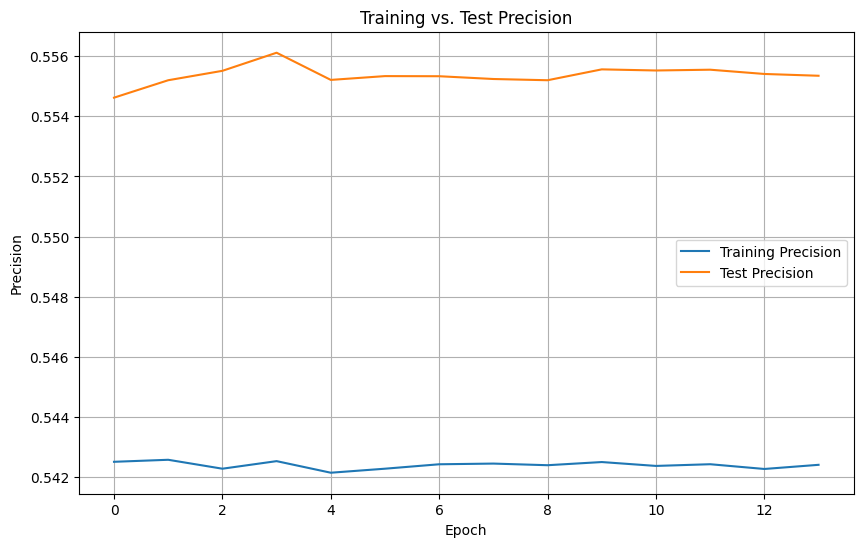

In [ ]:
# Learning visualisation for the Deep Neural Network (DNN)
# The model is not actually training, as the precision and accuracy score are not improving on TRAIN/TEST with more Epochs

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(best_history_nn['precision_10'], label='Training Precision')
plt.plot(best_history_nn['val_precision_10'], label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training vs. Test Precision')
plt.legend()
plt.grid(True)
plt.show()

# 9) Different Decision rules to improve precision (varying threshold)

best model1 **(clf_best)**: Decision Tree (max_depth=3 - manually selected second-best model)
best model2 **(rf_best)**: Random Forest (n_estimators=50, max_depth=19)

## 9.1. Predicting probabilities (predict_proba), getting the distribution for probabilities, and new decision rules

In [270]:
# y_pred_test = best_lr.predict_proba(X_test)

# predicting probability instead of a lable

y_pred_test = rf_best.predict_proba(X_test)
y_pred_test_class1 = [k[1] for k in y_pred_test] # k[1] is the second element in the list of Class predictions

In [271]:
# example prediction of probabilities
y_pred_test

array([[0.41713263, 0.58286737],
       [0.44722385, 0.55277615],
       [0.43879762, 0.56120238],
       ...,
       [0.56261952, 0.43738048],
       [0.55853707, 0.44146293],
       [0.56008278, 0.43991722]])

In [272]:
y_pred_test_class1_df = pd.DataFrame(y_pred_test_class1, columns=['Class1_probability'])
y_pred_test_class1_df.head()

Class1_probability
0            0.582867
1            0.552776
2            0.561202
3            0.556895
4            0.528694

In [273]:
# Mean prediction is 0.54, median is 0.55, 75% quantile is 0.60
y_pred_test_class1_df.describe().T

count      mean       std      min       25%       50%  \
Class1_probability  16330.0  0.519026  0.074275  0.27011  0.470871  0.512738   

                         75%       max  
Class1_probability  0.557306  0.787979

In [274]:
# Unconditional probability of a positive growth is 55.5%
y_test.sum()/y_test.count()

np.float64(0.5701775872627066)

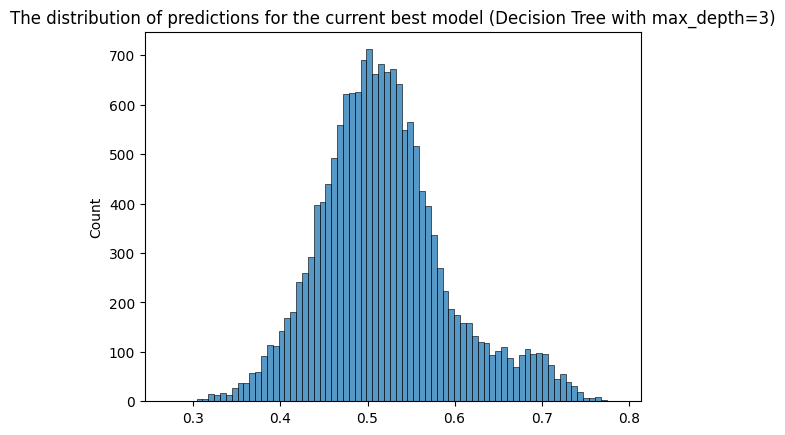

In [282]:
# perfect shape for a Random Forest predictions vs. a Decision Tree - it's an average across many trees (estimators)
sns.histplot(y_pred_test_class1)

# Add a title
plt.title('The distribution of predictions for the current best model (Decision Tree with max_depth=3)')

# Show the plot
plt.show()

In [276]:
# tpr (True Positive Rate) vs. fpr (False Positive Rate) dataframe
# tp = True Positive
# tn = True Negative
# fp = False Positive
# fn = False Negative
# Decision Rule :  "y_pred>= Threshold" for Class "1"

# when only_even=True --> we'll have a step ==0.02 and leave only even records

def tpr_fpr_dataframe(y_true, y_pred, only_even=False):
    scores = []

    if only_even==False:
      thresholds = np.linspace(0, 1, 101) #[0, 0.01, 0.02, ...0.99,1.0]
    else:
      thresholds = np.linspace(0, 1, 51) #[0, 0.02, 0.04,  ...0.98,1.0]

    for t in thresholds:

        actual_positive = (y_true == 1)
        actual_negative = (y_true == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        if tp + fp > 0:
          precision = tp / (tp + fp)

        if tp + fn > 0:
          recall = tp / (tp + fn)

        if precision+recall > 0:
          f1_score = 2*precision*recall / (precision+recall)

        accuracy = (tp+tn) / (tp+tn+fp+fn)

        scores.append((t, tp, fp, fn, tn, precision, recall, accuracy, f1_score))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn','precision','recall', 'accuracy','f1_score']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores


In [277]:
df_scores = tpr_fpr_dataframe(y_test,
                              y_pred_test_class1,
                              only_even=True)

In [278]:
# full df_scores
df_scores

threshold    tp    fp    fn    tn  precision    recall  accuracy  \
0        0.00  9311  7019     0     0   0.570178  1.000000  0.570178   
1        0.02  9311  7019     0     0   0.570178  1.000000  0.570178   
2        0.04  9311  7019     0     0   0.570178  1.000000  0.570178   
3        0.06  9311  7019     0     0   0.570178  1.000000  0.570178   
4        0.08  9311  7019     0     0   0.570178  1.000000  0.570178   
5        0.10  9311  7019     0     0   0.570178  1.000000  0.570178   
6        0.12  9311  7019     0     0   0.570178  1.000000  0.570178   
7        0.14  9311  7019     0     0   0.570178  1.000000  0.570178   
8        0.16  9311  7019     0     0   0.570178  1.000000  0.570178   
9        0.18  9311  7019     0     0   0.570178  1.000000  0.570178   
10       0.20  9311  7019     0     0   0.570178  1.000000  0.570178   
11       0.22  9311  7019     0     0   0.570178  1.000000  0.570178   
12       0.24  9311  7019     0     0   0.570178  1.000000  0.570178   
13       0.26  9311  7019     0     0   0.570178  1.000000  0.570178   
14       0.28  9311  7018     0     1   0.570213  1.000000  0.570239   
15       0.30  9311  7018     0     1   0.570213  1.000000  0.570239   
16       0.32  9307  7006     4    13   0.570527  0.999570  0.570729   
17       0.34  9287  6984    24    35   0.570770  0.997422  0.570851   
18       0.36  9245  6939    66    80   0.571243  0.992912  0.571035   
19       0.38  9160  6860   151   159   0.571785  0.983783  0.570667   
20       0.40  8985  6693   326   326   0.573096  0.964988  0.570178   
21       0.42  8729  6451   582   568   0.575033  0.937493  0.569320   
22       0.44  8326  6043   985   976   0.579442  0.894211  0.569626   
23       0.46  7672  5418  1639  1601   0.586096  0.823972  0.567851   
24       0.48  6765  4652  2546  2367   0.592537  0.726560  0.559216   
25       0.50  5623  3842  3688  3177   0.594083  0.603909  0.538885   
26       0.52  4321  3117  4990  3902   0.580936  0.464075  0.503552   
27       0.54  3087  2412  6224  4607   0.561375  0.331543  0.471157   
28       0.56  2013  1858  7298  5161   0.520021  0.216196  0.439314   
29       0.58  1316  1430  7995  5589   0.479243  0.141338  0.422841   
30       0.60   920  1166  8391  5853   0.441035  0.098808  0.414758   
31       0.62   642   952  8669  6067   0.402760  0.068951  0.410839   
32       0.64   470   762  8841  6257   0.381494  0.050478  0.411941   
33       0.66   360   572  8951  6447   0.386266  0.038664  0.416840   
34       0.68   276   406  9035  6613   0.404692  0.029642  0.421862   
35       0.70   158   234  9153  6785   0.403061  0.016969  0.425168   
36       0.72    61   111  9250  6908   0.354651  0.006551  0.426761   
37       0.74    19    30  9292  6989   0.387755  0.002041  0.429149   
38       0.76     7     6  9304  7013   0.538462  0.000752  0.429884   
39       0.78     1     0  9310  7019   1.000000  0.000107  0.429884   
40       0.80     0     0  9311  7019   1.000000  0.000000  0.429822   
41       0.82     0     0  9311  7019   1.000000  0.000000  0.429822   
42       0.84     0     0  9311  7019   1.000000  0.000000  0.429822   
43       0.86     0     0  9311  7019   1.000000  0.000000  0.429822   
44       0.88     0     0  9311  7019   1.000000  0.000000  0.429822   
45       0.90     0     0  9311  7019   1.000000  0.000000  0.429822   
46       0.92     0     0  9311  7019   1.000000  0.000000  0.429822   
47       0.94     0     0  9311  7019   1.000000  0.000000  0.429822   
48       0.96     0     0  9311  7019   1.000000  0.000000  0.429822   
49       0.98     0     0  9311  7019   1.000000  0.000000  0.429822   
50       1.00     0     0  9311  7019   1.000000  0.000000  0.429822   

    f1_score       tpr       fpr  
0   0.726259  1.000000  1.000000  
1   0.726259  1.000000  1.000000  
2   0.726259  1.000000  1.000000  
3   0.726259  1.000000  1.000000  
4   0.726259  1.000000  1.000000  
5   0.726259  1.000000  1.000000  
6   0.726259  

In [279]:
df_scores[(df_scores.threshold>=0.4) & (df_scores.threshold<=0.8)]

threshold    tp    fp    fn    tn  precision    recall  accuracy  \
20       0.40  8985  6693   326   326   0.573096  0.964988  0.570178   
21       0.42  8729  6451   582   568   0.575033  0.937493  0.569320   
22       0.44  8326  6043   985   976   0.579442  0.894211  0.569626   
23       0.46  7672  5418  1639  1601   0.586096  0.823972  0.567851   
24       0.48  6765  4652  2546  2367   0.592537  0.726560  0.559216   
25       0.50  5623  3842  3688  3177   0.594083  0.603909  0.538885   
26       0.52  4321  3117  4990  3902   0.580936  0.464075  0.503552   
27       0.54  3087  2412  6224  4607   0.561375  0.331543  0.471157   
28       0.56  2013  1858  7298  5161   0.520021  0.216196  0.439314   
29       0.58  1316  1430  7995  5589   0.479243  0.141338  0.422841   
30       0.60   920  1166  8391  5853   0.441035  0.098808  0.414758   
31       0.62   642   952  8669  6067   0.402760  0.068951  0.410839   
32       0.64   470   762  8841  6257   0.381494  0.050478  0.411941   
33       0.66   360   572  8951  6447   0.386266  0.038664  0.416840   
34       0.68   276   406  9035  6613   0.404692  0.029642  0.421862   
35       0.70   158   234  9153  6785   0.403061  0.016969  0.425168   
36       0.72    61   111  9250  6908   0.354651  0.006551  0.426761   
37       0.74    19    30  9292  6989   0.387755  0.002041  0.429149   
38       0.76     7     6  9304  7013   0.538462  0.000752  0.429884   
39       0.78     1     0  9310  7019   1.000000  0.000107  0.429884   
40       0.80     0     0  9311  7019   1.000000  0.000000  0.429822   

    f1_score       tpr       fpr  
20  0.719116  0.964988  0.953555  
21  0.712833  0.937493  0.919077  
22  0.703209  0.894211  0.860949  
23  0.684969  0.823972  0.771905  
24  0.652740  0.726560  0.662772  
25  0.598956  0.603909  0.547371  
26  0.515971  0.464075  0.444080  
27  0.416880  0.331543  0.343639  
28  0.305416  0.216196  0.264710  
29  0.218296  0.141338  0.203733  
30  0.161446  0.098808  0.166121  
31  0.117744  0.068951  0.135632  
32  0.089159  0.050478  0.108562  
33  0.070292  0.038664  0.081493  
34  0.055239  0.029642  0.057843  
35  0.032567  0.016969  0.033338  
36  0.012865  0.006551  0.015814  
37  0.004060  0.002041  0.004274  
38  0.001502  0.000752  0.000855  
39  0.000215  0.000107  0.000000  
40  0.000000  0.000000  0.000000

<Axes: title={'center': 'Precision vs. Recall for the Best Model (Decision Tree with max_depth=3)'}, xlabel='threshold'>

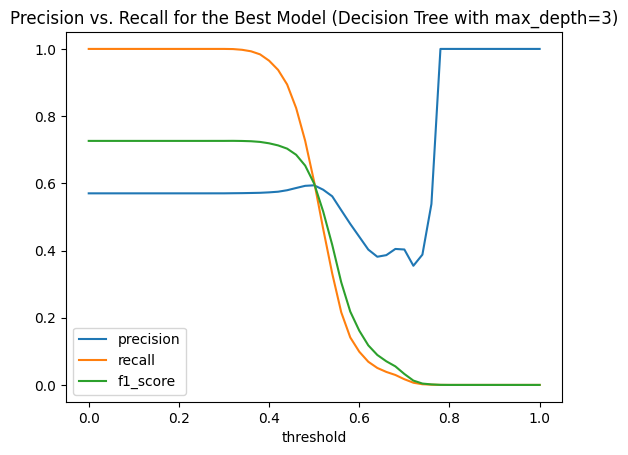

In [281]:
# Try to find high Precision score points

df_scores.plot.line(x='threshold',
                    y=['precision','recall', 'f1_score'],
                    title = 'Precision vs. Recall for the Best Model (Decision Tree with max_depth=3)')

## 9.2) Defining new columns with Predictions in new_df: pred7..pred10
* pred7 and pred8 are 2 decision rules for the Decision Tree (best model with max_depth=3)
* pred9 and pred10 are 2 decision rules for the Random Forest (second best model)

In [283]:
# adding Decision Tree predictors (clf_best) to the dataset for 2 new rules based on thresholds


y_pred_all = clf_best.predict_proba(X_all)
y_pred_all_class1 = [k[1] for k in y_pred_all] #list of predictions for class "1"
y_pred_all_class1_array = np.array(y_pred_all_class1) # (Numpy Array) np.array of predictions for class "1" , converted from a list

# defining a new prediction vector is easy now, as the dimensions will match
new_df['proba_pred8'] = y_pred_all_class1_array
new_df['pred8_clf_second_best_rule_40'] = (y_pred_all_class1_array >= 0.4).astype(int)

new_df['proba_pred9'] = y_pred_all_class1_array
new_df['pred9_clf_second_best_rule_52'] = (y_pred_all_class1_array >= 0.52).astype(int)

In [284]:
# adding Random Forest predictors (rf_best)
rf_best

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)

In [285]:
# make predictions of probabilities using the Random Forest model (rf_best)

y_pred_all = rf_best.predict_proba(X_all)
y_pred_all_class1 = [k[1] for k in y_pred_all] #list of predictions for class "1"
y_pred_all_class1_array = np.array(y_pred_all_class1) # (Numpy Array) np.array of predictions for class "1" , converted from a list


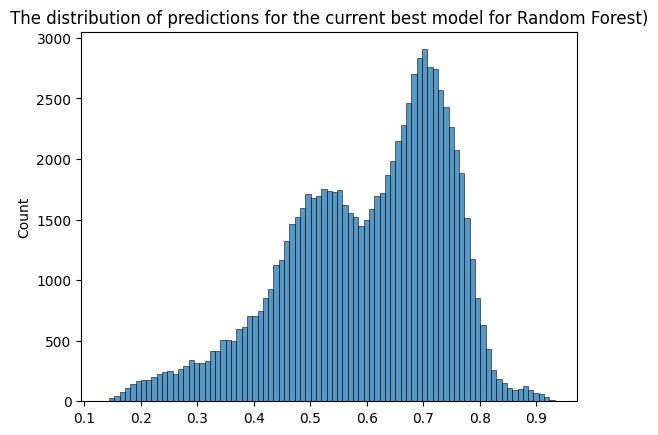

In [286]:
# PREDICTIONS ON A FULL DATASET - different from on a TRAINED SET (too optimistic? or just a bullish environment?)
sns.histplot(y_pred_all_class1)

# Add a title
plt.title('The distribution of predictions for the current best model for Random Forest)')

# Show the plot
plt.show()

In [287]:
# adding Random Forest predictors (rf_best) to the dataset for 2 new rules, based on Thresholds
# defining a new prediction vector is easy now, as the dimensions will match
new_df['proba_pred10'] = y_pred_all_class1_array
new_df['pred10_rf_best_rule_50'] = (y_pred_all_class1_array >= 0.5).astype(int)

new_df['proba_pred11'] = y_pred_all_class1_array
new_df['pred11_rf_best_rule_70'] = (y_pred_all_class1_array >= 0.7).astype(int)

<Axes: >

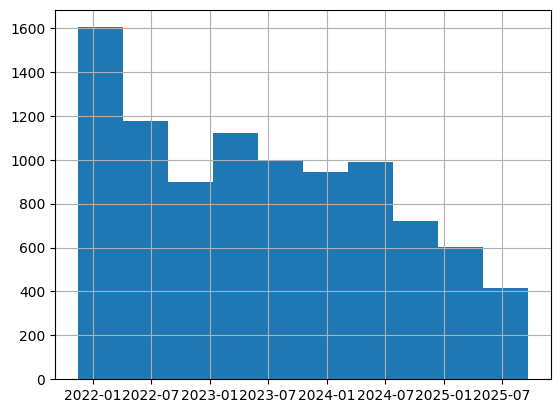

In [289]:
# Many positive predictions
new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_50==1)].Date.hist()

<Axes: >

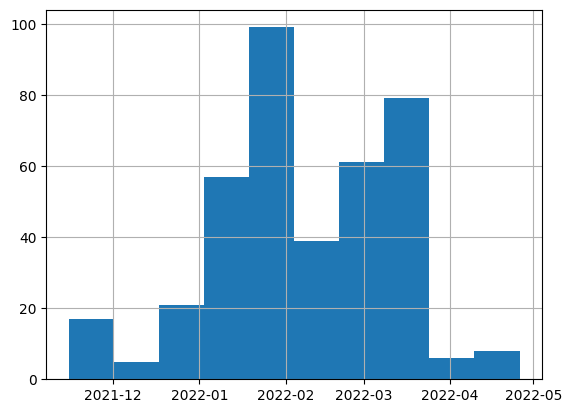

In [290]:
# Vs. less positives on higher-threshold rule
new_df[(new_df.split=='test')&(new_df.pred11_rf_best_rule_70==1)].Date.hist()

In [291]:
# sample of rare predictions with high threshold vs. other predictions
new_df[(new_df.split=='test')&(new_df.pred11_rf_best_rule_70==1)].sort_values(by='Date').sample(10)

Open         High          Low      Close_x        Volume  \
2927    303.209991   305.320007   283.566681   286.666656  7.964580e+07   
9075    272.331545   279.587892   270.757884   278.937042  3.424510e+07   
2427    323.535048   326.548515   313.708950   326.279999  2.494240e+07   
1538   2440.393555  2498.507080  2359.384766  2455.935059  1.617978e+10   
9082    290.584034   295.499306   289.787481   295.402161  2.448450e+07   
23624  4632.240234  4632.240234  4568.700195  4577.109863  4.748700e+09   
10395   160.362687   161.992233   156.121943   156.377182  9.641880e+07   
9037    296.915661   304.302438   293.435541   294.046234  4.593390e+07   
10405   160.509927   163.297831   160.019101   162.345627  9.581140e+07   
3168     53.193694    55.413778    52.397886    53.545116  2.699300e+07   

       Dividends  Stock Splits   Ticker  Year     Month  ... pred6_clf_best  \
2927         0.0           0.0     TSLA  2022  February  ...              1   
9075         0.0           0.0     MSFT  2022     March  ...              1   
2427         0.0           0.0     META  2022   January  ...              1   
1538         0.0           0.0  ETH-USD  2022   January  ...              1   
9082         0.0           0.0     MSFT  2022     March  ...              1   
23624        0.0           0.0    ^GSPC  2022   January  ...              1   
10395        0.0           0.0     AAPL  2022     March  ...              1   
9037         0.0           0.0     MSFT  2022   January  ...              1   
10405        0.0           0.0     AAPL  2022     March  ...              1   
3168         0.0           0.0     AVGO  2022     March  ...              1   

      is_correct_pred6  proba_pred8  pred8_clf_second_best_rule_40  \
2927                 1     0.775794                              1   
9075                 0     0.775794                              1   
2427                 0     0.775794                              1   
1538                 1     0.775794                              1   
9082                 0     0.775794                              1   
23624                0     0.775794                              1   
10395                1     0.775794                              1   
9037                 0     0.775794                              1   
10405                0     0.775794                              1   
3168                 1     0.775794                              1   

       proba_pred9  pred9_clf_second_best_rule_52  proba_pred10  \
2927      0.775794                              1      0.701842   
9075      0.775794                              1      0.710003   
2427      0.775794                              1      0.701166   
1538      0.775794                              1      0.721728   
9082      0.775794                              1      0.715632   
23624     0.775794                              1      0.763268   
10395     0.775794                              1      0.718471   
9037      0.775794                              1      0.700184   
10405     0.775794                              1      0.712467   
3168      0.775794                              1      0.700162   

       pred10_rf_best_rule_50  proba_pred11  pred11_rf_best_rule_70  
2927                        1      0.701842                       1  
9075                        1      0.710003                       1  
2427                        1      0.701166                       1  
1538                        1      0.721728                       1  
9082                        1      0.715632                       1  
23624                       1      0.763268                       1  
10395                       1      0.718471                       1  
9037                        1      0.700184                       1  
10405                       1      0.712467                       1  
3168                        1      0.700162                       1  

[10 rows x 248 columns]

In [292]:
# List of ALL current predictions
PREDICTIONS = [k for k in new_df.keys() if k.startswith('pred')]
PREDICTIONS

['pred5_clf_10',
 'pred6_clf_5',
 'pred6_clf_best',
 'pred8_clf_second_best_rule_40',
 'pred9_clf_second_best_rule_52',
 'pred10_rf_best_rule_50',
 'pred11_rf_best_rule_70']

In [293]:
# Pred 10: How many positive prediction per day (out of 33 stocks possible)
pred10_daily_positive_count = pd.DataFrame(new_df[(new_df.split=='test')&(new_df.pred11_rf_best_rule_70==1)].groupby('Date')['pred11_rf_best_rule_70'].count())

In [295]:
# Pred 9: How many positive prediction per day (out of 33 stocks possible)
pred9_daily_positive_count = pd.DataFrame(new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_50==1)].groupby('Date')['pred10_rf_best_rule_50'].count())

In [296]:
# Unique trading days on Test (4 years)
new_df[(new_df.split=='test')].Date.nunique()

1410

In [297]:
pred10_daily_positive_count

pred11_rf_best_rule_70
Date                              
2021-11-15                       1
2021-11-16                       2
2021-11-17                       3
2021-11-18                       3
2021-11-19                       3
...                            ...
2022-03-31                       1
2022-04-12                       1
2022-04-14                       4
2022-04-18                       1
2022-04-26                       2

[84 rows x 1 columns]

array([[<Axes: title={'center': 'pred11_rf_best_rule_70'}>]], dtype=object)

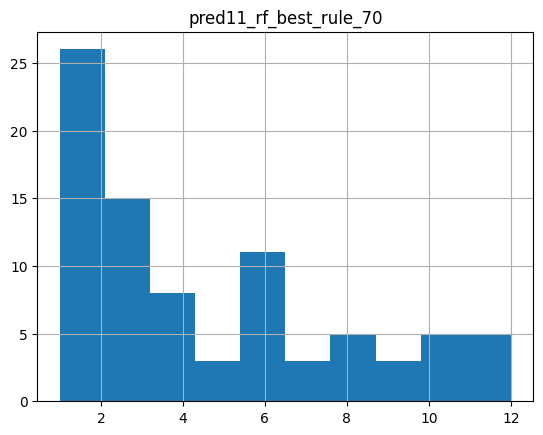

In [298]:
pred10_daily_positive_count.hist()

In [299]:
# 75% cases we have not more than 6 bets of $100
pred10_daily_positive_count.describe().T

count      mean       std  min  25%  50%   75%   max
pred11_rf_best_rule_70   84.0  4.666667  3.201405  1.0  2.0  4.0  6.25  12.0

array([[<Axes: title={'center': 'pred10_rf_best_rule_50'}>]], dtype=object)

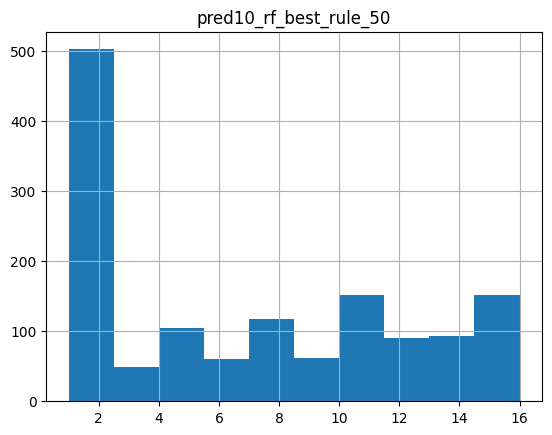

In [300]:
pred9_daily_positive_count.hist()

In [301]:
pred9_daily_positive_count.describe().T

count      mean       std  min  25%  50%   75%   max
pred10_rf_best_rule_50  1381.0  6.853729  5.186832  1.0  2.0  6.0  11.0  16.0

## 9.3) Agg. stats on ALL predictions

In [302]:
# let's review the Predictions:
PREDICTIONS, IS_CORRECT = get_predictions_correctness(new_df, to_predict=to_predict)


Prediction columns founded: ['pred5_clf_10', 'pred6_clf_5', 'pred6_clf_best', 'pred8_clf_second_best_rule_40', 'pred9_clf_second_best_rule_52', 'pred10_rf_best_rule_50', 'pred11_rf_best_rule_70']
Created columns is_correct: ['is_correct_pred5', 'is_correct_pred6', 'is_correct_pred8', 'is_correct_pred9', 'is_correct_pred10', 'is_correct_pred11']
Precision on TEST set for each prediction:
Prediction column:pred5_clf_10 , is_correct_column: is_correct_pred5
is_correct_pred5
1    3701
0    2876
Name: count, dtype: int64
is_correct_pred5
1    0.562719
0    0.437281
Name: count, dtype: float64
---------
Prediction column:pred6_clf_5 , is_correct_column: is_correct_pred6
is_correct_pred6
1    6295
0    4710
Name: count, dtype: int64
is_correct_pred6
1    0.572013
0    0.427987
Name: count, dtype: float64
---------
Prediction column:pred6_clf_best , is_correct_column: is_correct_pred8
is_correct_pred8
1    5342
0    3724
Name: count, dtype: int64
is_correct_pred8
1    0.589235
0    0.410765
Na

In [303]:
# check approx. periods : Train, Valid , Test
new_df.groupby('split').Date.agg(['min','max'])

min        max
split                           
test       2021-11-13 2025-09-22
train      2000-01-03 2018-01-03
validation 2018-01-04 2021-11-12

In [304]:
# Extract number from the prediction column

# Example string
example_string = "pred10_rf_best_rule_60"

# Split the string by '_'
parts = example_string.split('_')

# Extract the part with 'pred' and remove the 'pred' prefix
pred_number = parts[0].replace('pred', '')

# Print the result
print(pred_number)

# Print in one line
print(int(example_string.split('_')[0].replace('pred', '')))


10
10


In [305]:
# all predictions
PREDICTIONS

['pred5_clf_10',
 'pred6_clf_5',
 'pred6_clf_best',
 'pred8_clf_second_best_rule_40',
 'pred9_clf_second_best_rule_52',
 'pred10_rf_best_rule_50',
 'pred11_rf_best_rule_70']

In [306]:
# all predictions on MODELS (not-manual predictions)
PREDICTIONS_ON_MODELS = [p for p in PREDICTIONS if int(p.split('_')[0].replace('pred', ''))>=5]
PREDICTIONS_ON_MODELS

['pred5_clf_10',
 'pred6_clf_5',
 'pred6_clf_best',
 'pred8_clf_second_best_rule_40',
 'pred9_clf_second_best_rule_52',
 'pred10_rf_best_rule_50',
 'pred11_rf_best_rule_70']

In [307]:
# all predictions on Models - correctness
IS_CORRECT_ON_MODELS = [p for p in IS_CORRECT if int(p.replace('is_correct_pred', ''))>=5]
IS_CORRECT_ON_MODELS

['is_correct_pred5',
 'is_correct_pred6',
 'is_correct_pred8',
 'is_correct_pred9',
 'is_correct_pred10',
 'is_correct_pred11']

In [308]:
# predictions on models
# pred10_rf_best_rule_60: ONLY 2% of TEST cases predicted with high confidence of growth
new_df.groupby('split')[PREDICTIONS_ON_MODELS].agg(['count','sum','mean']).T

split                                        test         train    validation
pred5_clf_10                  count  16330.000000  53293.000000  16440.000000
                              sum     6577.000000  36123.000000  11685.000000
                              mean       0.402756      0.677819      0.710766
pred6_clf_5                   count  16330.000000  53293.000000  16440.000000
                              sum    11005.000000  39457.000000  13095.000000
                              mean       0.673913      0.740379      0.796533
pred6_clf_best                count  16330.000000  53293.000000  16440.000000
                              sum     9066.000000  40605.000000  13804.000000
                              mean       0.555175      0.761920      0.839659
pred8_clf_second_best_rule_40 count  16330.000000  53293.000000  16440.000000
                              sum     9066.000000  46188.000000  14780.000000
                              mean       0.555175      0.866680      0.899027
pred9_clf_second_best_rule_52 count  16330.000000  53293.000000  16440.000000
                              sum     9066.000000  40605.000000  13804.000000
                              mean       0.555175      0.761920      0.839659
pred10_rf_best_rule_50        count  16330.000000  53293.000000  16440.000000
                              sum     9465.000000  41740.000000  13693.000000
                              mean       0.579608      0.783217      0.832908
pred11_rf_best_rule_70        count  16330.000000  53293.000000  16440.000000
                              sum      392.000000  16964.000000   7459.000000
                              mean       0.024005      0.318316      0.453710

In [309]:
# 11 predictions stats (check TEST set)
new_df.groupby('split')[PREDICTIONS].agg(['count','sum','mean']).T

split                                        test         train    validation
pred5_clf_10                  count  16330.000000  53293.000000  16440.000000
                              sum     6577.000000  36123.000000  11685.000000
                              mean       0.402756      0.677819      0.710766
pred6_clf_5                   count  16330.000000  53293.000000  16440.000000
                              sum    11005.000000  39457.000000  13095.000000
                              mean       0.673913      0.740379      0.796533
pred6_clf_best                count  16330.000000  53293.000000  16440.000000
                              sum     9066.000000  40605.000000  13804.000000
                              mean       0.555175      0.761920      0.839659
pred8_clf_second_best_rule_40 count  16330.000000  53293.000000  16440.000000
                              sum     9066.000000  46188.000000  14780.000000
                              mean       0.555175      0.866680      0.899027
pred9_clf_second_best_rule_52 count  16330.000000  53293.000000  16440.000000
                              sum     9066.000000  40605.000000  13804.000000
                              mean       0.555175      0.761920      0.839659
pred10_rf_best_rule_50        count  16330.000000  53293.000000  16440.000000
                              sum     9465.000000  41740.000000  13693.000000
                              mean       0.579608      0.783217      0.832908
pred11_rf_best_rule_70        count  16330.000000  53293.000000  16440.000000
                              sum      392.000000  16964.000000   7459.000000
                              mean       0.024005      0.318316      0.453710

# 10) Trading Simulations

* create simulation 1 features: like "sim1_pred0" ... "sim1_predLast"

## 10.1) Investing $100 on every positive prediction
* fees = 0.1% for each buy and sell operation ==> 0.2% for buy+sell operation

In [310]:
# current prediction
pred = 'pred10_rf_best_rule_50'

In [311]:
# Total Number of Investment Opportunities
new_df[new_df.split=='test'].Close_x.count()

np.int64(16330)

In [312]:
# Total Number of Days (~4 years of trading)
new_df[new_df.split=='test'].Date.nunique()

1410

In [313]:
# check actual future growth with 'growth_future_5d', correctness of the prediction with 'is_positive_growth_5d_future'
TO_PREDICT

['growth_future_30d', 'is_positive_growth_30d_future']

In [314]:
# Sample
new_df[['growth_future_30d','is_positive_growth_30d_future',pred]].sample(5)

growth_future_30d  is_positive_growth_30d_future  \
7388            1.099999                              1   
3313            1.055857                              1   
1373            0.764389                              0   
19018           1.039589                              1   
6297            1.069864                              1   

       pred10_rf_best_rule_50  
7388                        0  
3313                        1  
1373                        0  
19018                       1  
6297                        1

In [315]:
# GROSS REVENUE: ONLY when current_prediction equals to 1: invest $100 into that stock (buy), and sell in 1week (sell)
new_df['sim1_gross_rev_pred6'] = new_df[pred] * 100 * (new_df['growth_future_30d']-1)

In [316]:
# FEES: 0.1% for each operation , 0.2% for buy+sell ONLY when current_prediction equals to one
new_df['sim1_fees_pred6'] = -new_df[pred] * 100 * 0.002

In [317]:
# NET REVENUE: GROSS_REVENUE + FEES
new_df['sim1_net_rev_pred6'] = new_df['sim1_gross_rev_pred6'] + new_df['sim1_fees_pred6']

In [318]:
# sample of individual results
COLUMNS_FIN_RESULT = ['Date','Ticker','Close_x']+TO_PREDICT+ [pred,  'sim1_gross_rev_pred6','sim1_fees_pred6','sim1_net_rev_pred6']
new_df[(new_df.split=='test')&(new_df[pred]==1)][COLUMNS_FIN_RESULT].sample(5)

Date   Ticker       Close_x  growth_future_30d  \
11249 2025-08-01     AAPL    202.150589           1.170909   
2764  2022-04-12  BTC-USD  40127.183594           0.723892   
9015  2021-12-16     MSFT    314.956116           0.957156   
3768  2024-07-29     AVGO    148.527344           0.986620   
9032  2022-01-11     MSFT    305.339661           0.937200   

       is_positive_growth_30d_future  pred10_rf_best_rule_50  \
11249                              1                       1   
2764                               0                       1   
9015                               0                       1   
3768                               0                       1   
9032                               0                       1   

       sim1_gross_rev_pred6  sim1_fees_pred6  sim1_net_rev_pred6  
11249             17.090926             -0.2           16.890926  
2764             -27.610788             -0.2          -27.810788  
9015              -4.284412             -0.2           -4.484412  
3768              -1.338026             -0.2           -1.538026  
9032              -6.280028             -0.2           -6.480028

In [319]:
# DAILY INVESTMENTS COUNT
filter_test_and_positive_pred = (new_df.split=='test')&(new_df[pred]==1)
df_investments_count_daily = pd.DataFrame(new_df[filter_test_and_positive_pred].groupby('Date')[pred].count())
sim1_avg_investments_per_day = df_investments_count_daily[pred].quantile(0.75)  # 75% case - how many $100 investments per day do we have?
print(sim1_avg_investments_per_day)

11.0


In [320]:
# Distribution: how many times do we trade daily (for the current Prediction)?
df_investments_count_daily.describe().T

count      mean       std  min  25%  50%   75%   max
pred10_rf_best_rule_50  1381.0  6.853729  5.186832  1.0  2.0  6.0  11.0  16.0

In [321]:
new_df[(new_df.split=='test')&(new_df[pred]==1)][['sim1_gross_rev_pred6','sim1_fees_pred6','sim1_net_rev_pred6']].sum()

sim1_gross_rev_pred6    29582.234869
sim1_fees_pred6         -1893.000000
sim1_net_rev_pred6      27701.434869
dtype: float64

### 10.1.2 Calculate fin. results for all fields
* Simplified and approximate calculation

In [322]:
# Calculate fin. result for ALL predictions (manual and produced by models)

sim1_results = [] # results in Array

# Iterate over all predictions
for pred in PREDICTIONS:
  print(f'Calculating sumulation for prediction {pred}:')
  print(f"    Count times of investment {len(new_df[(new_df.split=='test')&(new_df[pred]==1)])} out of {len(new_df[(new_df.split=='test')])} TEST records")

  # Prefix: e.g. pred1 or pred10
  pred_prefix= pred.split('_')[0]

  # Fin. result columns: define new records for EACH positive prediction
  new_df['sim1_gross_rev_'+pred_prefix] = new_df[pred] * 100 * (new_df['growth_future_30d']-1)
  new_df['sim1_fees_'+pred_prefix] = -new_df[pred] * 100 * 0.002
  new_df['sim1_net_rev_'+pred_prefix] = new_df['sim1_gross_rev_'+pred_prefix] + new_df['sim1_fees_'+pred_prefix]

  # calculate agg. results for each PREDICTION columns (pred) on TEST
  filter_test_and_positive_pred = (new_df.split=='test')&(new_df[pred]==1) # filter records on TEST set, when current prediction is 1 (we invest $100 for 1 week ahead - 5 periods)
  sim1_count_investments = len(new_df[filter_test_and_positive_pred])
  sim1_gross_rev = new_df[filter_test_and_positive_pred]['sim1_gross_rev_'+pred_prefix].sum()
  sim1_fees = new_df[filter_test_and_positive_pred]['sim1_fees_'+pred_prefix].sum()
  sim1_net_rev = new_df[filter_test_and_positive_pred]['sim1_net_rev_'+pred_prefix].sum()

  if sim1_gross_rev>0:
    sim1_fees_percentage = -sim1_fees/sim1_gross_rev
  else:
    sim1_fees_percentage = None

  if sim1_count_investments>0:
    sim1_average_net_revenue = sim1_net_rev/sim1_count_investments
  else:
    sim1_average_net_revenue = None

  # APPROXIMATE CAPITAL REQUIRED and CAGR Calculation
  df_investments_count_daily = pd.DataFrame(new_df[filter_test_and_positive_pred].groupby('Date')[pred].count())
  sim1_avg_investments_per_day = df_investments_count_daily[pred].mean()
  sim1_q75_investments_per_day = df_investments_count_daily[pred].quantile(0.75)  # 75% case - how many $100 investments per day do we have?
  # df_investments_count_daily[pred].mean()
  sim1_capital = 100 * 30 * sim1_q75_investments_per_day # 30 days in a row with positive predictions

  # CAGR: average growth per year. E.g. if you have 1.5 return (50% growth in 4 years) --> (1.5)**(1/4) = 1.106 or 10.6% average
  sim1_CAGR = ((sim1_capital+sim1_net_rev)/sim1_capital)**(1/4)

  # append to DF
  sim1_results.append((pred,sim1_count_investments,sim1_gross_rev,sim1_fees,sim1_net_rev,sim1_fees_percentage,sim1_average_net_revenue,sim1_avg_investments_per_day,sim1_capital,sim1_CAGR))


  # output for all predictions with some positive predictions
  if  sim1_count_investments>1:
    print(f"    Financial Result: \n {new_df[filter_test_and_positive_pred][['sim1_gross_rev_'+pred_prefix,'sim1_fees_'+pred_prefix,'sim1_net_rev_'+pred_prefix]].sum()}")
    print(f"        Count Investments in 4 years (on TEST): {sim1_count_investments}")
    print(f"        Gross Revenue: ${int(sim1_gross_rev)}")
    print(f"        Fees (0.2% for buy+sell): ${int(-sim1_fees)}")
    print(f"        Net Revenue: ${int(sim1_net_rev)}")
    print(f"        Fees are {int(-100.0*sim1_fees/sim1_gross_rev)} % from Gross Revenue")
    print(f"        Capital Required : ${int(sim1_capital)} (Vbegin)")
    print(f"        Final value (Vbegin + Net_revenue) : ${int(sim1_capital + sim1_net_rev)} (Vfinal)")

    print(f"        Average CAGR on TEST (4 years) : {np.round(sim1_CAGR,3)}, or {np.round(100.0*(sim1_CAGR-1),1)}% ")

    print(f"        Average daily stats: ")
    print(f"            Average net revenue per investment: ${np.round(sim1_net_rev/sim1_count_investments,2)} ")
    print(f"            Average investments per day: {int(np.round(sim1_avg_investments_per_day))} ")
    print(f"            Q75 investments per day: {int(np.round(sim1_q75_investments_per_day))} ")
    print('=============================================+')


# results in a DataFrame from an Array
columns_simulation = ['prediction', 'sim1_count_investments', 'sim1_gross_rev', 'sim1_fees', 'sim1_net_rev', 'sim1_fees_percentage','sim1_average_net_revenue','sim1_avg_investments_per_day','sim1_capital','sim1_CAGR']

df_sim1_results = pd.DataFrame(sim1_results,columns=columns_simulation)

Calculating sumulation for prediction pred5_clf_10:
    Count times of investment 6577 out of 16330 TEST records
    Financial Result: 
 sim1_gross_rev_pred5    13715.386808
sim1_fees_pred5         -1315.400000
sim1_net_rev_pred5      12406.786808
dtype: float64
        Count Investments in 4 years (on TEST): 6577
        Gross Revenue: $13715
        Fees (0.2% for buy+sell): $1315
        Net Revenue: $12406
        Fees are 9 % from Gross Revenue
        Capital Required : $36000 (Vbegin)
        Final value (Vbegin + Net_revenue) : $48406 (Vfinal)
        Average CAGR on TEST (4 years) : 1.077, or 7.7% 
        Average daily stats: 
            Average net revenue per investment: $1.89 
            Average investments per day: 6 
            Q75 investments per day: 12 
=============================================+
Calculating sumulation for prediction pred6_clf_5:
    Count times of investment 11005 out of 16330 TEST records
    Financial Result: 
 sim1_gross_rev_pred6    35607.5

In [323]:
df_sim1_results['sim1_growth_capital_4y'] = (df_sim1_results.sim1_net_rev+df_sim1_results.sim1_capital) / df_sim1_results.sim1_capital

In [324]:
# final comparison
df_sim1_results

prediction  sim1_count_investments  sim1_gross_rev  \
0                   pred5_clf_10                    6577    13715.386808   
1                    pred6_clf_5                   11005    35607.560592   
2                 pred6_clf_best                    9066    24304.862027   
3  pred8_clf_second_best_rule_40                    9066    24304.862027   
4  pred9_clf_second_best_rule_52                    9066    24304.862027   
5         pred10_rf_best_rule_50                    9465    29582.234869   
6         pred11_rf_best_rule_70                     392     -465.080370   

   sim1_fees  sim1_net_rev  sim1_fees_percentage  sim1_average_net_revenue  \
0    -1315.4  12406.786808              0.095907                  1.886390   
1    -2201.0  33410.160592              0.061813                  3.035907   
2    -1813.2  22491.662027              0.074602                  2.480880   
3    -1813.2  22491.662027              0.074602                  2.480880   
4    -1813.2  22491.662027              0.074602                  2.480880   
5    -1893.0  27701.434869              0.063991                  2.926723   
6      -78.4   -543.480370                   NaN                 -1.386430   

   sim1_avg_investments_per_day  sim1_capital  sim1_CAGR  \
0                      6.198869       36000.0   1.076839   
1                     10.275444       48000.0   1.141194   
2                     11.608195       48000.0   1.100840   
3                     11.608195       48000.0   1.100840   
4                     11.608195       48000.0   1.100840   
5                      6.853729       33000.0   1.164585   
6                      4.666667       18750.0   0.992673   

   sim1_growth_capital_4y  
0                1.344633  
1                1.696045  
2                1.468576  
3                1.468576  
4                1.468576  
5                1.839437  
6                0.971014

In [325]:
# Create the scatter plot
fig = px.scatter(
    df_sim1_results.dropna(),
    x='sim1_avg_investments_per_day',
    y='sim1_CAGR',
    size='sim1_growth_capital_4y',  # Use the 'size' parameter for sim1_CAGR
    text='prediction',
    title='Compound Annual Growth vs. Time spent (Average investments per day)',
    labels={'sim1_capital': 'Initial Capital Requirement', 'growth_capital_4y': '4-Year Capital Growth'}
)

# Update the layout to improve readability of the annotations
fig.update_traces(textposition='top center')

# Show the plot
fig.show()

In [326]:
# detailed info from the bubble chart above on the winners
# top 1 result
df_sim1_results[df_sim1_results.prediction.isin(['pred10_rf_best_rule_50'])]

prediction  sim1_count_investments  sim1_gross_rev  sim1_fees  \
5  pred10_rf_best_rule_50                    9465    29582.234869    -1893.0   

   sim1_net_rev  sim1_fees_percentage  sim1_average_net_revenue  \
5  27701.434869              0.063991                  2.926723   

   sim1_avg_investments_per_day  sim1_capital  sim1_CAGR  \
5                      6.853729       33000.0   1.164585   

   sim1_growth_capital_4y  
5                1.839437

In [327]:
# top 2-3 results
df_sim1_results[df_sim1_results.prediction.isin(['pred6_clf_5','pred8_clf_second_best_rule_40'])]

prediction  sim1_count_investments  sim1_gross_rev  \
1                    pred6_clf_5                   11005    35607.560592   
3  pred8_clf_second_best_rule_40                    9066    24304.862027   

   sim1_fees  sim1_net_rev  sim1_fees_percentage  sim1_average_net_revenue  \
1    -2201.0  33410.160592              0.061813                  3.035907   
3    -1813.2  22491.662027              0.074602                  2.480880   

   sim1_avg_investments_per_day  sim1_capital  sim1_CAGR  \
1                     10.275444       48000.0   1.141194   
3                     11.608195       48000.0   1.100840   

   sim1_growth_capital_4y  
1                1.696045  
3                1.468576

## 10.2. Advanced Simulation
* to_predict = 'is_positive_growth_30d_future'
* invest ~3% of capital each day (sell positions from 30 days ago), REINVEST PREVIOUS GAINS
* use predict_proba predictions
* select top1..3..x predictions > threshold (0.53)
* invest proportionally the prediction
* stop loss y%
* take profit z%
* Not included: portfolio optimization

### 10.2.1) Define rank of prediction (pred10_rf_best_rule_50	)
*  Current best prediction pred10_rf_best_rule_50, with CAGR = 1.164585	(16.46% average capital growth with simple simulation)

In [328]:
new_df["proba_pred10"]

0        0.541417
1        0.527769
2        0.567650
3        0.568153
4        0.598468
           ...   
11467    0.446612
11468    0.455012
11469    0.437380
11470    0.441463
11471    0.439917
Name: proba_pred10, Length: 86063, dtype: float64

In [329]:
# https://stackoverflow.com/questions/17775935/sql-like-window-functions-in-pandas-row-numbering-in-python-pandas-dataframe
# rank of prediction

#new_df["pred9_rank"] = new_df.groupby("Date")["proba_pred9"].rank(method="first", ascending=False)

new_df["pred10_rank"] = new_df.groupby("Date")["proba_pred10"].rank(method="first", ascending=False)


In [330]:
# CHECK RANK FOR 1 DAY:
  # we have predictions for all 33 stocks
first_trading_day_2024 = new_df[new_df.Date>='2024-01-04'].Date.unique().astype(str)[0]
first_trading_day_2024
print(f'First trading day in 2024: {first_trading_day_2024}, count predictions = {len(new_df[new_df.Date==first_trading_day_2024])}')

First trading day in 2024: 2024-01-04, count predictions = 16


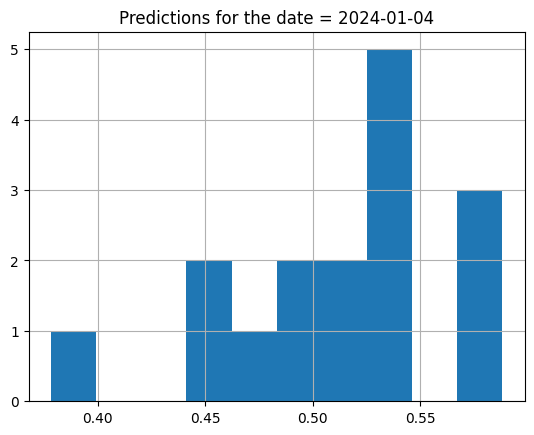

In [331]:
# Decision Tree's predictions are not very smooth - either too small or too big
new_df[new_df.Date==first_trading_day_2024].proba_pred10.hist()
plt.title(f'Predictions for the date = {first_trading_day_2024}')
# Show the plot
plt.show()

In [332]:
new_df[new_df.Date==first_trading_day_2024][['Date','Ticker', 'Close_x','proba_pred10','pred10_rank']].sort_values(by='pred10_rank').head(5)

Date Ticker     Close_x  proba_pred10  pred10_rank
10855 2024-01-04   AAPL  180.382812      0.588203          1.0
3627  2024-01-04   AVGO  102.952255      0.584569          2.0
4877  2024-01-04   GOOG  137.101761      0.577256          3.0
6278  2024-01-04   NVDA   47.973949      0.544321          4.0
6703  2024-01-04   AMZN  144.570007      0.541450          5.0

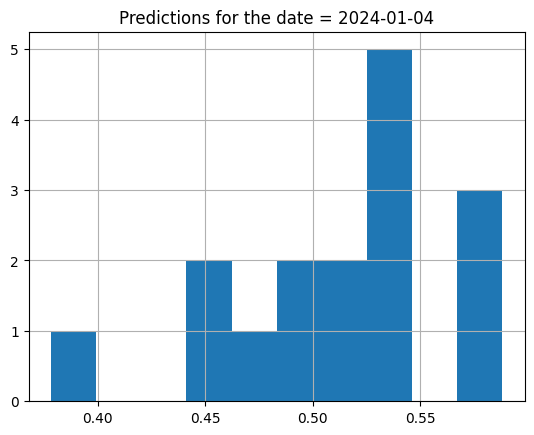

In [333]:
# Random Forest's predictions are more spreaded across the range - rank() function will work
new_df[new_df.Date==first_trading_day_2024].proba_pred10.hist()
plt.title(f'Predictions for the date = {first_trading_day_2024}')
# Show the plot
plt.show()

In [334]:
# It is quite different vs. a single Decision tree (proba_pred9 vs. proba_pred10)
new_df[new_df.Date==first_trading_day_2024][['Date','Ticker', 'Close_x','proba_pred9','proba_pred10','pred10_rank']].sort_values(by='pred10_rank').head(5)

Date Ticker     Close_x  proba_pred9  proba_pred10  pred10_rank
10855 2024-01-04   AAPL  180.382812     0.585379      0.588203          1.0
3627  2024-01-04   AVGO  102.952255     0.585379      0.584569          2.0
4877  2024-01-04   GOOG  137.101761     0.585379      0.577256          3.0
6278  2024-01-04   NVDA   47.973949     0.585379      0.544321          4.0
6703  2024-01-04   AMZN  144.570007     0.585379      0.541450          5.0

In [ ]:
# OUTCOME: let's use pred10_proba for Advanced simulations

### 10.2.2) Define Min(Low) for the next 5 days and Max(High) for the next 5 days
* Assymetric! distributions for Max_High_Next_5 / Adj_close_today vs. Min_Low_Next_5/Adj_close_today

In [335]:
# Sort the DataFrame by Ticker and Date
new_df = new_df.sort_values(by=['Ticker', 'Date'])

In [336]:
new_df['growth_future_30d'].describe().T

count    85583.000000
mean         1.031265
std          0.142153
min          0.305444
25%          0.965052
50%          1.023688
75%          1.084585
max          3.993296
Name: growth_future_30d, dtype: float64

In [337]:
# take profit if growth >=20%
new_df['growth_future_30d'].quantile(0.95)

np.float64(1.25172511582111)

In [338]:
# stop loss when -11%
new_df['growth_future_30d'].quantile(0.1)

np.float64(0.8921174381800043)

In [339]:
# check a sample on the test dataset
new_df[new_df.split=='test'][['Date','High','Low','Close_x','Ticker','growth_future_30d']].sample(10)

Date          High           Low       Close_x   Ticker  \
3908  2023-09-27    227.281980    224.562642    226.119370        V   
10804 2023-10-20    173.718435    170.965402    171.203079     AAPL   
7165  2024-10-28    459.239990    455.000000    458.489990    BRK-B   
9742  2024-11-07    423.669289    416.751226    422.259857     MSFT   
3884  2023-08-23    238.967260    237.174077    238.730804        V   
10805 2023-10-23    172.322097    168.281671    171.321899     AAPL   
12849 2023-05-16    431.323219    423.630849    429.523071      LLY   
2695  2025-03-27   2037.396118   1987.717773   2002.357422  ETH-USD   
24536 2025-09-08   6508.669922   6483.290039   6495.149902    ^GSPC   
9513  2023-06-30  15213.750000  15081.570312  15179.209961     ^NDX   

       growth_future_30d  
3908            1.065051  
10804           1.097175  
7165            1.008724  
9742            1.028310  
3884            0.963599  
10805           1.119508  
12849           1.063758  
2695            0.909868  
24536                NaN  
9513            1.001738

In [340]:
# Define a function to get the rolling max High and min Low for the next 30 trading days

# Sort the DataFrame: Sorting by Ticker and Date ensures that we are looking at each ticker's data in chronological order.
# Rolling window calculation: We use the rolling method with a window of 5 to calculate the maximum high and minimum low over the next 5 days.
# The shift method is used to align these values correctly with the current row.

def rolling_max_min(df, window=30):
    # high/low in 30 days
    df['Max_High_Next_30'] = df['High'].rolling(window=window, min_periods=1).max().shift(-window+1)
    df['Min_Low_Next_30'] = df['Low'].rolling(window=window, min_periods=1).min().shift(-window+1)

    # low in 1 day (for lower entry)
    df['Min_Low_Next_1'] = df['Low'].rolling(window=1, min_periods=1).min().shift(-1)
    return df

In [341]:
# Apply the function to each group of Ticker
# Important!: need to drop index from groupby operation (reset_index) - so that you can merge that afterwards
result = new_df[new_df.split=='test'][['Date','High','Low','Close_x','Ticker']].groupby('Ticker').apply(rolling_max_min).reset_index(drop=True)
result.head(30)

/tmp/ipython-input-1191106210.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Date        High         Low     Close_x Ticker  Max_High_Next_30  \
0  2021-11-15  148.903602  146.501603  147.060440   AAPL        178.560795   
1  2021-11-16  148.521235  146.413360  148.040833   AAPL        178.560795   
2  2021-11-17  151.962459  148.031048  150.482056   AAPL        178.560795   
3  2021-11-18  155.560525  150.050665  154.776199   AAPL        178.560795   
4  2021-11-19  157.864508  153.462492  157.403717   AAPL        179.296107   
5  2021-11-22  162.452734  157.844844  157.864456   AAPL        179.354932   
6  2021-11-23  158.629183  155.942874  158.246826   AAPL        179.354932   
7  2021-11-24  158.962542  156.511534  158.766464   AAPL        179.354932   
8  2021-11-26  157.305666  153.295821  153.737000   AAPL        179.354932   
9  2021-11-29  158.031126  155.678151  157.099747   AAPL        179.354932   
10 2021-11-30  162.276267  156.786006  162.060577   AAPL        179.354932   
11 2021-12-01  166.962643  161.305714  161.541016   AAPL        179.354932   
12 2021-12-02  160.982161  154.707588  160.550781   AAPL        179.354932   
13 2021-12-03  161.727232  156.589917  158.668365   AAPL        179.354932   
14 2021-12-06  164.590029  161.060573  162.080200   AAPL        179.354932   
15 2021-12-07  168.217518  165.041007  167.825348   AAPL        179.354932   
16 2021-12-08  172.511685  167.354757  171.648926   AAPL        179.354932   
17 2021-12-09  173.286214  170.511672  171.139130   AAPL        179.354932   
18 2021-12-10  176.109784  171.266591  175.933304   AAPL        179.354932   
19 2021-12-13  178.560795  172.090129  172.296021   AAPL        179.354932   
20 2021-12-14  174.256813  168.835186  170.913635   AAPL        179.354932   
21 2021-12-15  175.982332  168.933233  175.786255   AAPL        179.354932   
22 2021-12-16  177.590184  167.403798  168.884201   AAPL        179.354932   
23 2021-12-17  170.070520  166.364597  167.786179   AAPL        179.354932   
24 2021-12-20  167.237137  164.178285  166.423401   AAPL        179.354932   
25 2021-12-21  169.805776  165.805730  169.599899   AAPL        179.354932   
26 2021-12-22  172.413673  168.776371  172.197983   AAPL        179.354932   
27 2021-12-23  173.384246  171.835207  172.825409   AAPL        179.354932   
28 2021-12-27  176.884299  173.599958  176.796066   AAPL        179.354932   
29 2021-12-28  177.776474  175.031343  175.776443   AAPL        179.354932   

    Min_Low_Next_30  Min_Low_Next_1  
0        146.413360      146.413360  
1        146.413360      148.031048  
2        148.031048      150.050665  
3        150.050665      153.462492  
4        153.295821      157.844844  
5        153.295821      155.942874  
6        153.295821      156.511534  
7        153.295821      153.295821  
8        153.295821      155.678151  
9        154.707588      156.786006  
10       154.707588      161.305714  
11       154.707588      154.707588  
12       154.707588      156.589917  
13       156.589917      161.060573  
14       161.060573      165.041007  
15       162.688087      167.354757  
16       160.962552      170.511672  
17       159.119374      171.266591  
18       151.668341      172.090129  
19       151.668341      168.835186  
20       151.668341      168.933233  
21       151.668341      167.403798  
22       151.668341      166.364597  
23       151.668341      164.178285  
24       151.668341      165.805730  
25       151.668341      168.776371  
26       151.668341      171.835207  
27       151.668341      173.599958  
28       151.668341      175.031343  
29       151.668341      174.648980

In [342]:
result[result.Ticker=='AAPL'].tail(10)

Date        High         Low     Close_x Ticker  Max_High_Next_30  \
955 2025-09-08  240.149994  236.339996  237.880005   AAPL               NaN   
956 2025-09-09  238.779999  233.360001  234.350006   AAPL               NaN   
957 2025-09-10  232.419998  225.949997  226.789993   AAPL               NaN   
958 2025-09-11  230.449997  226.649994  230.029999   AAPL               NaN   
959 2025-09-12  234.509995  229.020004  234.070007   AAPL               NaN   
960 2025-09-15  238.190002  235.029999  236.699997   AAPL               NaN   
961 2025-09-16  241.220001  236.320007  238.149994   AAPL               NaN   
962 2025-09-17  240.100006  237.729996  238.990005   AAPL               NaN   
963 2025-09-18  241.199997  236.649994  237.880005   AAPL               NaN   
964 2025-09-19  246.300003  240.210007  245.500000   AAPL               NaN   

     Min_Low_Next_30  Min_Low_Next_1  
955              NaN      233.360001  
956              NaN      225.949997  
957              NaN      226.649994  
958              NaN      229.020004  
959              NaN      235.029999  
960              NaN      236.320007  
961              NaN      237.729996  
962              NaN      236.649994  
963              NaN      240.210007  
964              NaN             NaN

In [343]:
# Calculate the ratios + safe divide
result['Ratio_MaxHighNext30_to_Close'] = np.where(result['Close_x'] == 0, np.nan, result['Max_High_Next_30']/result['Close_x'])
result['Ratio_MinLowNext30_to_Close'] =  np.where(result['Close_x'] == 0, np.nan,  result['Min_Low_Next_30']/result['Close_x'])

result['Ratio_MinLowNext1_to_Close'] =  np.where(result['Close_x'] == 0, np.nan,  result['Min_Low_Next_1']/result['Close_x'])

In [344]:
result[result.Ticker=='AAPL'].head(10)

Date        High         Low     Close_x Ticker  Max_High_Next_30  \
0 2021-11-15  148.903602  146.501603  147.060440   AAPL        178.560795   
1 2021-11-16  148.521235  146.413360  148.040833   AAPL        178.560795   
2 2021-11-17  151.962459  148.031048  150.482056   AAPL        178.560795   
3 2021-11-18  155.560525  150.050665  154.776199   AAPL        178.560795   
4 2021-11-19  157.864508  153.462492  157.403717   AAPL        179.296107   
5 2021-11-22  162.452734  157.844844  157.864456   AAPL        179.354932   
6 2021-11-23  158.629183  155.942874  158.246826   AAPL        179.354932   
7 2021-11-24  158.962542  156.511534  158.766464   AAPL        179.354932   
8 2021-11-26  157.305666  153.295821  153.737000   AAPL        179.354932   
9 2021-11-29  158.031126  155.678151  157.099747   AAPL        179.354932   

   Min_Low_Next_30  Min_Low_Next_1  Ratio_MaxHighNext30_to_Close  \
0       146.413360      146.413360                      1.214200   
1       146.413360      148.031048                      1.206159   
2       148.031048      150.050665                      1.186592   
3       150.050665      153.462492                      1.153671   
4       153.295821      157.844844                      1.139084   
5       153.295821      155.942874                      1.136132   
6       153.295821      156.511534                      1.133387   
7       153.295821      153.295821                      1.129678   
8       153.295821      155.678151                      1.166635   
9       154.707588      156.786006                      1.141663   

   Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close  
0                     0.995600                    0.995600  
1                     0.989007                    0.999934  
2                     0.983712                    0.997133  
3                     0.969469                    0.991512  
4                     0.973902                    1.002803  
5                     0.971060                    0.987828  
6                     0.968713                    0.989034  
7                     0.965543                    0.965543  
8                     0.997130                    1.012626  
9                     0.984773                    0.998003

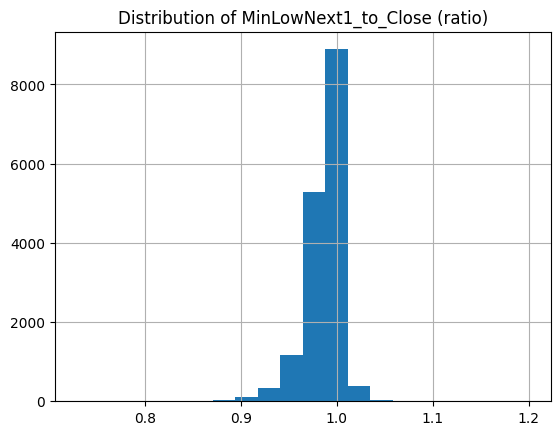

In [345]:
result.Ratio_MinLowNext1_to_Close.hist(bins=20)
plt.title(f'Distribution of MinLowNext1_to_Close (ratio)')
# Show the plot
plt.show()

In [346]:
result.Ratio_MinLowNext1_to_Close.describe().T

count    16314.000000
mean         0.986447
std          0.020385
min          0.729876
25%          0.980021
50%          0.990624
75%          0.997373
max          1.199653
Name: Ratio_MinLowNext1_to_Close, dtype: float64

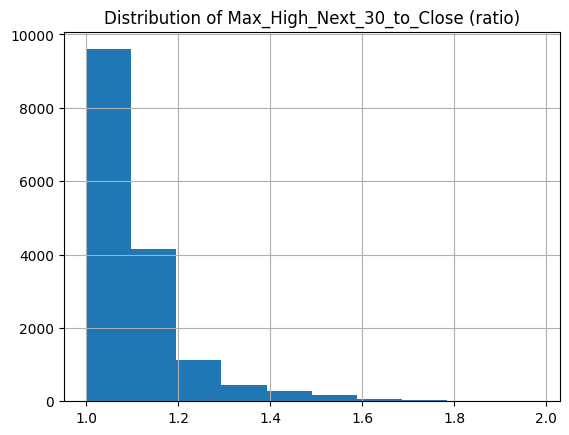

In [347]:
result.Ratio_MaxHighNext30_to_Close.hist()
plt.title(f'Distribution of Max_High_Next_30_to_Close (ratio)')
# Show the plot
plt.show()

In [348]:
result.Ratio_MaxHighNext30_to_Close.describe().T

count    15866.000000
mean         1.108292
std          0.108465
min          1.000000
25%          1.038860
50%          1.077478
75%          1.136550
max          1.979649
Name: Ratio_MaxHighNext30_to_Close, dtype: float64

In [349]:
result[result.Ratio_MaxHighNext30_to_Close>=1.3].sample(5)

Date          High           Low       Close_x   Ticker  \
2690  2024-11-22    163.588116    161.098226    162.913559     AVGO   
4933  2024-10-21  69462.734375  66829.851562  67367.851562  BTC-USD   
13226 2024-11-18    348.549988    330.010010    338.739990     TSLA   
4678  2024-02-09  48152.496094  45260.824219  47147.199219  BTC-USD   
5385  2022-03-08   2618.166016   2489.755127   2576.747559  ETH-USD   

       Max_High_Next_30  Min_Low_Next_30  Min_Low_Next_1  \
2690         249.860983       156.277190      161.584303   
4933       94002.867188     65188.035156    66581.367188   
13226        488.540009       326.589996      332.750000   
4678       70083.054688     45260.824219    46905.320312   
5385        3573.960205      2489.755127     2573.655273   

       Ratio_MaxHighNext30_to_Close  Ratio_MinLowNext30_to_Close  \
2690                       1.533703                     0.959264   
4933                       1.395367                     0.967643   
13226                      1.442227                     0.964132   
4678                       1.486473                     0.959990   
5385                       1.387004                     0.966239   

       Ratio_MinLowNext1_to_Close  
2690                     0.991841  
4933                     0.988326  
13226                    0.982317  
4678                     0.994870  
5385                     0.998800

In [350]:
# ~1.8% cases TAKE PROFIT (30%)
len(result[result.Ratio_MaxHighNext30_to_Close>=1.3])/len(result)

0.05939987752602572

<Axes: >

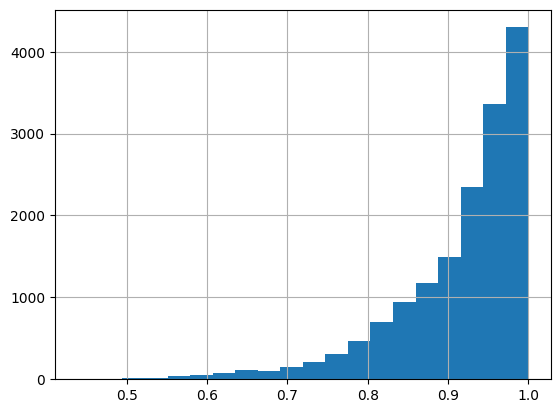

In [351]:
# High intra-day volatility, especially on earlier days after the IPO
result.Ratio_MinLowNext30_to_Close.hist(bins=20)

In [352]:
result.Ratio_MinLowNext30_to_Close.describe().T

count    15866.000000
mean         0.914363
std          0.082016
min          0.438588
25%          0.878504
50%          0.940988
75%          0.974069
max          0.999932
Name: Ratio_MinLowNext30_to_Close, dtype: float64

In [353]:
result[result.Ratio_MinLowNext30_to_Close<=0.8].sample(5)

Date          High           Low       Close_x   Ticker  \
12333 2025-03-06    115.324879    110.195999    110.545921     NVDA   
12581 2022-04-26    333.333344    291.666656    292.140015     TSLA   
5478  2022-06-09   1827.293091   1779.867554   1789.826050  ETH-USD   
6395  2024-12-12   3987.005859   3800.090820   3883.101562  ETH-USD   
4798  2024-06-08  69533.320312  69210.742188  69305.773438  BTC-USD   

       Max_High_Next_30  Min_Low_Next_30  Min_Low_Next_1  \
12333        122.874539        86.609099      107.536571   
12581        333.333344       206.856674      292.453339   
5478        1827.293091       896.109009     1663.433960   
6395        4106.955566      3098.203613     3855.023682   
4798       70146.070312     53717.375000    69160.843750   

       Ratio_MaxHighNext30_to_Close  Ratio_MinLowNext30_to_Close  \
12333                      1.111525                     0.783467   
12581                      1.141005                     0.708074   
5478                       1.020933                     0.500668   
6395                       1.057648                     0.797868   
4798                       1.012124                     0.775078   

       Ratio_MinLowNext1_to_Close  
12333                    0.972777  
12581                    1.001073  
5478                     0.929383  
6395                     0.992769  
4798                     0.997909

In [354]:
# ~0.8% STOP LOSS
len(result[result.Ratio_MinLowNext30_to_Close<=0.8])/len(result)

0.0906307409675444

In [355]:
# Merge the results back with the original dataframe
new_df = new_df.merge(result[['Date', 'Ticker', 'Max_High_Next_30', 'Min_Low_Next_30','Ratio_MaxHighNext30_to_Close','Ratio_MinLowNext30_to_Close','Ratio_MinLowNext1_to_Close']], on=['Date', 'Ticker'])

In [356]:
new_df.sample(5)

Open        High         Low     Close_x       Volume  Dividends  \
13823  225.016407  226.452208  223.649454  224.996735    5897100.0        0.0   
13425  354.640015  358.440002  344.839996  346.399994   75208300.0        0.0   
12144  113.569390  114.947762  111.952121  114.947762  438392000.0        0.0   
13194  244.479996  249.789993  237.809998  240.660004   80729200.0        0.0   
10506  760.000000  776.849976  758.409973  776.369995   15801700.0        0.0   

       Stock Splits Ticker  Year      Month  ... sim1_net_rev_pred10  \
13823           0.0      V  2023       June  ...            5.036248   
13425           0.0   TSLA  2025  September  ...                 NaN   
12144           0.0   NVDA  2024       June  ...            2.408414   
13194           0.0   TSLA  2024    October  ...            0.000000   
10506           0.0   META  2025     August  ...            0.000000   

      sim1_gross_rev_pred11  sim1_fees_pred11  sim1_net_rev_pred11  \
13823                   0.0               0.0                  0.0   
13425                   NaN               0.0                  NaN   
12144                   0.0               0.0                  0.0   
13194                   0.0               0.0                  0.0   
10506                   0.0               0.0                  0.0   

       pred10_rank  Max_High_Next_30  Min_Low_Next_30  \
13823          4.0        241.301843       217.355589   
13425         10.0               NaN              NaN   
12144         12.0        140.707604       111.952121   
13194         11.0        358.640015       212.110001   
10506         13.0        796.250000       721.729980   

       Ratio_MaxHighNext30_to_Close  Ratio_MinLowNext30_to_Close  \
13823                      1.072468                     0.966039   
13425                           NaN                          NaN   
12144                      1.224100                     0.973939   
13194                      1.490235                     0.881368   
10506                      1.025606                     0.929621   

       Ratio_MinLowNext1_to_Close  
13823                    0.984790  
13425                    0.992552  
12144                    0.991696  
13194                    1.016289  
10506                    0.982779  

[5 rows x 276 columns]

### 10.2.3) Generate fin.result for one date

In [357]:
from dataclasses import dataclass

@dataclass
class SimulationParams:
    initial_capital: float
    threshold: float
    fees: float
    top_k: int
    portfolio_optimization: bool
    stop_loss: float
    take_profit: float
    lower_entry: float

In [358]:
# Example of initializing with some values
sim_params = SimulationParams(
    initial_capital=10000,        # initial capital = $10k
    threshold=0.4,               # select all binary predictions with probability>=0.55
    fees=0.002,                   # trading fees = 0.2% (buy+sell)
    top_k=10,                     # select top_k predictions
    portfolio_optimization=False, # no portfolio optimizaiton
    stop_loss=0.8,                # automatic sell (with loss) if price (any of next 30 days) is lower than -20% from Close
    take_profit=1.3,              # automatic sell (with profit) if price (any of next 30 days) is higher than +30% from Close
    lower_entry= 0.995                # buy next day with the price = [Close] * 0.995 (try to buy cheaper)
)

print(sim_params)

SimulationParams(initial_capital=10000, threshold=0.4, fees=0.002, top_k=10, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.995)


In [359]:
# sorted array of dates for Simulation
DATES = new_df[new_df.split=='test'].sort_values(by='Date').Date.unique()
print(f' Min date {DATES.min()}, max date {DATES.max()}')

 Min date 2021-11-13 00:00:00, max date 2025-09-22 00:00:00


In [360]:
date = DATES[0]
date

Timestamp('2021-11-13 00:00:00')

In [361]:
# 1. get TOP_K predictions from pred10_rf_best_rule_50, that are higher than THE THRESHOLD
if sim_params.top_k is None:
  one_day_predictions_df = new_df[(new_df.Date==date)&(new_df.proba_pred10 > sim_params.threshold)]
else:
  one_day_predictions_df = new_df[(new_df.Date==date)&(new_df.proba_pred10 > sim_params.threshold)&(new_df.pred10_rank<=sim_params.top_k)]

In [362]:
one_day_predictions_df[['Date','Ticker',to_predict,'growth_future_30d','proba_pred10','pred10_rank']]

Date   Ticker  is_positive_growth_30d_future  growth_future_30d  \
5270 2021-11-13  ETH-USD                              0           0.813557   

      proba_pred10  pred10_rank  
5270      0.552966          1.0

In [363]:
# 2. Get non-normalized weights: probability-threshold + 0.01
one_day_predictions_df['weight'] = one_day_predictions_df.proba_pred10 - sim_params.threshold +0.01

In [364]:
one_day_predictions_df[['Date','Ticker','Close_x', to_predict,'growth_future_30d','proba_pred10','pred10_rank','weight']]

Date   Ticker      Close_x  is_positive_growth_30d_future  \
5270 2021-11-13  ETH-USD  4651.460449                              0   

      growth_future_30d  proba_pred10  pred10_rank    weight  
5270           0.813557      0.552966          1.0  0.162966

In [365]:
# 3. Get normalized weights
one_day_predictions_df['weight_norm'] = one_day_predictions_df['weight']/one_day_predictions_df['weight'].sum()

In [366]:
one_day_predictions_df[['Date','Ticker','Close_x', to_predict,'growth_future_30d','proba_pred10','pred10_rank','weight','weight_norm']]

Date   Ticker      Close_x  is_positive_growth_30d_future  \
5270 2021-11-13  ETH-USD  4651.460449                              0   

      growth_future_30d  proba_pred10  pred10_rank    weight  weight_norm  
5270           0.813557      0.552966          1.0  0.162966          1.0

In [367]:
# 4. Capital: either 1/30 of initial (assuming you trade every day), or everything that you can sell from 30 days ago
one_day_predictions_df['investment'] = one_day_predictions_df['weight_norm'] * sim_params.initial_capital /30

In [368]:
# See the allocation of an 'investment' at a price = 'Adj.Close' * sim_params.lower_entry (e.g. 0.995 - try to buy cheaper)
one_day_predictions_df[['Date','Ticker','Close_x', to_predict,'growth_future_30d','proba_pred10','pred10_rank','weight','weight_norm', 'investment']]

Date   Ticker      Close_x  is_positive_growth_30d_future  \
5270 2021-11-13  ETH-USD  4651.460449                              0   

      growth_future_30d  proba_pred10  pred10_rank    weight  weight_norm  \
5270           0.813557      0.552966          1.0  0.162966          1.0   

      investment  
5270  333.333333

In [369]:
# 5. Lower Entry: the trade is executed only is Low price for next day is lower than bet
one_day_predictions_df['lower_entry'] = (one_day_predictions_df['Ratio_MinLowNext1_to_Close']<=sim_params.lower_entry).astype(int)

In [370]:
one_day_predictions_df.tail(10)

Open         High          Low      Close_x        Volume  \
5270  4666.719238  4702.115234  4582.180664  4651.460449  1.445744e+10   

      Dividends  Stock Splits   Ticker  Year     Month  ... pred10_rank  \
5270        0.0           0.0  ETH-USD  2021  November  ...         1.0   

     Max_High_Next_30  Min_Low_Next_30  Ratio_MaxHighNext30_to_Close  \
5270       4891.70459      3525.494141                      1.051649   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
5270                     0.757933                    0.971079  0.162966   

      weight_norm  investment  lower_entry  
5270          1.0  333.333333            1  

[1 rows x 280 columns]

In [371]:
# 6. Stop Loss: happens if the current price (or Low price) goes below stop loss threshold during one of the next 5 periods (1 week)
one_day_predictions_df['stop_loss'] = (one_day_predictions_df['Ratio_MinLowNext30_to_Close'] <= sim_params.stop_loss).astype(int)

In [372]:
# 7. Take Profit: take the money if the current Price (or Max_price) goes higher than sim_params.take_profit
one_day_predictions_df['take_profit'] = (one_day_predictions_df['Ratio_MaxHighNext30_to_Close'] >= sim_params.take_profit).astype(int)

In [373]:
one_day_predictions_df.tail(10)

Open         High          Low      Close_x        Volume  \
5270  4666.719238  4702.115234  4582.180664  4651.460449  1.445744e+10   

      Dividends  Stock Splits   Ticker  Year     Month  ... Min_Low_Next_30  \
5270        0.0           0.0  ETH-USD  2021  November  ...     3525.494141   

     Ratio_MaxHighNext30_to_Close  Ratio_MinLowNext30_to_Close  \
5270                     1.051649                     0.757933   

      Ratio_MinLowNext1_to_Close    weight  weight_norm  investment  \
5270                    0.971079  0.162966          1.0  333.333333   

      lower_entry  stop_loss  take_profit  
5270            1          1            0  

[1 rows x 282 columns]

In [374]:
# future_gross_return, depending on lower_entry, take_profit, stop_loss

import random

def get_future_gross_return(row, sim_params:SimulationParams):
  if row['lower_entry']==0: # no trade, investment is untouched, no fees
    return row['investment']

  # buy trade is filled for ALL next cases:
  if row['take_profit']==1 and row['stop_loss']==1:
    if random.random()>0.5: #assume take_profit event was first
      return  row['investment']*(sim_params.take_profit+(1-sim_params.lower_entry))
    else: #assume stop_loss event was first
      return row['investment']*(sim_params.stop_loss+(1-sim_params.lower_entry))

  if row['take_profit']==1: # take some good profit, pay fees
    return  row['investment']*(sim_params.take_profit+(1-sim_params.lower_entry))

  if row['stop_loss']==1: # fix the loss, pay fees
      return row['investment']*(sim_params.stop_loss+(1-sim_params.lower_entry))

  # no stop_loss and no take_profit
  if pd.isna(row['growth_future_30d']):
    return row['investment'] # no information on growth in 30 days --> return the same investment in 5 days
  else:
    return row['investment']*(row['growth_future_30d']+(1-sim_params.lower_entry))

In [375]:
# fees, depending on lower_entry, take_profit, stop_loss

def get_fees(row, sim_params:SimulationParams):
  if row['lower_entry']==0: # no trade ==> no fees
    return 0

  # pay fees in all other cases
  return -row['investment']*sim_params.fees


In [376]:
# 8. calculate future returns (when the order is executed + stop_loss True/False + take_profit True/False)
one_day_predictions_df['future_gross_return'] = one_day_predictions_df.apply(lambda row: get_future_gross_return(row,sim_params=sim_params), axis=1)
one_day_predictions_df['fees'] =  one_day_predictions_df.apply(lambda row: get_fees(row,sim_params=sim_params), axis=1)
one_day_predictions_df['future_net_return'] = one_day_predictions_df['future_gross_return'] + one_day_predictions_df['fees']

# OLD code when no stop_loss, take_profit, and if order executed
# one_day_predictions_df['investment'] * one_day_predictions_df['growth_future_5d']
# one_day_predictions_df['fees'] =   - one_day_predictions_df['investment'] * sim_params.fees


In [377]:
# result
one_day_predictions_df

Open         High          Low      Close_x        Volume  \
5270  4666.719238  4702.115234  4582.180664  4651.460449  1.445744e+10   

      Dividends  Stock Splits   Ticker  Year     Month  ...  \
5270        0.0           0.0  ETH-USD  2021  November  ...   

     Ratio_MinLowNext1_to_Close    weight  weight_norm  investment  \
5270                   0.971079  0.162966          1.0  333.333333   

      lower_entry  stop_loss  take_profit  future_gross_return      fees  \
5270            1          1            0           268.333333 -0.666667   

      future_net_return  
5270         267.666667  

[1 rows x 285 columns]

### 10.2.4 Wrap up one day simulation into a function

In [379]:
# Simulation Parameters
sim_params = SimulationParams(
    initial_capital=10000,                 # initial capital = $10k
    threshold=0.4,                        # select all binary predictions with probability>=0.55
    fees=0.002,                            # trading fees = 0.2% (buy+sell)
    top_k=10,                              # select top_k predictions
    portfolio_optimization=False,          # no portfolio optimizaiton
    stop_loss=0.8,                         # automatic sell (with loss) if price (any of next 30 trading days) is lower than -20% from Close
    take_profit=1.3,                       # automatic sell (with profit) if price (any of next 30 trading days) is higher than +30% from Close
    lower_entry= 0.995                     # buy next day with the price = [Close] * 0.995 (try to buy cheaper)
)

In [380]:
def one_date_simulation(date:str, invest_sum:float, df:pd.DataFrame, sim_params:SimulationParams, predictor:str='proba_pred10'):

  rank_column = predictor.split('_')[1]+'_rank' # e.g. 'proba_pred10' --> 'pred10_rank'
  # 1. get TOP_K (or ALL) predictions from the predictor (pred14_rf_best_rule_53 by default), that are higher than THE THRESHOLD
  if sim_params.top_k is None:
    one_day_predictions_df = df[(df.Date==date)&(df[predictor] > sim_params.threshold)]
  else:
    one_day_predictions_df = df[(df.Date==date)&(df[predictor] > sim_params.threshold)&(df[rank_column]<=sim_params.top_k)]

  FIELDS = ['Close_x', 'Ticker', 'Date', predictor, rank_column, 'growth_future_30d', 'Ratio_MaxHighNext30_to_Close','Ratio_MinLowNext30_to_Close','Ratio_MinLowNext1_to_Close']
  result_df = one_day_predictions_df[FIELDS].copy()

  # 2. Get non-normalized weights: probability-threshold + 0.01
  result_df['weight'] = result_df[predictor] - sim_params.threshold +0.01

  # 3. Get normalized weights
  result_df['weight_norm'] = result_df['weight']/result_df['weight'].sum()

  # 4. Make bets to allocate 'invest_sum' across all suitable predictions
  result_df['investment'] = result_df['weight_norm'] * invest_sum

  # 5. Lower Entry: the trade is executed only is Low price for next day is lower than the bet (Adj_Close_today * sim_params.lower_entry)
    # [ONLY TRADES with lower_entry==1 are filled by the exchange]
  result_df['lower_entry'] = (result_df['Ratio_MinLowNext1_to_Close'] <= sim_params.lower_entry).astype(int)

  # 6. Stop Loss: happens if the current price (or Low price) goes below stop loss threshold during one of the next 5 periods (1 week)
  result_df['stop_loss'] = (result_df['Ratio_MinLowNext30_to_Close'] <= sim_params.stop_loss).astype(int)

  # 7. Take Profit: take the money if the current Price (or Max_price) goes higher than sim_params.take_profit
  result_df['take_profit'] = (result_df['Ratio_MaxHighNext30_to_Close'] >= sim_params.take_profit).astype(int)

  # 8. Calculate future returns (when the order is executed + stop_loss True/False + take_profit True/False)
  result_df['future_gross_return'] = result_df.apply(lambda row: get_future_gross_return(row,sim_params=sim_params), axis=1)
  result_df['fees'] =  result_df.apply(lambda row: get_fees(row,sim_params=sim_params), axis=1)
  result_df['future_net_return'] = result_df['future_gross_return'] + result_df['fees']

  return result_df

In [381]:
predictor = 'proba_pred10'
rank = predictor.split('_')[1]+'_rank'
print(rank)

pred10_rank


In [382]:
r = one_date_simulation(date='2025-09-14', invest_sum=sim_params.initial_capital/30, df=new_df, sim_params=sim_params, predictor='proba_pred10')

In [383]:
r

Close_x   Ticker       Date  proba_pred10  pred10_rank  \
5261  115407.656250  BTC-USD 2025-09-14      0.441491          2.0   
6671    4609.597656  ETH-USD 2025-09-14      0.510226          1.0   

      growth_future_30d  Ratio_MaxHighNext30_to_Close  \
5261                NaN                           NaN   
6671                NaN                           NaN   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
5261                          NaN                    0.991798  0.051491   
6671                          NaN                    0.969686  0.120226   

      weight_norm  investment  lower_entry  stop_loss  take_profit  \
5261     0.299859   99.953166            1          0            0   
6671     0.700141  233.380167            1          0            0   

      future_gross_return      fees  future_net_return  
5261            99.953166 -0.199906          99.753260  
6671           233.380167 -0.466760         232.913407

In [384]:
# initial investment
r.investment.sum()

np.float64(333.33333333333337)

In [385]:
# result in 30 days (returns+fees)
r.future_net_return.sum()

np.float64(332.6666666666667)

### 10.2.5 Generate fin result for ALL days

In [386]:
all_dates = new_df[new_df.split=='test'].sort_values(by='Date').Date.unique()
all_dates

<DatetimeArray>
['2021-11-13 00:00:00', '2021-11-14 00:00:00', '2021-11-15 00:00:00',
 '2021-11-16 00:00:00', '2021-11-17 00:00:00', '2021-11-18 00:00:00',
 '2021-11-19 00:00:00', '2021-11-20 00:00:00', '2021-11-21 00:00:00',
 '2021-11-22 00:00:00',
 ...
 '2025-09-13 00:00:00', '2025-09-14 00:00:00', '2025-09-15 00:00:00',
 '2025-09-16 00:00:00', '2025-09-17 00:00:00', '2025-09-18 00:00:00',
 '2025-09-19 00:00:00', '2025-09-20 00:00:00', '2025-09-21 00:00:00',
 '2025-09-22 00:00:00']
Length: 1410, dtype: datetime64[ns]

In [387]:
# simulate for all dates but last 5
all_dates[0:-5]

<DatetimeArray>
['2021-11-13 00:00:00', '2021-11-14 00:00:00', '2021-11-15 00:00:00',
 '2021-11-16 00:00:00', '2021-11-17 00:00:00', '2021-11-18 00:00:00',
 '2021-11-19 00:00:00', '2021-11-20 00:00:00', '2021-11-21 00:00:00',
 '2021-11-22 00:00:00',
 ...
 '2025-09-08 00:00:00', '2025-09-09 00:00:00', '2025-09-10 00:00:00',
 '2025-09-11 00:00:00', '2025-09-12 00:00:00', '2025-09-13 00:00:00',
 '2025-09-14 00:00:00', '2025-09-15 00:00:00', '2025-09-16 00:00:00',
 '2025-09-17 00:00:00']
Length: 1405, dtype: datetime64[ns]

In [388]:
# these last days we only "sell" the positions
all_dates[-5:]

<DatetimeArray>
['2025-09-18 00:00:00', '2025-09-19 00:00:00', '2025-09-20 00:00:00',
 '2025-09-21 00:00:00', '2025-09-22 00:00:00']
Length: 5, dtype: datetime64[ns]

In [389]:
capital= 5 * [sim_params.initial_capital/5]
capital[-5]

2000.0

In [390]:
def simulate(df:pd.DataFrame, sim_params:SimulationParams):

  simulation_df = None

  # all dates for simulation
  all_dates = df[df.split=='test'].sort_values(by='Date').Date.unique()

  # arrays of dates and capital available (capital for the first 5 days)
  dates = []
  capital= 30 * [sim_params.initial_capital/30]  # first 30 periods trade with 1/30 of the initial_capital. e.g. [333,...,333] = 10k in total

  for current_date in all_dates[0:-30]:  #growth_future_30d is not defined for the last 30 days : ALL, but last 30 dates

    current_invest_sum = capital[-30]    # take the value or everything that you can sell from 30 days ago

    one_day_simulation_results = one_date_simulation(date = current_date,  # one day simulation result
                                    invest_sum = current_invest_sum,
                                    df = df,
                                    sim_params=sim_params,
                                    predictor='proba_pred10')

    # add capital available in 30 days
    if len(one_day_simulation_results)==0:  #no predictions -> no trades
      capital.append(current_invest_sum)
    else:
      capital.append(one_day_simulation_results.future_net_return.sum())
    dates.append(current_date)

    if simulation_df is None:
      simulation_df = one_day_simulation_results
    else:
      simulation_df = pd.concat([simulation_df, one_day_simulation_results], ignore_index=True)

  # add last 5 days to make the count of data points equal for dates/capital arrays
  dates.extend(all_dates[-30:])
  capital_df = pd.DataFrame({'capital':capital}, index=pd.to_datetime(dates))

  # results:
  print(f'============================================================================================')
  print(f'SIMULATION STARTED')
  print(f'Simulations params: {sim_params}')
  print(f' Count bids {len(simulation_df)} in total, avg.bids per day {len(simulation_df)/simulation_df.Date.nunique()},  filled bids {len(simulation_df[simulation_df.lower_entry==1])}, fill bids percent = {len(simulation_df[simulation_df.lower_entry==1])/len(simulation_df)}')
  stop_loss_filter = (simulation_df.lower_entry==1)&(simulation_df.stop_loss==1)
  print(f'  Stop loss events: count = {len(simulation_df[stop_loss_filter])}, net loss = {simulation_df[stop_loss_filter].future_net_return.sum()-simulation_df[stop_loss_filter].investment.sum()} ')
  take_profit_filter = (simulation_df.lower_entry==1)&(simulation_df.take_profit==1)
  print(f'  Take profit events: count = {len(simulation_df[take_profit_filter])}, net profit = {simulation_df[take_profit_filter].future_net_return.sum()-simulation_df[take_profit_filter].investment.sum()} ')
  print(f'  Start capital = {sim_params.initial_capital}, Resulting capital: {capital_df[-30:].capital.sum()} ')
  print(f'  CAGR in 4 years: {np.round((capital_df[-30:].capital.sum()/sim_params.initial_capital)**(1/4),3)} or {np.round(((capital_df[-30:].capital.sum()/sim_params.initial_capital)**(1/4)-1)*100.0,2)} % of avg. growth per year')
  print(f'============================================================================================')
  return simulation_df,capital_df

In [392]:
# One initial simulation
sim_params = SimulationParams(
    initial_capital = 10000,        # initial capital = $10k
    threshold = 0.5,               # select all binary predictions with probability>=0.55
    fees = 0.002,                   # trading fees = 0.2% (buy+sell)
    top_k = 5,                      # select top_k=5 predictions
    portfolio_optimization = False, # no portfolio optimization
    stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -20% from Adj.Close
    take_profit = 1.3,              # automatic sell (with profit) if price (any of next 5 days) is higher than +30% from Adj.Close
    lower_entry = 0.99               # buy next day with the price = [Close] * 0.99 (try to buy cheaper)
)

res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.99)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 2398, fill bids percent = 0.48660714285714285
  Stop loss events: count = 298, net loss = -7995.330769220171 
  Take profit events: count = 177, net profit = 6958.543560946673 
  Start capital = 10000, Resulting capital: 13979.448382765253 
  CAGR in 4 years: 1.087 or 8.74 % of avg. growth per year


### 10.2.6 Find optimal parameters of simulation (Most exciting part)

In [393]:
# BEST PREVIOUS CAGR is 7.8%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.99)
# iterate over lower_entry
for lower_entry in [0.97,0.98,0.99,1,1.01,1.02,1.03]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = 0.5,               # select all binary predictions with probability>=0.55
      fees = 0.002,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.3,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = lower_entry                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.97)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 657, fill bids percent = 0.13331980519480519
  Stop loss events: count = 147, net loss = -3470.281925760806 
  Take profit events: count = 67, net profit = 2515.5190833506076 
  Start capital = 10000, Resulting capital: 11386.2846323788 
  CAGR in 4 years: 1.033 or 3.3 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.98)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 1228, fill bids percent = 0.24918831168831168
  Stop loss events: count = 218, net loss = -5349.131726465614 
  Take profit events: count = 107, net profit = 41

In [394]:
# BEST PREVIOUS is CAGR 17.41%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=0.99 ==> lower_entry=1.0)

# iterate over take profit   ==> new best take_profit=1.5
for take_profit in [1.2,1.25,1.3,1.35,1.4,1.45,1.5]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = 0.5,               # select all binary predictions with probability>=0.55
      fees = 0.002,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.8,                # automatic sell (with loss) if price (any of next 30 days) is lower than -5% from Adj.Close
      take_profit = take_profit,        # automatic sell (with profit) if price (any of next 30 days) is higher than +20% from Adj.Close
      lower_entry = 1                # buy next day with the price = [Close] * lower_entry (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.2, lower_entry=1)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 4113, fill bids percent = 0.8346185064935064
  Stop loss events: count = 372, net loss = -10499.639558630013 
  Take profit events: count = 528, net profit = 11976.59468418877 
  Start capital = 10000, Resulting capital: 15147.984785962544 
  CAGR in 4 years: 1.109 or 10.94 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.25, lower_entry=1)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 4113, fill bids percent = 0.8346185064935064
  Stop loss events: count = 372, net loss = -11012.525740924197 
  Take profit events: count = 356, net profit = 12

In [397]:
# BEST PREVIOUS is CAGR 17.41%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=1.0)
# BEST PREVIOUS is CAGR 22.97%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3 => take_profit=1.5, lower_entry=1.0)

# iterate over stop_loss
for stop_loss in [0.55,0.6,0.65,0.7,0.75,0.8,0.85]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = 0.5,               # select all binary predictions with probability>=0.55
      fees = 0.002,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = stop_loss,                # automatic sell (with loss) if price (any of next 30 days) is lower than -"stop_loss"% from Close
      take_profit = 1.5,              # automatic sell (with profit) if price (any of next 30 days) is higher than +50% from Close
      lower_entry = 1                # buy next day with the price = [Close] * 1 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.55, take_profit=1.5, lower_entry=1)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 4113, fill bids percent = 0.8346185064935064
  Stop loss events: count = 9, net loss = -621.5287660909711 
  Take profit events: count = 93, net profit = 8327.190396772101 
  Start capital = 10000, Resulting capital: 24373.157036943743 
  CAGR in 4 years: 1.249 or 24.95 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.5, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.6, take_profit=1.5, lower_entry=1)
 Count bids 4928 in total, avg.bids per day 3.6208670095518003,  filled bids 4113, fill bids percent = 0.8346185064935064
  Stop loss events: count = 35, net loss = -1998.2890109993505 
  Take profit events: count = 93, net profit = 8136.413

In [398]:
# BEST PREVIOUS is CAGR 17.41%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=1.0)
# BEST PREVIOUS is CAGR 22.97%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3 => take_profit=1.5, lower_entry=1.0)
# BEST PREVIOUS is CAGR 23.63%  (top_k=5, portfolio_optimization=False, stop_loss=0.8 => stop_loss=0.75, take_profit=1.5, lower_entry=1.0) # not select stop_loss=0.55 due to too large maxdown


# iterate over lower_entry ++ take profit of 2.5%
  # best lower_entry ==0.98
for threshold in [0.4, 0.43, 0.45, 0.47,0.48,0.49,0.5,0.51,0.52,0.53, 0.57, 0.6]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = threshold,               # select all binary predictions with probability>=threshold (iter param)
      fees = 0.002,                   # trading fees = 0.2% (buy+sell)
      top_k = 5,                     # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = 0.75,                # automatic sell (with loss) if price (any of next 30 days) is lower than -40% from Close
      take_profit = 1.5,              # automatic sell (with profit) if price (any of next 30 days) is higher than +50% from Adj.Close
      lower_entry = 1                # buy next day with the price = [Close] * lower_entry (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.4, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1)
 Count bids 5574 in total, avg.bids per day 4.039130434782609,  filled bids 4686, fill bids percent = 0.8406889128094726
  Stop loss events: count = 240, net loss = -8513.104073531798 
  Take profit events: count = 96, net profit = 7098.670706135063 
  Start capital = 10000, Resulting capital: 23499.194316940124 
  CAGR in 4 years: 1.238 or 23.81 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.43, fees=0.002, top_k=5, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1)
 Count bids 5520 in total, avg.bids per day 4.0,  filled bids 4632, fill bids percent = 0.8391304347826087
  Stop loss events: count = 240, net loss = -8804.389958175769 
  Take profit events: count = 96, net profit = 7468.015323436228 
 

In [399]:
# BEST PREVIOUS is CAGR 17.41%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=1.0)
# BEST PREVIOUS is CAGR 22.97%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3 => take_profit=1.5, lower_entry=1.0)
# BEST PREVIOUS is CAGR 23.63%  (top_k=5, portfolio_optimization=False, stop_loss=0.8 => stop_loss=0.75, take_profit=1.5, lower_entry=1.0) # not select stop_loss=0.55 due to too large maxdown
# BEST PREVIOUS is CAGR 24.85%  (threshold=0.5 -> threshold=0.53 -- for a decision rule, top_k=5, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1.0)


# iterate over top_k
for top_k in [1,2,3,4,5,6,8,10,20,33]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.56
      fees = 0.002,                     # trading fees = 0.2% (buy+sell)
      top_k = top_k,                    # select top_k predictions
      portfolio_optimization = False,   # no portfolio optimization
      stop_loss = 0.75,                 # automatic sell (with loss) if price (any of next 30 days) is lower than
      take_profit = 1.5,              # automatic sell (with profit) if price (any of next 30 days) is higher than +50% from Close
      lower_entry = 1.0                # buy next day with the price = [Close] * (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=1, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1.0)
 Count bids 1229 in total, avg.bids per day 1.0,  filled bids 1066, fill bids percent = 0.8673718470301057
  Stop loss events: count = 84, net loss = -8419.167408497218 
  Take profit events: count = 40, net profit = 8871.695112573077 
  Start capital = 10000, Resulting capital: 22318.848303896506 
  CAGR in 4 years: 1.222 or 22.23 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=2, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1.0)
 Count bids 2120 in total, avg.bids per day 1.7249796582587469,  filled bids 1810, fill bids percent = 0.8537735849056604
  Stop loss events: count = 119, net loss = -8382.594394235293 
  Take profit events: count = 53, net profit = 8774.7565306941

In [400]:
# BEST PREVIOUS is CAGR 17.41%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3, lower_entry=1.0)
# BEST PREVIOUS is CAGR 22.97%  (top_k=5, portfolio_optimization=False, stop_loss=0.8, take_profit=1.3 => take_profit=1.5, lower_entry=1.0)
# BEST PREVIOUS is CAGR 23.63%  (top_k=5, portfolio_optimization=False, stop_loss=0.8 => stop_loss=0.75, take_profit=1.5, lower_entry=1.0) # not select stop_loss=0.55 due to too large maxdown
# BEST PREVIOUS is CAGR 24.85%  (threshold=0.5 -> threshold=0.53 -- for a decision rule, top_k=5, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1.0)

# BEST PREVIOUS is CAGR 25.85%  (threshold=0.53, top_k=5 ==> top_k=3, portfolio_optimization=False, stop_loss=0.75, take_profit=1.5, lower_entry=1.0)


# fine tune stop loss
for stop_loss in [0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8]:
  # One simulation
  sim_params = SimulationParams(
      initial_capital = 10000,        # initial capital = $10k
      threshold = 0.53,               # select all binary predictions with probability>=0.56
      fees = 0.002,                   # trading fees = 0.2% (buy+sell)
      top_k = 3,                      # select top_k predictions
      portfolio_optimization = False, # no portfolio optimization
      stop_loss = stop_loss,                # automatic sell (with loss) if price (any of next 5 days) is lower than -5% from Adj.Close
      take_profit = 1.5,              # automatic sell (with profit) if price (any of next 5 days) is higher than +20% from Adj.Close
      lower_entry = 1                # buy next day with the price = [Adj.Close] * 0.995 (try to buy cheaper)
  )

  res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=3, portfolio_optimization=False, stop_loss=0.7, take_profit=1.5, lower_entry=1)
 Count bids 2792 in total, avg.bids per day 2.271765663140765,  filled bids 2360, fill bids percent = 0.8452722063037249
  Stop loss events: count = 93, net loss = -7297.064419179649 
  Take profit events: count = 67, net profit = 8861.359426239385 
  Start capital = 10000, Resulting capital: 24182.442789132012 
  CAGR in 4 years: 1.247 or 24.7 % of avg. growth per year
SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=3, portfolio_optimization=False, stop_loss=0.71, take_profit=1.5, lower_entry=1)
 Count bids 2792 in total, avg.bids per day 2.271765663140765,  filled bids 2360, fill bids percent = 0.8452722063037249
  Stop loss events: count = 100, net loss = -7567.059798982846 
  Take profit events: count = 67, net profit = 8925.113

### 10.2.7 Explore the best simulation params ( CAGR **26.36%**  (threshold=0.53, top_k=3, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1.0))

In [401]:
sim_params = SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=3, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1)

res, capital = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=3, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1)
 Count bids 2792 in total, avg.bids per day 2.271765663140765,  filled bids 2360, fill bids percent = 0.8452722063037249
  Stop loss events: count = 174, net loss = -9571.99962161146 
  Take profit events: count = 67, net profit = 9219.076325926242 
  Start capital = 10000, Resulting capital: 25497.119116370395 
  CAGR in 4 years: 1.264 or 26.36 % of avg. growth per year


In [402]:
res[res.Date=='2024-04-30']
# .future_net_return.sum()

Close_x Ticker       Date  proba_pred10  pred10_rank  \
2048  169.115540   AAPL 2024-04-30      0.572716          2.0   
2049  175.000000   AMZN 2024-04-30      0.562662          3.0   
2050  396.730011  BRK-B 2024-04-30      0.582134          1.0   

      growth_future_30d  Ratio_MaxHighNext30_to_Close  \
2048           1.252622                      1.217877   
2049           1.067943                      1.095429   
2050           1.030348                      1.051924   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
2048                     0.992837                    0.992837  0.052716   
2049                     0.993543                    1.008914  0.042662   
2050                     0.999042                    0.999042  0.062134   

      weight_norm  investment  lower_entry  stop_loss  take_profit  \
2048     0.334681  172.130572            1          0            0   
2049     0.270847  139.300159            0          0            0   
2050     0.394472  202.881612            1          0            0   

      future_gross_return      fees  future_net_return  
2048           215.614479 -0.344261         215.270218  
2049           139.300159  0.000000         139.300159  
2050           209.038671 -0.405763         208.632908

In [403]:
# number of bids (out of 900+ trading days)
len(res)

2792

In [404]:
# filled deals
res.lower_entry.sum()

np.int64(2360)

In [405]:
# stop loss (regardless of a filled bid)

res.stop_loss.sum()

np.int64(180)

In [406]:
# take profit (regardless of a filled bid)
res.take_profit.sum()

np.int64(78)

In [407]:
res[(res.stop_loss==1)&(res.lower_entry==1)]

Close_x   Ticker       Date  proba_pred10  pred10_rank  \
0     4651.460449  ETH-USD 2021-11-13      0.552966          1.0   
1     4626.358887  ETH-USD 2021-11-14      0.554429          1.0   
63    3908.496094  ETH-USD 2021-12-10      0.668742          3.0   
66    4084.452393  ETH-USD 2021-12-11      0.652012          1.0   
67    4134.453125  ETH-USD 2021-12-12      0.663141          1.0   
...           ...      ...        ...           ...          ...   
2575   113.745689     NVDA 2025-03-26      0.597087          1.0   
2578   111.415985     NVDA 2025-03-27      0.605855          1.0   
2582  1827.320312  ETH-USD 2025-03-29      0.615099          1.0   
2583  1806.218628  ETH-USD 2025-03-30      0.623293          1.0   
2599  1805.973267  ETH-USD 2025-04-05      0.618335          1.0   

      growth_future_30d  Ratio_MaxHighNext30_to_Close  \
0              0.813557                      1.051649   
1              0.809587                      1.057355   
63             0.807920                      1.081519   
66             0.754838                      1.021828   
67             0.783202                      1.009471   
...                 ...                           ...   
2575           1.031734                      1.044655   
2578           1.046845                      1.065063   
2582           0.984421                      1.067782   
2583           0.996101                      1.080257   
2599           1.007599                      1.037080   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
0                        0.757933                    0.971079  0.032966   
1                        0.762045                    0.982760  0.034429   
63                       0.772901                    0.984024  0.148742   
66                       0.739605                    0.977623  0.132012   
67                       0.712956                    0.890229  0.143141   
...                           ...                         ...       ...   
2575                     0.761428                    0.972750  0.077087   
2578                     0.777349                    0.978821  0.085855   
2582                     0.758925                    0.968310  0.095099   
2583                     0.767792                    0.984760  0.103293   
2599                     0.767896                    0.852415  0.098335   

      weight_norm  investment  lower_entry  stop_loss  take_profit  \
0        1.000000  333.333333            1          1            0   
1        1.000000  333.333333            1          1            0   
63       0.311138  103.712830            1          1            0   
66       1.000000  333.333333            1          1            0   
67       1.000000  333.333333            1          1            0   
...           ...         ...          ...        ...          ...   
2575     0.450130  359.048580            1          1            0   
2578     0.377390  121.157249            1          1            0   
2582     1.000000  625.389051            1          1            0   
2583     1.000000  614.612614            1          1            0   
2599     1.000000  658.837201            1          1            0   

      future_gross_return      fees  future_net_return  
0              260.000000 -0.666667         259.333333  
1              260.000000 -0.666667         259.333333  
63              80.896007 -0.207426          80.688581  
66             260.000000 -0.666667         259.333333  
67             260.000000 -0.666667         259.333333  
...                   ...       ...                ...  
2575           280.057892 -0.718097         279.339795  
2578            94.502654 -0.242314          94.260340  
2582           487.803460 -1.250778         486.552682  
2583           479.397839 -1.229225         478.168614  
2599           513.893017 -1.317674         512.575343  

[174 rows x 18 columns]

In [408]:
# could take profit, but the bid was not executed
res[(res.take_profit==1)&(res.lower_entry==0)]

Close_x   Ticker       Date  proba_pred10  pred10_rank  \
627   1338.635742  ETH-USD 2022-07-17      0.565139          1.0   
830     11.213527     NVDA 2022-10-14      0.601065          1.0   
972    112.709999     TSLA 2022-12-28      0.630479          2.0   
993     14.844967     NVDA 2023-01-06      0.585098          3.0   
994    113.059998     TSLA 2023-01-06      0.610055          1.0   
1256    27.727503     NVDA 2023-04-28      0.577079          2.0   
1263    59.182049     AVGO 2023-05-02      0.585400          1.0   
1269    58.971344     AVGO 2023-05-04      0.610499          3.0   
2453   160.780807     AVGO 2024-11-29      0.562111          1.0   
2634   169.181793     AVGO 2025-04-22      0.606929          2.0   
2637   176.494583     AVGO 2025-04-23      0.560256          2.0   

      growth_future_30d  Ratio_MaxHighNext30_to_Close  \
627            1.403025                      1.511084   
830            1.409727                      1.514029   
972            1.746873                      1.898678   
993            1.390067                      1.551181   
994            1.745710                      1.925084   
1256           1.422973                      1.511334   
1263           1.447202                      1.505340   
1269           1.422758                      1.510719   
2453           1.410482                      1.554047   
2634           1.539568                      1.520698   
2637           1.469278                      1.500367   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
627                      0.993372                    1.000127  0.045139   
830                      0.997951                    1.025831  0.081065   
972                      0.903292                    1.042498  0.110479   
993                      0.944478                    1.018978  0.065098   
994                      0.900495                    1.035822  0.090055   
1256                     0.975567                    1.001117  0.057079   
1263                     0.981954                    1.000098  0.065400   
1269                     0.985463                    1.005261  0.090499   
2453                     0.981491                    1.004134  0.042111   
2634                     0.974289                    1.036797  0.086929   
2637                     0.993839                    1.007857  0.040256   

      weight_norm  investment  lower_entry  stop_loss  take_profit  \
627      0.690341  187.430511            0          0            1   
830      0.360560   73.659894            0          0            1   
972      0.345559   60.097008            0          0            1   
993      0.270876  115.203350            0          0            1   
994      0.374722  159.368841            0          0            1   
1256     0.311181   83.692154            0          0            1   
1263     0.370909  102.120308            0          0            1   
1269     0.293161   64.829370            0          0            1   
2453     0.562887  403.862589            0          0            1   
2634     0.321090   92.614658            0          0            1   
2637     0.328898   82.600581            0          0            1   

      future_gross_return  fees  future_net_return  
627            187.430511   0.0         187.430511  
830             73.659894   0.0          73.659894  
972             60.097008   0.0          60.097008  
993            115.203350   0.0         115.203350  
994            159.368841   0.0         159.368841  
1256            83.692154   0.0          83.692154  
1263           102.120308   0.0         102.120308  
1269            64.829370   0.0          64.829370  
2453           403.862589   0.0         403.862589  
2634            92.614658   0.0          92.614658  
2637            82.600581   0.0          82.600581

In [409]:
res[(res.take_profit==1) &(res.lower_entry==1)]

Close_x   Ticker       Date  proba_pred10  pred10_rank  \
576   1051.421875  ETH-USD 2022-06-22      0.558206          2.0   
600   1066.512817  ETH-USD 2022-07-02      0.657088          1.0   
602   1073.766968  ETH-USD 2022-07-03      0.654496          1.0   
604   1151.059082  ETH-USD 2022-07-04      0.608173          1.0   
617   1168.401611  ETH-USD 2022-07-10      0.598523          1.0   
...           ...      ...        ...           ...          ...   
2730  2228.213135  ETH-USD 2025-06-22      0.535385          1.0   
2746  2437.109375  ETH-USD 2025-06-28      0.564164          1.0   
2747  2500.959961  ETH-USD 2025-06-29      0.552514          1.0   
2759  2517.280029  ETH-USD 2025-07-05      0.557141          1.0   
2760  2571.236572  ETH-USD 2025-07-06      0.538344          1.0   

      growth_future_30d  Ratio_MaxHighNext30_to_Close  \
576            1.462215                      1.533776   
600            1.533217                      1.663905   
602            1.520763                      1.652664   
604            1.406422                      1.541690   
617            1.457568                      1.546460   
...                 ...                           ...   
2730           1.682579                      1.730879   
2746           1.554065                      1.590792   
2747           1.516800                      1.575656   
2759           1.477383                      1.565440   
2760           1.404732                      1.532590   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
576                      0.959743                    0.998857  0.038206   
600                      0.955657                    0.978896  0.137088   
602                      0.949201                    0.976372  0.134496   
604                      0.885463                    0.944200  0.088173   
617                      0.872320                    0.937180  0.078523   
...                           ...                         ...       ...   
2730                     0.949946                    0.983487  0.015385   
2746                     0.975908                    0.992005  0.044164   
2747                     0.950992                    0.974848  0.032514   
2759                     0.988767                    0.995269  0.037141   
2760                     0.974384                    0.979258  0.018344   

      weight_norm   investment  lower_entry  stop_loss  take_profit  \
576      0.285946    61.962115            1          0            1   
600      0.684523   108.645808            1          0            1   
602      0.683589   154.455691            1          0            1   
604      0.716915   158.441978            1          0            1   
617      0.700389   177.462094            1          0            1   
...           ...          ...          ...        ...          ...   
2730     1.000000   262.773577            1          0            1   
2746     1.000000   551.723102            1          0            1   
2747     1.000000   402.964548            1          0            1   
2759     1.000000  1419.389626            1          0            1   
2760     1.000000   731.619671            1          0            1   

      future_gross_return      fees  future_net_return  
576             92.943173 -0.123924          92.819249  
600            162.968712 -0.217292         162.751421  
602            231.683536 -0.308911         231.374625  
604            237.662967 -0.316884         237.346083  
617            266.193141 -0.354924         265.838217  
...                   ...       ...                ...  
2730           394.160365 -0.525547         393.634818  
2746           827.584653 -1.103446         826.481207  
2747           604.446822 -0.805929         603.640893  
2759          2129.084439 -2.838779        2126.245660  
2760          1097.429507 -1.463239        1095.966268  

[67 rows x 18 columns]

In [410]:
res[res.Date=='2024-04-30'].future_net_return.sum()

np.float64(563.2032846178759)

In [411]:
# last 20 days
capital[-20:]

capital
2025-09-03  2121.007007
2025-09-04  1160.213667
2025-09-05   475.319819
2025-09-06   297.273959
2025-09-07   824.240026
2025-09-08   843.099714
2025-09-09  1611.330724
2025-09-10  1871.572082
2025-09-11  1127.122724
2025-09-12  1274.064889
2025-09-13   497.781292
2025-09-14   905.369827
2025-09-15   783.291100
2025-09-16  1518.087152
2025-09-17   734.948578
2025-09-18   348.810483
2025-09-19   468.950404
2025-09-20   393.634818
2025-09-21   360.084262
2025-09-22   720.311777

capital    2291.791744
dtype: float64


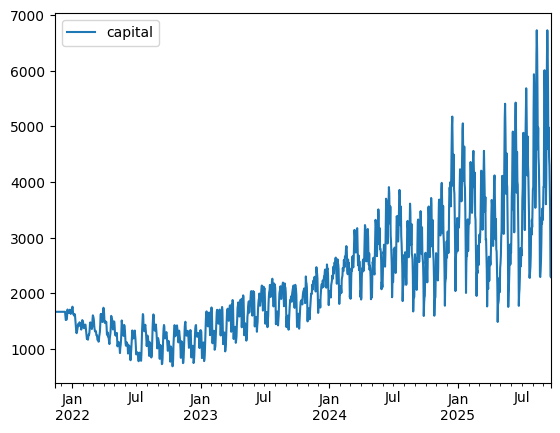

In [412]:
capital.rolling(5).sum().plot.line()
print(capital[-5:].sum())

### Debug optimal strategy with k=6 max trades per day

In [427]:
sim_params = SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=6, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1)

res, capital_4trades = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=6, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1)
 Count bids 4341 in total, avg.bids per day 3.532139951179821,  filled bids 3617, fill bids percent = 0.8332181524994241
  Stop loss events: count = 257, net loss = -9548.174178861205 
  Take profit events: count = 97, net profit = 8990.337883875647 
  Start capital = 10000, Resulting capital: 24583.625053959648 
  CAGR in 4 years: 1.252 or 25.22 % of avg. growth per year


In [428]:
filter_stop_loss = (res.lower_entry==1) & (res.stop_loss==1)
print(f'Average real close price if not stop_loss: {res[filter_stop_loss].growth_future_30d.mean()}')
res[filter_stop_loss].head(10)

Average real close price if not stop_loss: 0.8200615247633035


Close_x   Ticker       Date  proba_pred10  pred10_rank  \
0    4651.460449  ETH-USD 2021-11-13      0.552966          1.0   
1    4626.358887  ETH-USD 2021-11-14      0.554429          1.0   
119  3908.496094  ETH-USD 2021-12-10      0.668742          3.0   
123  4084.452393  ETH-USD 2021-12-11      0.652012          1.0   
124  4134.453125  ETH-USD 2021-12-12      0.663141          1.0   
126  3784.226807  ETH-USD 2021-12-13      0.666911          3.0   
138  4018.388672  ETH-USD 2021-12-15      0.695245          1.0   
144  3962.469727  ETH-USD 2021-12-16      0.707039          1.0   
150  3879.486572  ETH-USD 2021-12-17      0.720744          1.0   
156  3960.860107  ETH-USD 2021-12-18      0.663052          1.0   

     growth_future_30d  Ratio_MaxHighNext30_to_Close  \
0             0.813557                      1.051649   
1             0.809587                      1.057355   
119           0.807920                      1.081519   
123           0.754838                      1.021828   
124           0.783202                      1.009471   
126           0.891135                      1.096400   
138           0.823714                      1.032510   
144           0.840519                      1.047081   
150           0.863754                      1.069478   
156           0.811012                      1.047507   

     Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
0                       0.757933                    0.971079  0.032966   
1                       0.762045                    0.982760  0.034429   
119                     0.772901                    0.984024  0.148742   
123                     0.739605                    0.977623  0.132012   
124                     0.712956                    0.890229  0.143141   
126                     0.778939                    0.977770  0.146911   
138                     0.733549                    0.984488  0.175245   
144                     0.743901                    0.936644  0.187039   
150                     0.759813                    0.972968  0.200744   
156                     0.744203                    0.983220  0.143052   

     weight_norm  investment  lower_entry  stop_loss  take_profit  \
0       1.000000  333.333333            1          1            0   
1       1.000000  333.333333            1          1            0   
119     0.174216   58.072142            1          1            0   
123     1.000000  333.333333            1          1            0   
124     1.000000  333.333333            1          1            0   
126     0.171396   44.448663            1          1            0   
138     0.228890   78.959741            1          1            0   
144     0.192621   66.796060            1          1            0   
150     0.191665   65.139850            1          1            0   
156     0.692549  238.127048            1          1            0   

     future_gross_return      fees  future_net_return  
0             260.000000 -0.666667         259.333333  
1             260.000000 -0.666667         259.333333  
119            45.296271 -0.116144          45.180127  
123           260.000000 -0.666667         259.333333  
124           260.000000 -0.666667         259.333333  
126            34.669957 -0.088897          34.581060  
138            61.588598 -0.157919          61.430678  
144            52.100927 -0.133592          51.967334  
150            50.809083 -0.130280          50.678803  
156           185.739098 -0.476254         185.262844

In [429]:
filter_take_profit = (res.lower_entry==1) & (res.take_profit==1) & (res.stop_loss==0)
print(f'Average real close price if not take_profit: {res[filter_take_profit].growth_future_30d.mean()}')
res[filter_take_profit].head(10)

Average real close price if not take_profit: 1.5152246389808335


Close_x   Ticker       Date  proba_pred10  pred10_rank  \
559    255.456665     TSLA 2022-03-14      0.747160          4.0   
1013  1051.421875  ETH-USD 2022-06-22      0.558206          2.0   
1032  1067.298828  ETH-USD 2022-06-30      0.530233          4.0   
1039  1066.512817  ETH-USD 2022-07-02      0.657088          1.0   
1041  1073.766968  ETH-USD 2022-07-03      0.654496          1.0   
1043  1151.059082  ETH-USD 2022-07-04      0.608173          1.0   
1059  1168.401611  ETH-USD 2022-07-10      0.598523          1.0   
1574   125.349998     TSLA 2022-12-22      0.619983          3.0   
1580   123.150002     TSLA 2022-12-23      0.603464          1.0   
1589   109.099998     TSLA 2022-12-27      0.619123          2.0   

      growth_future_30d  Ratio_MaxHighNext30_to_Close  \
559            1.143599                      1.504326   
1013           1.462215                      1.533776   
1032           1.589030                      1.662680   
1039           1.533217                      1.663905   
1041           1.520763                      1.652664   
1043           1.406422                      1.541690   
1059           1.457568                      1.546460   
1574           1.570084                      1.587555   
1580           1.634511                      1.615916   
1589           1.900275                      1.860678   

      Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
559                      0.986521                    0.987212  0.227160   
1013                     0.959743                    0.998857  0.038206   
1032                     0.945466                    0.974564  0.010233   
1039                     0.955657                    0.978896  0.137088   
1041                     0.949201                    0.976372  0.134496   
1043                     0.885463                    0.944200  0.088173   
1059                     0.872320                    0.937180  0.078523   
1574                     0.812206                    0.965457  0.099983   
1580                     0.826715                    0.883151  0.083464   
1589                     0.933181                    0.992117  0.099123   

      weight_norm  investment  lower_entry  stop_loss  take_profit  \
559      0.159915   31.458417            1          0            1   
1013     0.205430   46.941884            1          0            1   
1032     0.088905   14.314827            1          0            1   
1039     0.684523  117.051299            1          0            1   
1041     0.683589  152.990303            1          0            1   
1043     0.716915  151.496066            1          0            1   
1059     0.700389  163.416728            1          0            1   
1574     0.171871   39.842772            1          0            1   
1580     0.217333   59.012949            1          0            1   
1589     0.206525   38.907492            1          0            1   

      future_gross_return      fees  future_net_return  
559             47.187625 -0.062917          47.124709  
1013            70.412825 -0.093884          70.318941  
1032            21.472241 -0.028630          21.443611  
1039           175.576948 -0.234103         175.342845  
1041           229.485455 -0.305981         229.179474  
1043           227.244099 -0.302992         226.941106  
1059           245.125093 -0.326833         244.798259  
1574            59.764158 -0.079686          59.684472  
1580            88.519423 -0.118026          88.401397  
1589            58.361238 -0.077815          58.283423

In [430]:
filter_no_stop_loss_no_take_profit = (res.lower_entry==1) & (res.take_profit==0) & (res.stop_loss==0)
print(f'Average real close price if no take_profit or stop loss: {res[filter_no_stop_loss_no_take_profit].growth_future_30d.mean()}')
res['realised_profit'] = res.future_net_return/res.investment
res[filter_no_stop_loss_no_take_profit][['growth_future_30d','realised_profit']].describe().T

Average real close price if no take_profit or stop loss: 1.0403330337699026


count      mean       std       min       25%       50%  \
growth_future_30d  3263.0  1.040333  0.112454  0.708168  0.966321  1.031307   
realised_profit    3263.0  1.038333  0.112454  0.706168  0.964321  1.029307   

                        75%       max  
growth_future_30d  1.096284  1.648934  
realised_profit    1.094284  1.646934

capital    24583.625054
dtype: float64


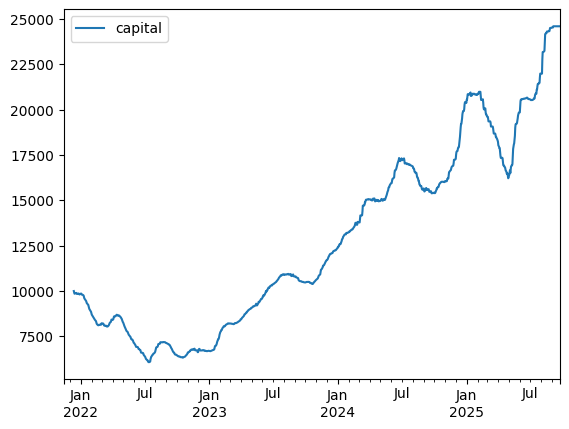

In [431]:
capital_4trades.rolling(30).sum().plot.line()
print(capital_4trades[-30:].sum())

### Debug optimal strategy with k=1 max trades per day

In [418]:
sim_params = SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=1, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1.0)

res, capital_1_trade = simulate(new_df, sim_params)

SIMULATION STARTED
Simulations params: SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=1, portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1.0)
 Count bids 1229 in total, avg.bids per day 1.0,  filled bids 1066, fill bids percent = 0.8673718470301057
  Stop loss events: count = 106, net loss = -9508.280099668496 
  Take profit events: count = 40, net profit = 9174.505647108861 
  Start capital = 10000, Resulting capital: 22941.344438773518 
  CAGR in 4 years: 1.231 or 23.07 % of avg. growth per year


In [419]:
# NO STOP LOSS events
filter_stop_loss = (res.lower_entry==1) & (res.stop_loss==1)
print(f'Average real close price if not stop_loss: {res[filter_stop_loss].growth_future_30d.mean()}')
res[filter_stop_loss].head(10)

Average real close price if not stop_loss: 0.7946846831154009


Close_x   Ticker       Date  proba_pred10  pred10_rank  \
0   4651.460449  ETH-USD 2021-11-13      0.552966          1.0   
1   4626.358887  ETH-USD 2021-11-14      0.554429          1.0   
28  4084.452393  ETH-USD 2021-12-11      0.652012          1.0   
29  4134.453125  ETH-USD 2021-12-12      0.663141          1.0   
32  4018.388672  ETH-USD 2021-12-15      0.695245          1.0   
33  3962.469727  ETH-USD 2021-12-16      0.707039          1.0   
34  3879.486572  ETH-USD 2021-12-17      0.720744          1.0   
35  3960.860107  ETH-USD 2021-12-18      0.663052          1.0   
36  3922.592529  ETH-USD 2021-12-19      0.675475          1.0   
41  4047.982910  ETH-USD 2021-12-24      0.680484          1.0   

    growth_future_30d  Ratio_MaxHighNext30_to_Close  \
0            0.813557                      1.051649   
1            0.809587                      1.057355   
28           0.754838                      1.021828   
29           0.783202                      1.009471   
32           0.823714                      1.032510   
33           0.840519                      1.047081   
34           0.863754                      1.069478   
35           0.811012                      1.047507   
36           0.806616                      1.057726   
41           0.626247                      1.022377   

    Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
0                      0.757933                    0.971079  0.032966   
1                      0.762045                    0.982760  0.034429   
28                     0.739605                    0.977623  0.132012   
29                     0.712956                    0.890229  0.143141   
32                     0.733549                    0.984488  0.175245   
33                     0.743901                    0.936644  0.187039   
34                     0.759813                    0.972968  0.200744   
35                     0.744203                    0.983220  0.143052   
36                     0.751463                    0.958398  0.155475   
41                     0.575656                    0.995045  0.160484   

    weight_norm  investment  lower_entry  stop_loss  take_profit  \
0           1.0  333.333333            1          1            0   
1           1.0  333.333333            1          1            0   
28          1.0  333.333333            1          1            0   
29          1.0  333.333333            1          1            0   
32          1.0  341.883140            1          1            0   
33          1.0  336.833626            1          1            0   
34          1.0  351.604212            1          1            0   
35          1.0  329.906833            1          1            0   
36          1.0  333.333333            1          1            0   
41          1.0  335.066490            1          1            0   

    future_gross_return      fees  future_net_return  
0            260.000000 -0.666667         259.333333  
1            260.000000 -0.666667         259.333333  
28           260.000000 -0.666667         259.333333  
29           260.000000 -0.666667         259.333333  
32           266.668849 -0.683766         265.985083  
33           262.730228 -0.673667         262.056561  
34           274.251286 -0.703208         273.548077  
35           257.327330 -0.659814         256.667516  
36           260.000000 -0.666667         259.333333  
41           261.351863 -0.670133         260.681730

In [420]:
filter_take_profit = (res.lower_entry==1) & (res.take_profit==1) & (res.stop_loss==0)
print(f'Average real close price if not take_profit: {res[filter_take_profit].growth_future_30d.mean()}')
res[filter_take_profit].head(5)

Average real close price if not take_profit: 1.518435173378857


Close_x   Ticker       Date  proba_pred10  pred10_rank  \
231  1066.512817  ETH-USD 2022-07-02      0.657088          1.0   
232  1073.766968  ETH-USD 2022-07-03      0.654496          1.0   
233  1151.059082  ETH-USD 2022-07-04      0.608173          1.0   
239  1168.401611  ETH-USD 2022-07-10      0.598523          1.0   
385   123.150002     TSLA 2022-12-23      0.603464          1.0   

     growth_future_30d  Ratio_MaxHighNext30_to_Close  \
231           1.533217                      1.663905   
232           1.520763                      1.652664   
233           1.406422                      1.541690   
239           1.457568                      1.546460   
385           1.634511                      1.615916   

     Ratio_MinLowNext30_to_Close  Ratio_MinLowNext1_to_Close    weight  \
231                     0.955657                    0.978896  0.137088   
232                     0.949201                    0.976372  0.134496   
233                     0.885463                    0.944200  0.088173   
239                     0.872320                    0.937180  0.078523   
385                     0.826715                    0.883151  0.083464   

     weight_norm  investment  lower_entry  stop_loss  take_profit  \
231          1.0  130.019580            1          0            1   
232          1.0  177.284094            1          0            1   
233          1.0  217.651309            1          0            1   
239          1.0  276.797996            1          0            1   
385          1.0  182.439819            1          0            1   

     future_gross_return      fees  future_net_return  
231           195.029371 -0.260039         194.769331  
232           265.926141 -0.354568         265.571573  
233           326.476963 -0.435303         326.041660  
239           415.196994 -0.553596         414.643398  
385           273.659728 -0.364880         273.294849

In [421]:
filter_no_stop_loss_no_take_profit = (res.lower_entry==1) & (res.take_profit==0) & (res.stop_loss==0)
print(f'Average real close price if no take_profit or stop loss: {res[filter_no_stop_loss_no_take_profit].growth_future_30d.mean()}')
res['realised_profit'] = res.future_net_return/res.investment
res[filter_no_stop_loss_no_take_profit][['growth_future_30d','realised_profit']].describe().T

Average real close price if no take_profit or stop loss: 1.039873246413582


count      mean       std       min       25%       50%  \
growth_future_30d  920.0  1.039873  0.115401  0.787523  0.968712  1.025292   
realised_profit    920.0  1.037873  0.115401  0.785523  0.966712  1.023292   

                        75%       max  
growth_future_30d  1.086603  1.588828  
realised_profit    1.084603  1.586828

capital    22941.344439
dtype: float64


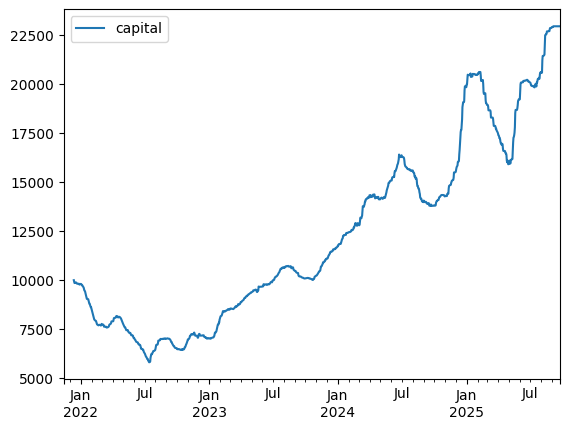

In [422]:
capital_1_trade.rolling(30).sum().plot.line()
print(capital_1_trade[-30:].sum())

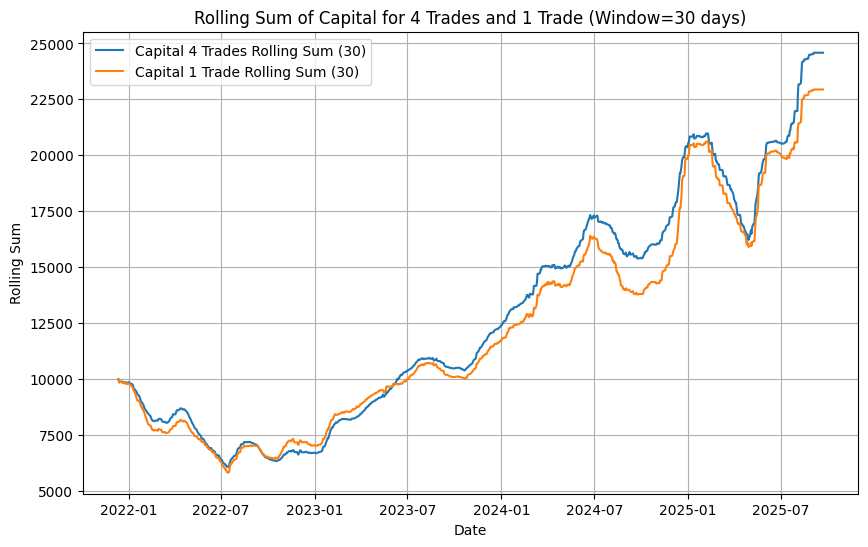

Capital 6 Trades Ending Sum: capital    24583.625054
dtype: float64
Capital 1 Trade Ending Sum: capital    22941.344439
dtype: float64


In [433]:
import matplotlib.pyplot as plt

# Assuming capital_6trades and capital_1_trade are defined and have the same index
capital_4trades_rolling = capital_4trades.rolling(30).sum()
capital_1_trade_rolling = capital_1_trade.rolling(30).sum()

# Plot the rolling sums on the same graph
plt.figure(figsize=(10, 6))
plt.plot(capital_4trades_rolling, label='Capital 4 Trades Rolling Sum (30)')
plt.plot(capital_1_trade_rolling, label='Capital 1 Trade Rolling Sum (30)')
plt.legend(loc='best')
plt.title('Rolling Sum of Capital for 4 Trades and 1 Trade (Window=30 days)')
plt.xlabel('Date')
plt.ylabel('Rolling Sum')
plt.grid(True)
plt.show()

# Print the ending values
print(f"Capital 6 Trades Ending Sum: {capital_4trades[-30:].sum()}")
print(f"Capital 1 Trade Ending Sum: {capital_1_trade[-30:].sum()}")

# 11) compare to benchmark

The model's best CAGR in 4 years: **26.36 %** of avg. growth per year

Simulations params:
SimulationParams(initial_capital=10000, threshold=0.53, fees=0.002, top_k=3,portfolio_optimization=False, stop_loss=0.78, take_profit=1.5, lower_entry=1)

 Count bids 2792 in total, avg.bids per day 2.271765663140765, filled bids 2360, fill bids percent = 0.8452722063037249
  
  Stop loss events: count = 174, net loss = -9571.99962161146

  Take profit events: count = 67, net profit = 9219.076325926242

  Start capital = 10000, Resulting capital: 25497.119116370395

  CAGR in 4 years: 1.264 or 26.36 % of avg. growth per year

In [451]:

# Using buy and hold for S&P500 ("^GSPC") in the past 4 years as the benchmark
start_price = new_df[new_df["Ticker"] == "^GSPC"].iloc[0,0] # the first item
end_price =  new_df[new_df["Ticker"] == "^GSPC"].iloc[-1,0] # the last record

start_capital = 10000 # same as the model's starting captial
end_capital = start_capital * (end_price/start_price)

# CAGR = (Ending Value / Beginning Value) ^ (1 / Number of Periods) - 1
CAGR = (end_capital / start_capital) ** (1 / 4) - 1

print("The Benchmark CAGR for S&P500 in the past 4 years is: ", f"{CAGR:.2%}")

The Benchmark CAGR for S&P500 in the past 4 years is:  9.11%


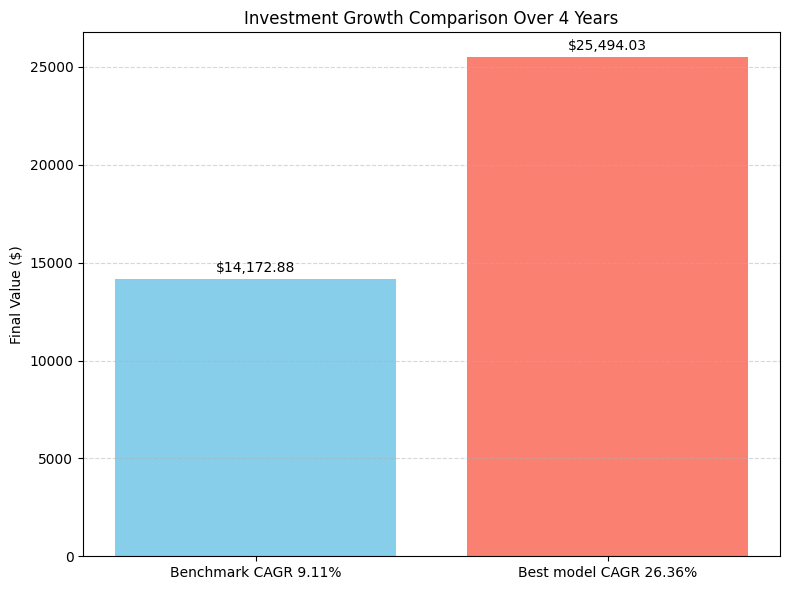

In [452]:
import matplotlib.pyplot as plt

# Initial investment
initial_value = 10000
years = 4

# CAGR values
cagr_values = [9.11, 26.36]
labels = ['Benchmark CAGR 9.11%', 'Best model CAGR 26.36%']

# Calculate final values using CAGR formula: Final = Initial * (1 + CAGR/100) ** years
final_values = [initial_value * (1 + cagr / 100) ** years for cagr in cagr_values]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, final_values, color=['skyblue', 'salmon'])
plt.title(f'Investment Growth Comparison Over {years} Years')
plt.ylabel('Final Value ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with final values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'${yval:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
